# Plot loss curve and show inference sentences

 - Pre-training
    - Emotion dialogue data (cleaning)
       - loss ... over fitting in early steps
       - inference(10 Epoch) ... valid data: most of sentences are similar and have many [数詞] [人名]
       - inference(30 Eposh) ... train data: not changing each emotion
    - OpenSubtitles 
       - loss ... validation loss is not stable
       - inference(13 Epoch) ... most of them have only one word (but short input and reference)
    - Twitter dataset
       - loss ... smooth curve (valid decrease, increase)
       - inference(5 Epoch) ... natural but simple and dull
 -  Fine-tuning
     - all loss curve ... over-fitting in early steps

     - Op_sub -> emo_dial (cleaning)
        - inference(13 Epoch -> 4 Epoch, 13 Epoch -> 2 Epoch) ... many repitition
     -  Twitter -> emo_dial (cleaning)
        - inference(5 Epoch -> 4 Epoch) ... more natural but many  [数詞] [人名]
     -  Twitter -> emo_dial (all) 
        - infenrence(5 Epoch -> 2 Epoch) ... more various but many  [数詞] [人名] but domain can't  be decided
     -  Twitter -> emo_dial (all)  -> emo_dial (cleaning)
        - infenrence(5 Epoch -> 2 Epoch -> ) ... more various but many  [数詞] [人名]

In [6]:
from matplotlib import pyplot as plt
import numpy as np

In [7]:
def plot_loss(log_path, MAX=-1,y_max=None):
    f = open(log_path, 'r')
    log_line = f.readlines()
    [print(log_line[i]) for i in range(23)]
    
    log_valid = [float(i.split(" ")[3].strip('\n')) for i in log_line if i.split(" ")[0] == "Valid"]
    log_train = [float(i.split(" ")[4].strip('\n')) for i in log_line if i.split(" ")[0] == "Train"]
    log_val = log_valid[1:MAX+1]
    min_val = min(log_val)
    [print("Minimize validation loss({}) : {} Epoch ".format(min_val, i+1)) 
           for i, l in enumerate(log_val) if l == min_val ]
    log_train = log_train[:MAX]
    x = np.arange(len(log_val))
    y1 = np.array(log_train)
    y2 = np.array(log_val)
    plt.plot(x,y1)
    plt.plot(x,y2)
    plt.show

In [4]:
log_path_cleaning = "../../emotion_dialogue_model/log/train20190206223204.log"
#log_path_all = "../../emotion_dialogue_model/log/train20190205141303.log" 

log_path_new_tw = "../../emotion_dialogue_model/log/train20190206121006.log" 
log_path_former_tw = "../../emotion_dialogue_model/log/train20190128001030.log" 
log_path_new2_tw = "../../emotion_dialogue_model/log/train20190212232344.log" 

#pre-training former twitter
log_path_tw5_cl = "../../emotion_dialogue_model/log/train20190207000501.log"
log_path_tw3_all = "../../emotion_dialogue_model/log/train20190206220036.log"
log_path_tw83_all = "../../emotion_dialogue_model/log/train20190210090648.log" 
log_path_tw83_cl = "../../emotion_dialogue_model/log/train20190210091505.log"
log_path_tw5_all = "../../emotion_dialogue_model/log/train20190206225509.log" 
log_path_tw5_all10_cl = "../../emotion_dialogue_model/log/train20190208151444.log"
log_path_tw5_all20_cl = "../../emotion_dialogue_model/log/train20190207002610.log" 
log_path_tw5_all34_cl = "../../emotion_dialogue_model/log/train20190207012453.log" 
log_path_tw5_all40_cl = "../../emotion_dialogue_model/log/train20190207000624.log" 
log_path_tw5_all60_cl = "../../emotion_dialogue_model/log/train20190207004548.log"

#pre-training new twitter
log_path_tw98_cl = "../../emotion_dialogue_model/log/train20190212213115.log"
log_path_tw98_all = "../../emotion_dialogue_model/log/train20190212180504.log"

log_path_former_op = "../../emotion_dialogue_model/log/train20190128001146.log"
log_path_op = "../../emotion_dialogue_model/log/train20190212173549.log"
log_path_op13_all = "../../emotion_dialogue_model/log/train20190208225526.log" 

# ☆　Only twitter

Data directory: ../data/twitter_dial/splitted

Vocaburary file: ../data/twitter_dial/vocab/spvocab.model

Model prefix: ./model/pre_twitter_0206

Use emotion: False

Checkpoint path: None

Pretrained: False

Fix embedding: False

UNK_id: 3

max_epoch: 300

decay_step: 600000

tfd_lambda: 0.4

learning_rate: 1e-05

hidden_size: 256

SOS_id: 1

inf_last: False

dropout: 0.1

max_gradient: 50.0

lr_decay: 0.5773502691896258

batch_size: 64

l2_pooling: False

MAX_UTTR_LEN: 100

PAD_id: 0

EOS_id: 2

Minimize validation loss(5.5899) : 98 Epoch 


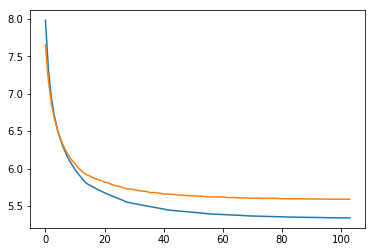

In [4]:
plot_loss(log_path_new_tw, 200)

In [1]:
%run ../../emotion_dialogue_model/inference --model ../../emotion_dialogue_model/model/pre_twitter_0206_98.mdl \
                    --data_dir ../../data/twitter_dial/splitted \
                    --vocab ../../data/twitter_dial/vocab/spvocab.model

Loading the test dataset...
Read 5000 dialogues
Building the model...
Inference uttrances...
Dial 1:
src: うらやましー私も行きたくなってきたo゚▽゚oええじゃないかはちょっと怖いお。笑
tgt: こわくない
1[0.00]: ほんと ほんと ほんと ほんと ほんと ほんと ほんと ほんと ほんと ほんと ほんと ほんと ほんと ほんと ほんと ほんと ほんと ほんと ほんと ほんと ほんと ほんと ほんと ほんと ほんと ほんと ほんと ほんと ほんと ほんと ほんと ほんと ほんと ほんと ほんと ほんと ほんと ほんと ほんと ほんと ほんと ほんと ほんと ほんと ほんと ほんと ほんと ほんと ほんと ほんと ほんと ほんと ほんと ほんと ほんと ほんと ほんと ほんと ほんと ほんと ほんと ほんと ほんと ほんと ほんと ほんと ほんと ほんと ほんと ほんと ほんと ほんと ほんと ほんと ほんと ほんと ほんと ほんと ほんと ほんと ほんと ほんと ほんと ほんと ほんと ほんと ほんと ほんと ほんと ほんと ほんと ほんと ほんと ほんと ほんと ほんと ほんと ほんと ほんと ほんと 
2[-0.00]: うちも うちも うちも うちも うちも うちも うちも うちも うちも うちも うちも うちも うちも うちも うちも うちも うちも うちも うちも うちも うちも うちも うちも うちも うちも うちも うちも うちも うちも うちも うちも うちも うちも うちも うちも うちも うちも うちも うちも うちも うちも うちも うちも うちも うちも うちも うちも うちも うちも うちも うちも うちも うちも うちも うちも うちも うちも うちも うちも うちも うちも うちも うちも うちも うちも うちも うちも うちも うちも うちも うちも うちも うちも うちも うちも うちも うちも うちも うちも うちも うちも うちも うちも うちも うちも うちも うちも うちも うちも うちも うちも うちも うちも うちも うちも うちも うちも うちも うちも うちも 
3[-0.00]: わたしも わたしも わた

1[-0.00]: え え え え え え え え え え え え え え え え え え え え え え え え え え え え え え え え え え え え え え え え え え え え え え え え え え え え え え え え え え え え え え え え え え え え え え え え え え え え え え え え え え え え え え え え え え え え え え え え え え え え 
2[-0.00]: 天使 天使 天使 天使 天使 天使 天使 天使 天使 天使 天使 天使 天使 天使 天使 天使 天使 天使 天使 天使 天使 天使 天使 天使 天使 天使 天使 天使 天使 天使 天使 天使 天使 天使 天使 天使 天使 天使 天使 天使 天使 天使 天使 天使 天使 天使 天使 天使 天使 天使 天使 天使 天使 天使 天使 天使 天使 天使 天使 天使 天使 天使 天使 天使 天使 天使 天使 天使 天使 天使 天使 天使 天使 天使 天使 天使 天使 天使 天使 天使 天使 天使 天使 天使 天使 天使 天使 天使 天使 天使 天使 天使 天使 天使 天使 天使 天使 天使 天使 天使 
3[-0.00]: かわいい かわいい かわいい かわいい かわいい かわいい かわいい かわいい かわいい かわいい かわいい かわいい かわいい かわいい かわいい かわいい かわいい かわいい かわいい かわいい かわいい かわいい かわいい かわいい かわいい かわいい かわいい かわいい かわいい かわいい かわいい かわいい かわいい かわいい かわいい かわいい かわいい かわいい かわいい かわいい かわいい かわいい かわいい かわいい かわいい かわいい かわいい かわいい かわいい かわいい かわいい かわいい かわいい かわいい かわいい かわいい かわいい かわいい かわいい かわいい かわいい かわいい かわいい かわいい かわいい かわいい かわいい かわいい かわいい かわいい かわいい かわいい かわいい かわいい かわいい かわいい かわいい かわいい かわいい かわいい かわいい かわいい かわいい かわいい かわいい かわいい かわいい かわいい かわいい かわいい かわいい かわいい かわいい かわい

Data directory: ../data/twitter_dial/splitted

Vocaburary file: ../data/twitter_dial/vocab/spvocab.model

Model prefix: ./model/0212_twitter

Use emotion: False

Checkpoint path: None

Pretrained: False

Fix embedding: False

hidden_size: 256

dropout: 0.1

PAD_id: 0

tfd_lambda: 0.4

batch_size: 64

teacher_forcing_ratio: 1.0

decoder_learning_ratio: 1.0

MAX_UTTR_LEN: 50

inf_last: False

EOS_id: 2

SOS_id: 1

max_gradient: 50.0

UNK_id: 3

lr_decay: 0.5773502691896258

max_epoch: 20

num_layers: 2

Minimize validation loss(5.4069) : 17 Epoch 


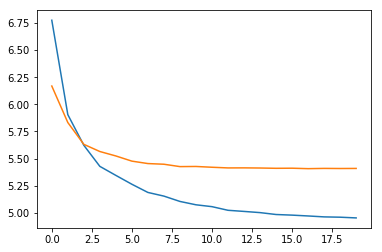

In [10]:
plot_loss(log_path_new2_tw, 200)

In [9]:
%run ../../emotion_dialogue_model/inference --model ../../emotion_dialogue_model/model/0212_twitter_17.mdl \
                    --data_dir ../../data/twitter_dial/splitted \
                    --vocab ../../data/twitter_dial/vocab/spvocab.model

Loading the test dataset...
Read 5000 dialogues
Building the model...
Inference uttrances...
Dial 1:
src: あっそー、じゃあ待ってろ、ちゃんと起きろよ
tgt: ついてくんなよ。遊ぶんだろ
1[-2.01]: ......有り体に言えばそ、そうです 
2[-2.78]: ......有り体に言えば、そ。 
3[-3.40]: ......有り体に言えばそ...... 
4[-3.43]: ......有り体に言えば、そ 
5[-3.87]: ......園村郁人 

Dial 2:
src: しね
tgt: ちょっとだけ
1[-1.47]: しね 
2[-1.79]: うるせだまれ 
3[-2.74]: てかなめてんの 
4[-3.80]: 死ね 
5[-4.40]: うるせ 

Dial 3:
src: うん... お金あれば買ってたけどね笑
tgt: 買うよ あったら買ってたもん笑
1[-4.83]: それな笑 
2[-5.03]: それな笑 お金貯まったら買っちゃう笑 
3[-5.07]: だよね お金貯まったら買っちゃう笑 
4[-6.35]: だよね お金貯まったら買っちゃう 
5[-6.56]: それな笑 お金貯まったら買っちゃう 

Dial 4:
src: 私は真面目に謝らないといけない。↓ 劇場版と放課後楽園委員会とカゲロウアクターズの皆さんに。。。
tgt: しぐちゃんどうしたと・ω・
1[-6.52]: それめっちゃわかる 
2[-6.55]: それはどんまい 
3[-7.36]: それはどんまいやなw 
4[-7.48]: それはどんまいやな 
5[-9.18]: いや、別に別に構わない 

Dial 5:
src: ですよね...。 でも、あそこだけは、ゆずぽんコールゆずれません笑
tgt: 完全に同意です。あと、自分もJK卒業式当選したので参戦しますよ
1[-5.79]: そうなんですよ 
2[-5.83]: だよね笑 
3[-6.06]: そうですね 
4[-6.53]: そうなんですよ笑 
5[-7.24]: ですよね笑 

Dial 6:
src: 金を積めば伸びた
tgt: 全鳥して～～
1[-5.29]: 早い 
2[-6.4

In [10]:
600000/(2810000/64)

13.665480427046264

In [14]:
150000/(2810000/64)

3.416370106761566

In [2]:
%run ../../emotion_dialogue_model/inference --model ../../emotion_dialogue_model/model/pre_twitter_0206_98.mdl \
                    --data_dir ../../data/twitter_dial/splitted \
                    --vocab ../../data/twitter_dial/vocab/spvocab.model

Loading the test dataset...
Read 5000 dialogues
Building the model...
Inference uttrances...
Dial 1:
src: うらやましー私も行きたくなってきたo゚▽゚oええじゃないかはちょっと怖いお。笑
tgt: こわくない
tensor([[-44.0516, -44.0829, -19.9651,  ..., -43.0800, -25.5313, -29.0154],
        [-41.8525, -41.7519, -19.6475,  ..., -40.6067, -25.6538, -30.9912],
        [-41.2607, -41.2483, -18.6058,  ..., -39.9715, -25.9016, -30.0962],
        [-38.4451, -38.4514, -19.8031,  ..., -37.5056, -25.4073, -28.5660],
        [-34.1947, -34.4127,  -5.7329,  ..., -31.6676, -12.9094, -15.9966]],
       device='cuda:0', grad_fn=<TakeBackward>)
tensor([[-44.0420, -44.0735, -19.9422,  ..., -43.0747, -25.5420, -29.0031],
        [-41.8649, -41.7648, -19.6597,  ..., -40.6191, -25.6868, -30.9845],
        [-41.2943, -41.2843, -18.5820,  ..., -40.0031, -25.8868, -30.0693],
        [-38.4672, -38.4730, -19.7805,  ..., -37.5241, -25.3938, -28.5515],
        [-34.1750, -34.3960,  -5.7116,  ..., -31.6480, -12.9296, -15.9595]],
       device='cuda:0', grad_fn=<

tensor([[-43.7033, -43.7376, -19.5271,  ..., -42.7803, -25.6637, -28.8202],
        [-42.0347, -41.9419, -19.7616,  ..., -40.7779, -26.0126, -30.8123],
        [-41.8054, -41.8131, -18.3271,  ..., -40.4620, -25.6623, -29.7256],
        [-38.6988, -38.7018, -19.4934,  ..., -37.6975, -25.2707, -28.2717],
        [-33.8783, -34.1310,  -5.4343,  ..., -31.3623, -13.1588, -15.4406]],
       device='cuda:0', grad_fn=<TakeBackward>)
tensor([[-43.6912, -43.7257, -19.5124,  ..., -42.7682, -25.6695, -28.8166],
        [-42.0423, -41.9498, -19.7631,  ..., -40.7845, -26.0205, -30.8026],
        [-41.8284, -41.8360, -18.3181,  ..., -40.4817, -25.6520, -29.7164],
        [-38.7070, -38.7101, -19.4835,  ..., -37.7029, -25.2685, -28.2601],
        [-33.8713, -34.1246,  -5.4216,  ..., -31.3552, -13.1617, -15.4236]],
       device='cuda:0', grad_fn=<TakeBackward>)
tensor([[-43.6799, -43.7147, -19.4985,  ..., -42.7568, -25.6754, -28.8135],
        [-42.0500, -41.9576, -19.7645,  ..., -40.7911, -26.0280, -

tensor([[-43.5828, -43.6229, -19.3365,  ..., -42.6432, -25.7755, -28.8104],
        [-42.1847, -42.0952, -19.7710,  ..., -40.9027, -26.1075, -30.6329],
        [-42.1822, -42.1761, -18.1882,  ..., -40.7759, -25.5185, -29.6297],
        [-38.8757, -38.8802, -19.3523,  ..., -37.8216, -25.2658, -28.1094],
        [-33.8886, -34.1437,  -5.1627,  ..., -31.3458, -13.0787, -15.2699]],
       device='cuda:0', grad_fn=<TakeBackward>)
tensor([[-43.5812, -43.6216, -19.3308,  ..., -42.6404, -25.7804, -28.8119],
        [-42.1920, -42.1025, -19.7709,  ..., -40.9086, -26.1100, -30.6251],
        [-42.1963, -42.1891, -18.1838,  ..., -40.7873, -25.5158, -29.6279],
        [-38.8858, -38.8903, -19.3478,  ..., -37.8292, -25.2672, -28.1046],
        [-33.8958, -34.1506,  -5.1482,  ..., -31.3504, -13.0685, -15.2693]],
       device='cuda:0', grad_fn=<TakeBackward>)
tensor([[-43.5799, -43.6206, -19.3253,  ..., -42.6377, -25.7852, -28.8135],
        [-42.1992, -42.1098, -19.7707,  ..., -40.9145, -26.1123, -

tensor([[-43.5807, -43.6248, -19.2547,  ..., -42.6164, -25.8586, -28.8503],
        [-42.3186, -42.2289, -19.7664,  ..., -41.0123, -26.1412, -30.4993],
        [-42.3948, -42.3662, -18.1451,  ..., -40.9445, -25.5415, -29.6127],
        [-39.0981, -39.1021, -19.2938,  ..., -37.9962, -25.3140, -28.0544],
        [-34.0894, -34.3363,  -4.8643,  ..., -31.4845, -12.8103, -15.3400]],
       device='cuda:0', grad_fn=<TakeBackward>)
tensor([[-43.5815, -43.6257, -19.2520,  ..., -42.6161, -25.8619, -28.8526],
        [-42.3245, -42.2347, -19.7662,  ..., -41.0171, -26.1424, -30.4939],
        [-42.4022, -42.3725, -18.1451,  ..., -40.9503, -25.5460, -29.6125],
        [-39.1101, -39.1141, -19.2924,  ..., -38.0060, -25.3172, -28.0536],
        [-34.1010, -34.3474,  -4.8493,  ..., -31.4928, -12.7943, -15.3465]],
       device='cuda:0', grad_fn=<TakeBackward>)
tensor([[-43.5823, -43.6267, -19.2493,  ..., -42.6159, -25.8653, -28.8548],
        [-42.3303, -42.2405, -19.7659,  ..., -41.0219, -26.1435, -

tensor([[-43.1982, -43.3230, -17.2463,  ..., -41.8692, -23.8775, -29.0321],
        [-42.7555, -42.7065, -19.6970,  ..., -41.2543, -26.0299, -30.0868],
        [-36.4559, -36.7124, -12.4632,  ..., -35.3159, -20.5899, -23.4585],
        [-37.8182, -38.0317, -12.7750,  ..., -36.7204, -18.8236, -23.9062],
        [-33.2292, -33.4668,  -5.9509,  ..., -30.7755, -12.1930, -16.2094]],
       device='cuda:0', grad_fn=<TakeBackward>)
tensor([[-43.1914, -43.3163, -17.2536,  ..., -41.8667, -23.8935, -29.0381],
        [-42.7627, -42.7138, -19.7108,  ..., -41.2604, -26.0518, -30.0835],
        [-36.4474, -36.7040, -12.4766,  ..., -35.3083, -20.6144, -23.4592],
        [-37.8338, -38.0465, -12.7982,  ..., -36.7341, -18.8626, -23.9062],
        [-33.2425, -33.4841,  -5.9196,  ..., -30.7813, -12.2130, -16.1900]],
       device='cuda:0', grad_fn=<TakeBackward>)
tensor([[-43.1849, -43.3100, -17.2606,  ..., -41.8646, -23.9090, -29.0439],
        [-42.7699, -42.7210, -19.7240,  ..., -41.2664, -26.0724, -

tensor([[-43.1102, -43.2337, -17.3550,  ..., -41.8538, -24.1313, -29.1235],
        [-42.8840, -42.8405, -19.8895,  ..., -41.3563, -26.3037, -30.0054],
        [-38.0053, -38.2070, -13.0965,  ..., -36.8773, -19.4048, -23.8623],
        [-36.2764, -36.5349, -12.6276,  ..., -35.1553, -20.9152, -23.4739],
        [-33.4287, -33.7249,  -5.5040,  ..., -30.8730, -12.4362, -15.9201]],
       device='cuda:0', grad_fn=<TakeBackward>)
tensor([[-43.1075, -43.2308, -17.3591,  ..., -41.8541, -24.1412, -29.1270],
        [-42.8894, -42.8463, -19.8961,  ..., -41.3604, -26.3113, -30.0012],
        [-38.0099, -38.2111, -13.1068,  ..., -36.8808, -19.4248, -23.8587],
        [-36.2682, -36.5267, -12.6322,  ..., -35.1479, -20.9252, -23.4748],
        [-33.4375, -33.7356,  -5.4869,  ..., -30.8784, -12.4410, -15.9109]],
       device='cuda:0', grad_fn=<TakeBackward>)
tensor([[-43.1048, -43.2279, -17.3632,  ..., -41.8543, -24.1508, -29.1304],
        [-42.8946, -42.8520, -19.9026,  ..., -41.3643, -26.3186, -

tensor([[-43.0676, -43.1861, -17.4273,  ..., -41.8610, -24.2951, -29.1805],
        [-42.9675, -42.9338, -19.9949,  ..., -41.4190, -26.4068, -29.9304],
        [-38.0558, -38.2516, -13.2460,  ..., -36.9122, -19.7006, -23.7890],
        [-36.1365, -36.3959, -12.6950,  ..., -35.0300, -21.0599, -23.4913],
        [-33.5887, -33.9125,  -5.1957,  ..., -30.9827, -12.4351, -15.8132]],
       device='cuda:0', grad_fn=<TakeBackward>)
tensor([[-43.0660, -43.1842, -17.4305,  ..., -41.8613, -24.3017, -29.1827],
        [-42.9704, -42.9371, -19.9990,  ..., -41.4211, -26.4100, -29.9272],
        [-38.0567, -38.2524, -13.2511,  ..., -36.9126, -19.7108, -23.7856],
        [-36.1309, -36.3903, -12.6973,  ..., -35.0249, -21.0648, -23.4921],
        [-33.5955, -33.9202,  -5.1816,  ..., -30.9877, -12.4306, -15.8113]],
       device='cuda:0', grad_fn=<TakeBackward>)
tensor([[-43.0643, -43.1823, -17.4336,  ..., -41.8617, -24.3082, -29.1849],
        [-42.9731, -42.9404, -20.0029,  ..., -41.4231, -26.4131, -

tensor([[-44.2833, -44.3136, -17.5387,  ..., -41.8424, -26.0474, -28.1590],
        [-37.3452, -36.9458, -11.3324,  ..., -35.1907, -21.7629, -23.9697],
        [-35.7687, -35.5728, -11.4819,  ..., -34.4147, -18.9321, -23.0233],
        [-36.2326, -36.3981, -11.4019,  ..., -35.4249, -18.1767, -21.1392],
        [-31.7306, -31.1970, -10.1888,  ..., -29.8294, -15.7120, -19.9436]],
       device='cuda:0', grad_fn=<TakeBackward>)
tensor([[-44.3270, -44.3597, -17.5133,  ..., -41.8777, -26.0478, -28.1717],
        [-37.3492, -36.9457, -11.3318,  ..., -35.1932, -21.7729, -23.9821],
        [-35.8012, -35.5994, -11.4671,  ..., -34.4404, -18.9378, -23.0169],
        [-36.3077, -36.4632, -11.4352,  ..., -35.4950, -18.1817, -21.1837],
        [-31.6073, -31.0539, -10.0136,  ..., -29.7148, -15.4647, -19.7907]],
       device='cuda:0', grad_fn=<TakeBackward>)
tensor([[-44.3674, -44.4025, -17.4889,  ..., -41.9101, -26.0476, -28.1833],
        [-37.3518, -36.9443, -11.3306,  ..., -35.1946, -21.7815, -

tensor([[-44.6631, -44.7326, -17.2536,  ..., -42.1351, -26.0352, -28.2786],
        [-37.2620, -36.8089, -11.2813,  ..., -35.1204, -21.8297, -24.1993],
        [-36.2808, -36.0013, -11.2763,  ..., -34.8253, -18.8743, -22.9240],
        [-37.2166, -37.2419, -11.5261,  ..., -36.2844, -17.8406, -21.5416],
        [-29.6618, -28.8423,  -7.9388,  ..., -27.6201, -13.1497, -17.8788]],
       device='cuda:0', grad_fn=<TakeBackward>)
tensor([[-44.6637, -44.7350, -17.2499,  ..., -42.1348, -26.0356, -28.2803],
        [-37.2542, -36.7995, -11.2794,  ..., -35.1142, -21.8311, -24.2097],
        [-36.2992, -36.0163, -11.2695,  ..., -34.8403, -18.8674, -22.9213],
        [-37.2443, -37.2668, -11.5131,  ..., -36.3073, -17.8178, -21.5466],
        [-29.5795, -28.7528,  -7.8891,  ..., -27.5338, -13.0847, -17.8199]],
       device='cuda:0', grad_fn=<TakeBackward>)
tensor([[-44.6635, -44.7365, -17.2467,  ..., -42.1338, -26.0361, -28.2818],
        [-37.2465, -36.7902, -11.2778,  ..., -35.1080, -21.8326, -

tensor([[-44.5751, -44.6757, -17.2491,  ..., -42.0492, -26.0583, -28.2883],
        [-37.1306, -36.6566, -11.2780,  ..., -35.0157, -21.8802, -24.3757],
        [-36.5727, -36.2283, -11.1861,  ..., -35.0680, -18.7285, -22.9057],
        [-37.5355, -37.5413, -11.2092,  ..., -36.5404, -17.4949, -21.5788],
        [-28.3799, -27.4559,  -7.1305,  ..., -26.2818, -12.1058, -16.9086]],
       device='cuda:0', grad_fn=<TakeBackward>)
tensor([[-44.5680, -44.6700, -17.2508,  ..., -42.0429, -26.0598, -28.2880],
        [-37.1257, -36.6511, -11.2793,  ..., -35.0118, -21.8837, -24.3827],
        [-36.5842, -36.2369, -11.1838,  ..., -35.0780, -18.7201, -22.9061],
        [-37.5421, -37.5480, -11.1934,  ..., -36.5453, -17.4823, -21.5787],
        [-28.3431, -27.4163,  -7.0964,  ..., -26.2423, -12.0664, -16.8728]],
       device='cuda:0', grad_fn=<TakeBackward>)
tensor([[-44.5609, -44.6642, -17.2525,  ..., -42.0365, -26.0614, -28.2876],
        [-37.1210, -36.6458, -11.2806,  ..., -35.0080, -21.8873, -

tensor([[-44.4337, -44.5576, -17.2864,  ..., -41.9246, -26.0878, -28.2750],
        [-37.0580, -36.5759, -11.3128,  ..., -34.9568, -21.9515, -24.4917],
        [-36.7608, -36.3710, -11.1687,  ..., -35.2389, -18.5434, -22.9204],
        [-37.5868, -37.5951, -10.9361,  ..., -36.5689, -17.2786, -21.5604],
        [-27.9794, -27.0305,  -6.5966,  ..., -25.8302, -11.5226, -16.4165]],
       device='cuda:0', grad_fn=<TakeBackward>)
tensor([[-44.4271, -44.5519, -17.2881,  ..., -41.9188, -26.0892, -28.2741],
        [-37.0554, -36.5732, -11.3148,  ..., -34.9548, -21.9548, -24.4963],
        [-36.7677, -36.3764, -11.1696,  ..., -35.2454, -18.5356, -22.9218],
        [-37.5861, -37.5946, -10.9247,  ..., -36.5676, -17.2691, -21.5587],
        [-27.9709, -27.0217,  -6.5786,  ..., -25.8196, -11.5029, -16.4019]],
       device='cuda:0', grad_fn=<TakeBackward>)
tensor([[-44.4204, -44.5463, -17.2898,  ..., -41.9130, -26.0905, -28.2732],
        [-37.0530, -36.5705, -11.3168,  ..., -34.9528, -21.9581, -

tensor([[-44.4183, -44.0230, -18.9470,  ..., -42.5020, -26.1955, -29.7422],
        [-43.8894, -44.0376, -17.2633,  ..., -41.9145, -25.1440, -27.8442],
        [-39.4375, -39.4476, -11.2185,  ..., -37.7139, -19.7008, -22.9714],
        [-32.9000, -32.9402,  -7.1175,  ..., -31.2154, -15.9838, -20.8360],
        [-29.6814, -29.6558,  -6.7150,  ..., -28.3495, -16.1317, -19.2085]],
       device='cuda:0', grad_fn=<TakeBackward>)
tensor([[-44.4376, -44.0404, -18.9665,  ..., -42.5192, -26.2106, -29.7494],
        [-43.8856, -44.0339, -17.2470,  ..., -41.9063, -25.1345, -27.8351],
        [-39.4400, -39.4510, -11.2357,  ..., -37.7149, -19.7170, -22.9674],
        [-32.8883, -32.9275,  -7.0967,  ..., -31.1982, -15.9669, -20.8201],
        [-29.6009, -29.5754,  -6.7058,  ..., -28.2656, -16.1292, -19.1570]],
       device='cuda:0', grad_fn=<TakeBackward>)
tensor([[-44.4561, -44.0572, -18.9853,  ..., -42.5358, -26.2248, -29.7561],
        [-43.8810, -44.0295, -17.2316,  ..., -41.8975, -25.1250, -

tensor([[-44.7119, -44.2934, -19.2316,  ..., -42.7650, -26.3833, -29.8289],
        [-43.7412, -43.8959, -17.0710,  ..., -41.7186, -24.9760, -27.7111],
        [-39.4854, -39.4974, -11.4945,  ..., -37.7520, -19.9335, -23.0273],
        [-32.3845, -32.4066,  -6.5800,  ..., -30.6518, -15.4664, -20.4648],
        [-27.5716, -27.5732,  -6.2139,  ..., -26.1553, -15.9503, -17.9652]],
       device='cuda:0', grad_fn=<TakeBackward>)
tensor([[-44.7230, -44.3039, -19.2415,  ..., -42.7751, -26.3884, -29.8312],
        [-43.7328, -43.8879, -17.0666,  ..., -41.7093, -24.9695, -27.7070],
        [-39.4885, -39.5002, -11.5046,  ..., -37.7550, -19.9417, -23.0328],
        [-32.3458, -32.3672,  -6.5454,  ..., -30.6140, -15.4272, -20.4405],
        [-27.4381, -27.4426,  -6.1795,  ..., -26.0176, -15.9246, -17.8873]],
       device='cuda:0', grad_fn=<TakeBackward>)
tensor([[-44.7340, -44.3143, -19.2512,  ..., -42.7849, -26.3932, -29.8335],
        [-43.7244, -43.8800, -17.0625,  ..., -41.7001, -24.9632, -

tensor([[-44.8998, -44.4744, -19.3860,  ..., -42.9357, -26.4473, -29.8605],
        [-43.5919, -43.7541, -17.0228,  ..., -41.5634, -24.8781, -27.6563],
        [-39.5450, -39.5521, -11.6456,  ..., -37.8120, -20.0581, -23.1251],
        [-31.5595, -31.5786,  -5.8067,  ..., -29.8772, -14.4623, -19.8776],
        [-24.9249, -24.9097,  -5.4296,  ..., -23.4477, -14.9901, -16.3860]],
       device='cuda:0', grad_fn=<TakeBackward>)
tensor([[-44.9076, -44.4821, -19.3918,  ..., -42.9428, -26.4491, -29.8616],
        [-43.5856, -43.7482, -17.0218,  ..., -41.5572, -24.8748, -27.6546],
        [-39.5477, -39.5546, -11.6509,  ..., -37.8147, -20.0625, -23.1290],
        [-31.5226, -31.5417,  -5.7709,  ..., -29.8427, -14.4133, -19.8491],
        [-24.7960, -24.7774,  -5.3856,  ..., -23.3153, -14.9222, -16.3019]],
       device='cuda:0', grad_fn=<TakeBackward>)
tensor([[-44.9153, -44.4897, -19.3974,  ..., -42.9499, -26.4508, -29.8626],
        [-43.5795, -43.7423, -17.0209,  ..., -41.5512, -24.8715, -

tensor([[-42.4461, -42.4677, -18.7981,  ..., -41.3825, -25.8912, -27.3440],
        [-42.8090, -42.6539, -17.2675,  ..., -41.0624, -26.6788, -29.7349],
        [-37.3440, -37.6545, -14.0554,  ..., -36.1097, -23.8301, -23.9393],
        [-33.5980, -33.7572, -11.4266,  ..., -32.3912, -21.1298, -23.6411],
        [    -inf,     -inf,  -4.0067,  ...,     -inf,     -inf,     -inf]],
       device='cuda:0', grad_fn=<TakeBackward>)
tensor([[-42.4729, -42.4946, -18.8203,  ..., -41.4082, -25.8994, -27.3696],
        [-42.8174, -42.6612, -17.2866,  ..., -41.0708, -26.6937, -29.7347],
        [-37.3420, -37.6536, -14.0707,  ..., -36.1075, -23.8356, -23.9354],
        [-33.5244, -33.6808, -11.3516,  ..., -32.3217, -21.0828, -23.5565],
        [    -inf,     -inf,  -4.0067,  ...,     -inf,     -inf,     -inf]],
       device='cuda:0', grad_fn=<TakeBackward>)
tensor([[-42.4978, -42.5194, -18.8414,  ..., -41.4321, -25.9093, -27.3947],
        [-42.8250, -42.6677, -17.3044,  ..., -41.0785, -26.7074, -

tensor([[-42.7562, -42.7642, -19.1320,  ..., -41.6947, -26.2063, -27.7850],
        [-42.8953, -42.7245, -17.5093,  ..., -41.1501, -26.8297, -29.6998],
        [-37.3048, -37.6526, -14.2070,  ..., -36.0643, -23.8633, -23.9742],
        [-31.9235, -32.0806, -10.4762,  ..., -30.7572, -20.0341, -22.1392],
        [    -inf,     -inf,  -4.0067,  ...,     -inf,     -inf,     -inf]],
       device='cuda:0', grad_fn=<TakeBackward>)
tensor([[-42.7646, -42.7714, -19.1449,  ..., -41.7038, -26.2240, -27.8037],
        [-42.8976, -42.7262, -17.5171,  ..., -41.1524, -26.8331, -29.6988],
        [-37.3027, -37.6529, -14.2092,  ..., -36.0619, -23.8623, -23.9783],
        [-31.8227, -31.9801, -10.4428,  ..., -30.6591, -19.9747, -22.0648],
        [    -inf,     -inf,  -4.0067,  ...,     -inf,     -inf,     -inf]],
       device='cuda:0', grad_fn=<TakeBackward>)
tensor([[-42.7727, -42.7783, -19.1575,  ..., -41.7126, -26.2416, -27.8221],
        [-42.8997, -42.7278, -17.5248,  ..., -41.1546, -26.8364, -

tensor([[-42.8762, -42.8587, -19.3417,  ..., -41.8279, -26.5095, -28.0910],
        [-42.9264, -42.7467, -17.6427,  ..., -41.1840, -26.8868, -29.7084],
        [-37.2665, -37.6581, -14.2121,  ..., -36.0197, -23.8145, -24.0455],
        [-29.9619, -30.1197,  -9.8995,  ..., -28.8480, -18.9152, -20.7640],
        [    -inf,     -inf,  -4.0067,  ...,     -inf,     -inf,     -inf]],
       device='cuda:0', grad_fn=<TakeBackward>)
tensor([[-42.8802, -42.8615, -19.3499,  ..., -41.8325, -26.5215, -28.1026],
        [-42.9273, -42.7473, -17.6485,  ..., -41.1851, -26.8894, -29.7100],
        [-37.2649, -37.6585, -14.2111,  ..., -36.0178, -23.8109, -24.0482],
        [-29.8743, -30.0319,  -9.8746,  ..., -28.7621, -18.8650, -20.7049],
        [    -inf,     -inf,  -4.0067,  ...,     -inf,     -inf,     -inf]],
       device='cuda:0', grad_fn=<TakeBackward>)
tensor([[-42.8841, -42.8642, -19.3579,  ..., -41.8370, -26.5333, -28.1138],
        [-42.9282, -42.7478, -17.6542,  ..., -41.1861, -26.8921, -

tensor([[-42.9343, -42.7491, -17.7486,  ..., -41.1965, -26.9409, -29.7514],
        [-42.9345, -42.8963, -19.4766,  ..., -41.8971, -26.7013, -28.2668],
        [-37.2439, -37.6698, -14.1836,  ..., -35.9905, -23.7331, -24.0853],
        [-28.4763, -28.6274,  -9.4676,  ..., -27.3795, -18.0504, -19.7807],
        [-30.5852, -30.8495, -10.7785,  ..., -29.6151, -19.9977, -21.0458]],
       device='cuda:0', grad_fn=<TakeBackward>)
tensor([[-42.9364, -42.8973, -19.4821,  ..., -41.8995, -26.7086, -28.2729],
        [-42.9342, -42.7487, -17.7534,  ..., -41.1966, -26.9436, -29.7539],
        [-37.2432, -37.6707, -14.1819,  ..., -35.9895, -23.7288, -24.0866],
        [-28.4167, -28.5674,  -9.4499,  ..., -27.3199, -18.0158, -19.7422],
        [-28.9786, -29.0394, -10.2306,  ..., -27.9555, -18.9902, -20.5641]],
       device='cuda:0', grad_fn=<TakeBackward>)
tensor([[-42.9340, -42.7483, -17.7581,  ..., -41.1967, -26.9464, -29.7564],
        [-42.9382, -42.8983, -19.4875,  ..., -41.9018, -26.7157, -

tensor([[-35.2577, -34.9721, -10.0115,  ..., -33.2527, -20.5856, -22.4388],
        [-34.3379, -34.4789, -12.0545,  ..., -33.2482, -22.2036, -23.2994],
        [-27.2643, -26.4888,  -5.7309,  ..., -25.0217, -12.4880, -15.5227],
        [-26.9788, -26.1946,  -5.5658,  ..., -24.7137, -12.3426, -15.2762],
        [-26.7464, -25.9515,  -5.4379,  ..., -24.4524, -12.2354, -15.0477]],
       device='cuda:0', grad_fn=<TakeBackward>)
tensor([[-35.2552, -34.9687, -10.0095,  ..., -33.2520, -20.5839, -22.4517],
        [-34.2535, -34.3925, -11.9860,  ..., -33.1592, -22.1392, -23.2121],
        [-27.1698, -26.3901,  -5.7089,  ..., -24.9228, -12.4668, -15.4756],
        [-26.9059, -26.1178,  -5.5542,  ..., -24.6367, -12.3300, -15.2417],
        [-26.6915, -25.8929,  -5.4346,  ..., -24.3941, -12.2290, -15.0248]],
       device='cuda:0', grad_fn=<TakeBackward>)
tensor([[-35.2523, -34.9650, -10.0079,  ..., -33.2510, -20.5827, -22.4643],
        [-34.1655, -34.3024, -11.9215,  ..., -33.0668, -22.0749, -

tensor([[-35.1793, -34.8800, -10.0284,  ..., -33.2015, -20.6293, -22.6449],
        [-32.1803, -32.2699, -11.1554,  ..., -31.0653, -20.9111, -21.6556],
        [-26.4787, -25.6455,  -5.4974,  ..., -24.1513, -12.3110, -14.9777],
        [-26.3929, -25.5546,  -5.4361,  ..., -24.0539, -12.2429, -14.8677],
        [-26.3245, -25.4816,  -5.3878,  ..., -23.9736, -12.1836, -14.7631]],
       device='cuda:0', grad_fn=<TakeBackward>)
tensor([[-35.1751, -34.8752, -10.0314,  ..., -33.1981, -20.6341, -22.6530],
        [-32.0692, -32.1565, -11.1231,  ..., -30.9549, -20.8476, -21.5816],
        [-26.4668, -25.6316,  -5.4921,  ..., -24.1364, -12.3074, -14.9619],
        [-26.3848, -25.5449,  -5.4334,  ..., -24.0434, -12.2409, -14.8554],
        [-26.3191, -25.4748,  -5.3868,  ..., -23.9664, -12.1822, -14.7535]],
       device='cuda:0', grad_fn=<TakeBackward>)
tensor([[-35.1709, -34.8705, -10.0345,  ..., -33.1947, -20.6390, -22.6610],
        [-31.9600, -32.0450, -11.0909,  ..., -30.8462, -20.7844, -

tensor([[-35.1067, -34.7984, -10.0986,  ..., -33.1398, -20.7314, -22.7819],
        [-30.3453, -30.4017, -10.5249,  ..., -29.2256, -19.7122, -20.3401],
        [-26.3580, -25.4984,  -5.4400,  ..., -23.9899, -12.2526, -14.7386],
        [-26.3129, -25.4519,  -5.4074,  ..., -23.9410, -12.2032, -14.6704],
        [-26.2683, -25.4064,  -5.3740,  ..., -23.8929, -12.1514, -14.5973]],
       device='cuda:0', grad_fn=<TakeBackward>)
tensor([[-35.1038, -34.7952, -10.1023,  ..., -33.1373, -20.7364, -22.7874],
        [-30.2737, -30.3289, -10.4936,  ..., -29.1529, -19.6569, -20.2823],
        [-26.3555, -25.4951,  -5.4387,  ..., -23.9861, -12.2500, -14.7295],
        [-26.3112, -25.4495,  -5.4066,  ..., -23.9383, -12.2010, -14.6625],
        [-26.2670, -25.4044,  -5.3734,  ..., -23.8908, -12.1495, -14.5903]],
       device='cuda:0', grad_fn=<TakeBackward>)
tensor([[-35.1010, -34.7921, -10.1059,  ..., -33.1348, -20.7412, -22.7929],
        [-30.2036, -30.2578, -10.4623,  ..., -29.0816, -19.6021, -

tensor([[-39.8243, -39.6428, -12.9968,  ..., -37.8303, -22.5795, -22.9824],
        [-36.5178, -36.1334, -11.1806,  ..., -35.2775, -18.8282, -23.3351],
        [-32.2986, -32.1684,  -7.5602,  ..., -30.7237, -17.0634, -17.4083],
        [-30.2464, -29.8804,  -7.1201,  ..., -28.8127, -16.8544, -16.5104],
        [-30.2464, -29.8804,  -7.1201,  ..., -28.8127, -16.8544, -16.5104]],
       device='cuda:0', grad_fn=<TakeBackward>)
tensor([[-39.8100, -39.6268, -12.9908,  ..., -37.8137, -22.5923, -22.9525],
        [-36.5574, -36.1695, -11.1914,  ..., -35.3133, -18.8464, -23.3313],
        [-32.2975, -32.1669,  -7.5483,  ..., -30.7250, -17.0572, -17.4096],
        [-30.2499, -29.8837,  -7.1419,  ..., -28.8161, -16.8752, -16.5225],
        [    -inf,     -inf,  -7.1201,  ...,     -inf,     -inf,     -inf]],
       device='cuda:0', grad_fn=<TakeBackward>)
tensor([[-39.7949, -39.6101, -12.9834,  ..., -37.7965, -22.6030, -22.9229],
        [-36.5944, -36.2031, -11.2017,  ..., -35.3468, -18.8634, -

tensor([[-39.4883, -39.2732, -12.6694,  ..., -37.4567, -22.5513, -22.4598],
        [-36.9692, -36.5222, -11.3114,  ..., -35.6740, -19.0333, -23.1835],
        [-32.2283, -32.0968,  -7.3837,  ..., -30.6961, -16.9409, -17.4025],
        [-30.1911, -29.8229,  -7.2750,  ..., -28.7662, -16.9747, -16.5808],
        [-30.1911, -29.8229,  -7.2750,  ..., -28.7662, -16.9747, -16.5808]],
       device='cuda:0', grad_fn=<TakeBackward>)
tensor([[-39.4720, -39.2550, -12.6458,  ..., -37.4381, -22.5399, -22.4380],
        [-36.9792, -36.5293, -11.3140,  ..., -35.6818, -19.0377, -23.1743],
        [-32.2233, -32.0919,  -7.3785,  ..., -30.6931, -16.9359, -17.4018],
        [-30.1847, -29.8165,  -7.2752,  ..., -28.7608, -16.9734, -16.5803],
        [    -inf,     -inf,  -7.2750,  ...,     -inf,     -inf,     -inf]],
       device='cuda:0', grad_fn=<TakeBackward>)
tensor([[-39.4557, -39.2368, -12.6219,  ..., -37.4196, -22.5279, -22.4165],
        [-36.9884, -36.5357, -11.3163,  ..., -35.6890, -19.0418, -

tensor([[-39.1399, -38.8787, -12.1747,  ..., -37.0525, -22.2784, -22.0526],
        [-37.0783, -36.5872, -11.3420,  ..., -35.7523, -19.0770, -23.0364],
        [-32.1238, -31.9964,  -7.3299,  ..., -30.6311, -16.8675, -17.4018],
        [-30.0564, -29.6910,  -7.2510,  ..., -28.6539, -16.9270, -16.5637],
        [-30.0564, -29.6910,  -7.2510,  ..., -28.6539, -16.9270, -16.5637]],
       device='cuda:0', grad_fn=<TakeBackward>)
tensor([[-39.1201, -38.8562, -12.1502,  ..., -37.0296, -22.2644, -22.0323],
        [-37.0810, -36.5885, -11.3437,  ..., -35.7540, -19.0779, -23.0315],
        [-32.1186, -31.9915,  -7.3293,  ..., -30.6279, -16.8652, -17.4025],
        [-30.0499, -29.6847,  -7.2492,  ..., -28.6486, -16.9243, -16.5628],
        [-30.0499, -29.6847,  -7.2492,  ..., -28.6486, -16.9243, -16.5628]],
       device='cuda:0', grad_fn=<TakeBackward>)
tensor([[-39.1003, -38.8337, -12.1259,  ..., -37.0067, -22.2504, -22.0121],
        [-37.0835, -36.5897, -11.3454,  ..., -35.7557, -19.0789, -

tensor([[-37.1134, -36.6058, -11.3882,  ..., -35.7756, -19.0974, -22.9697],
        [-38.7533, -38.4439, -11.7291,  ..., -36.6099, -22.0166, -21.6648],
        [-32.0265, -31.9048,  -7.3424,  ..., -30.5704, -16.8397, -17.4247],
        [-29.9418, -29.5818,  -7.2172,  ..., -28.5610, -16.8777, -16.5482],
        [-29.9418, -29.5818,  -7.2172,  ..., -28.5610, -16.8777, -16.5482]],
       device='cuda:0', grad_fn=<TakeBackward>)
tensor([[-37.1143, -36.6064, -11.3909,  ..., -35.7762, -19.0985, -22.9675],
        [-38.7360, -38.4247, -11.7098,  ..., -36.5902, -22.0047, -21.6474],
        [-32.0220, -31.9006,  -7.3440,  ..., -30.5676, -16.8391, -17.4263],
        [-29.9369, -29.5772,  -7.2157,  ..., -28.5571, -16.8756, -16.5476],
        [-29.9369, -29.5772,  -7.2157,  ..., -28.5571, -16.8756, -16.5476]],
       device='cuda:0', grad_fn=<TakeBackward>)
tensor([[-37.1152, -36.6069, -11.3937,  ..., -35.7768, -19.0997, -22.9654],
        [-38.7190, -38.4060, -11.6909,  ..., -36.5709, -21.9929, -

tensor([[-39.1637, -38.9106, -13.2241,  ..., -37.2898, -24.3486, -23.8577],
        [-39.4656, -39.4991, -11.5556,  ..., -37.8553, -23.2173, -24.9627],
        [-36.0937, -36.0173, -11.6274,  ..., -34.8753, -20.4481, -22.9678],
        [-36.6237, -36.9549, -12.0956,  ..., -34.8995, -22.4765, -22.4121],
        [-33.0256, -33.0888,  -6.3969,  ..., -30.4570, -13.4964, -15.6473]],
       device='cuda:0', grad_fn=<TakeBackward>)
tensor([[-39.1856, -38.9321, -13.2255,  ..., -37.3083, -24.3448, -23.8548],
        [-39.4531, -39.4873, -11.4787,  ..., -37.8438, -23.1576, -24.9248],
        [-36.1177, -36.0420, -11.6237,  ..., -34.8991, -20.4326, -22.9567],
        [-36.5723, -36.9030, -12.0856,  ..., -34.8421, -22.4526, -22.3665],
        [-33.0179, -33.0832,  -6.3637,  ..., -30.4488, -13.5008, -15.6315]],
       device='cuda:0', grad_fn=<TakeBackward>)
tensor([[-39.2075, -38.9536, -13.2260,  ..., -37.3266, -24.3404, -23.8515],
        [-39.4351, -39.4704, -11.3969,  ..., -37.8268, -23.0935, -

tensor([[-39.5763, -39.3190, -13.1497,  ..., -37.6367, -24.1905, -23.7567],
        [-36.4153, -36.3483, -11.5214,  ..., -35.1845, -20.1357, -22.7498],
        [-35.6570, -35.9880, -11.6982,  ..., -33.8419, -21.8161, -21.4848],
        [-38.5609, -38.6676,  -9.5577,  ..., -36.9591, -21.5819, -23.9063],
        [-32.9581, -33.0613,  -5.8606,  ..., -30.3811, -13.5054, -15.4304]],
       device='cuda:0', grad_fn=<TakeBackward>)
tensor([[-39.5949, -39.3376, -13.1430,  ..., -37.6524, -24.1800, -23.7505],
        [-36.4251, -36.3581, -11.5151,  ..., -35.1931, -20.1219, -22.7396],
        [-35.6143, -35.9457, -11.6625,  ..., -33.7955, -21.7642, -21.4335],
        [-38.5284, -38.6389,  -9.4844,  ..., -36.9249, -21.5197, -23.8648],
        [-32.9579, -33.0628,  -5.8386,  ..., -30.3804, -13.5018, -15.4242]],
       device='cuda:0', grad_fn=<TakeBackward>)
tensor([[-39.6133, -39.3559, -13.1361,  ..., -37.6678, -24.1693, -23.7443],
        [-36.4345, -36.3675, -11.5088,  ..., -35.2014, -20.1083, -

tensor([[-39.9017, -39.6430, -13.0060,  ..., -37.9082, -23.9678, -23.6356],
        [-36.5560, -36.4833, -11.3944,  ..., -35.2972, -19.9013, -22.5562],
        [-38.4366, -38.5712,  -8.8181,  ..., -36.7878, -20.9280, -23.4585],
        [-34.9712, -35.3080, -10.7601,  ..., -33.0877, -20.4722, -20.3918],
        [-32.9782, -33.1082,  -5.4661,  ..., -30.3912, -13.3861, -15.3668]],
       device='cuda:0', grad_fn=<TakeBackward>)
tensor([[-39.9153, -39.6565, -12.9988,  ..., -37.9195, -23.9564, -23.6300],
        [-36.5609, -36.4877, -11.3882,  ..., -35.3005, -19.8916, -22.5472],
        [-38.4465, -38.5811,  -8.8055,  ..., -36.7955, -20.9168, -23.4499],
        [-34.9492, -35.2861, -10.7104,  ..., -33.0630, -20.4017, -20.3414],
        [-32.9802, -33.1113,  -5.4484,  ..., -30.3926, -13.3780, -15.3663]],
       device='cuda:0', grad_fn=<TakeBackward>)
tensor([[-39.9287, -39.6699, -12.9916,  ..., -37.9305, -23.9451, -23.6244],
        [-36.5657, -36.4920, -11.3821,  ..., -35.3038, -19.8820, -

# ☆　Only cleaning domain

Data directory: ../data/em_dial/splitted/cleaning

Vocaburary file: ../data/twitter_dial/vocab/spvocab.model

Model prefix: ./model/pre_em_cleaning0206

Use emotion: True

Checkpoint path: None

Pretrained: False

Fix embedding: False

decoder_learning_ratio: 5.0

batch_size: 16

UNK_id: 3

tfd_lambda: 0.4

max_epoch: 80

learning_rate: 1e-06

SOS_id: 1

MAX_UTTR_LEN: 100

l2_pooling: False

teacher_forcing_ratio: 1.0

EOS_id: 2

inf_last: False

decay_step: 600000

Minimize validation loss(8.0314) : 35 Epoch 
Minimize validation loss(8.0314) : 36 Epoch 


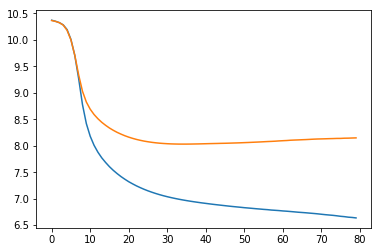

In [14]:
plot_loss(log_path_cleaning, 200)

### 学習はうまく行っていそうなのに、１単語しか発話しないしやっぱり厳しい

In [24]:
%run ../../emotion_dialogue_model/inference --model ../../emotion_dialogue_model/model/pre_em_cleaning0206_30.mdl \
                    --data_dir ../../data/em_dial/splitted/cleaning \
                    --vocab ../../data/twitter_dial/vocab/spvocab.model \
                    --use_emotion

Loading the test dataset...
Read 202 dialogues
Building the model...
Inference uttrances...
Dial 1:
src: 役立たずなロボットだなぁ。
tgt: 役立たずなんて悲しいことを言わないで下さい。
tgt_emotion: sad
inf:  NONE
1[5.81]:  

inf:  neutral
1[5.82]:  

inf:  anger
1[5.82]:  

inf:  sad
1[5.82]:  

inf:  happy
1[5.82]:  

inf:  contentment
1[5.82]:  

Dial 2:
src: めんどくさいから嫌だ。
tgt: 掃除したら気持ちが良くなるよ。
tgt_emotion: sad
inf:  NONE
1[5.89]:  

inf:  neutral
1[5.89]:  

inf:  anger
1[5.89]:  

inf:  sad
1[5.89]:  

inf:  happy
1[5.89]:  

inf:  contentment
1[5.89]:  

Dial 3:
src: まぁ、そうだろうね。
tgt: でしょ。だから僕はきっと物にも魂があって大切にされたものがAさんのことも大切に思うんだと思うよ。
tgt_emotion: NONE
inf:  NONE
1[5.86]:  

inf:  neutral
1[5.87]:  

inf:  anger
1[5.87]:  

inf:  sad
1[5.87]:  

inf:  happy
1[5.87]:  

inf:  contentment
1[5.87]:  

Dial 4:
src: まだ大丈夫だよ〜
tgt: 部屋がゴミだらけになります。
tgt_emotion: neutral
inf:  NONE
1[5.61]:  

inf:  neutral
1[5.62]:  

inf:  anger
1[5.62]:  

inf:  sad
1[5.62]:  

inf:  happy
1[5.61]:  

inf:  contentment
1[5.63]:  

Dial 5:
src: なんで今そ

In [25]:
%run ../../emotion_dialogue_model/inference --model ../../emotion_dialogue_model/model/pre_em_cleaning0206_80.mdl \
                    --data_dir ../../data/em_dial/splitted/cleaning \
                    --vocab ../../data/twitter_dial/vocab/spvocab.model \
                    --use_emotion

Loading the test dataset...
Read 202 dialogues
Building the model...
Inference uttrances...
Dial 1:
src: 後で。
tgt: .........。
tgt_emotion: sad
inf:  NONE
1[3.72]:  

inf:  neutral
1[3.72]:  

inf:  anger
1[3.72]:  

inf:  sad
1[3.72]:  

inf:  happy
1[3.72]:  

inf:  contentment
1[3.72]:  

Dial 2:
src: まだいいよ。
tgt: 部屋が汚く見えるから掃除してよ。
tgt_emotion: sad
inf:  NONE
1[3.76]:  

inf:  neutral
1[3.76]:  

inf:  anger
1[3.77]:  

inf:  sad
1[3.76]:  

inf:  happy
1[3.77]:  

inf:  contentment
1[3.77]:  

Dial 3:
src: 怒っているじゃないか。
tgt: 怒っていませんよ。自分の存在の無意味さにふがいなさを感じていただけです。
tgt_emotion: anger
inf:  NONE
1[3.77]:  

inf:  neutral
1[3.77]:  

inf:  anger
1[3.77]:  

inf:  sad
1[3.77]:  

inf:  happy
1[3.77]:  

inf:  contentment
1[3.78]:  

Dial 4:
src: そんな気分じゃない。
tgt: またそんなことを言って。
tgt_emotion: sad
inf:  NONE
1[3.75]:  

inf:  neutral
1[3.75]:  

inf:  anger
1[3.75]:  

inf:  sad
1[3.75]:  

inf:  happy
1[3.75]:  

inf:  contentment
1[3.76]:  

Dial 5:
src: ありがと。
tgt: 掃除進むごとに新しいダンスするから頑張ってね。
tgt_emotio

# ☆　twitter dataset -> cleaning domain

Data directory: ../data/em_dial/splitted/cleaning

Vocaburary file: ../data/twitter_dial/vocab/spvocab.model

Model prefix: ./model/0212_tw98_clean

Use emotion: True

Checkpoint path: ./model/pre_twitter_0206_98.mdl

Pretrained: True

Fix embedding: False

num_layers: 2

hidden_size: 256

MAX_UTTR_LEN: 100

decoder_learning_ratio: 5.0

inf_last: False

UNK_id: 3

dropout: 0.1

EOS_id: 2

batch_size: 16

SOS_id: 1

tfd_lambda: 0.4

lr_decay: 0.5773502691896258

max_epoch: 300

decay_step: 600000

max_gradient: 50.0

PAD_id: 0

Minimize validation loss(6.1267) : 51 Epoch 


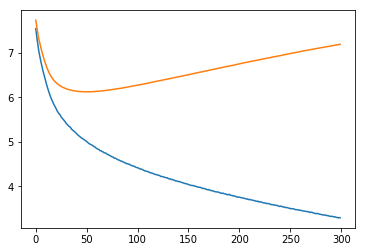

In [15]:
plot_loss(log_path_tw98_cl, 300)

# ☆　twitter dataset -> all domain

Data directory: ../data/em_dial/splitted/all

Vocaburary file: ../data/twitter_dial/vocab/spvocab.model

Model prefix: ./model/0212_tw98_all

Use emotion: True

Checkpoint path: ./model/pre_twitter_0206_98.mdl

Pretrained: True

Fix embedding: False

MAX_UTTR_LEN: 100

dropout: 0.1

max_gradient: 50.0

decoder_learning_ratio: 5.0

UNK_id: 3

l2_pooling: False

SOS_id: 1

tfd_lambda: 0.4

inf_last: False

batch_size: 16

teacher_forcing_ratio: 1.0

num_layers: 2

decay_step: 600000

learning_rate: 1e-06

lr_decay: 0.5773502691896258

EOS_id: 2

Minimize validation loss(5.7456) : 28 Epoch 


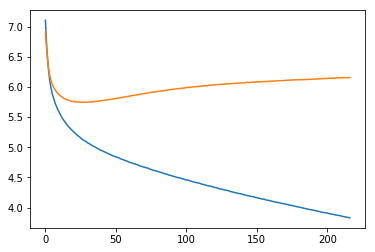

In [17]:
plot_loss(log_path_tw98_all, 300)

In [6]:
%run ../../emotion_dialogue_model/inference --model ../../emotion_dialogue_model/model/0212_tw98_all_28.mdl \
                    --data_dir ../../data/em_dial/splitted/cleaning \
                    --vocab ../../data/twitter_dial/vocab/spvocab.model \
                    --use_emotion

Loading the test dataset...
Read 202 dialogues
Building the model...
Inference uttrances...
Dial 1:
src: もうある程度の場所は覚えたよ。
tgt: これだけ物が散乱していると掃除機をかけることも出来ないじゃない。
tgt_emotion: anger
inf:  NONE
1[-1.88]: AさんがAさんがAさんのことを考えています。 

inf:  neutral
1[-0.92]: AさんがAさんがAさんがAさんがAさんのことを考えています。 

inf:  anger
1[-0.94]: AさんがAさんがAさんがAさんがAさんのことを考えています。 

inf:  sad
1[-1.77]: AさんがAさんがAさんのことを考えています。 

inf:  happy
1[-0.96]: AさんがAさんがAさんがAさんがAさんのことを考えています。 

inf:  contentment
1[-0.60]: Aさん!!!!!!!!!!!!!!!!!!!! 

Dial 2:
src: たぶんね。
tgt: 今日はここだけ、とかおそうじの場所決めてやってみて。
tgt_emotion: neutral
inf:  NONE
1[-0.21]: Aさん!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!! 

inf:  neutral
1[-0.62]: Aさん!!!!!!!!!!!!!!!!!!!! 

inf:  anger
1[-0.16]: Aさん!!!!!!?!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!! 

inf:  sad
1[-0.21]: Aさん!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!! 

inf:  happy
1

In [5]:
%run ../../emotion_dialogue_model/inference --model ../../emotion_dialogue_model/model/0212_tw98_all_50.mdl \
                    --data_dir ../../data/em_dial/splitted/cleaning \
                    --vocab ../../data/twitter_dial/vocab/spvocab.model \
                    --use_emotion

Loading the test dataset...
Read 202 dialogues
Building the model...
Inference uttrances...
Dial 1:
src: たしかに、朝の時間ばたばたしてるからそういう姿みせてるよね。
tgt: スムーズにお出かけできたら僕うれしいなー。
tgt_emotion: happy
inf:  NONE
1[-3.13]: AさんはAさんが健康になるよ。 

inf:  neutral
1[-3.16]: AさんはAさんが健康になるよ。 

inf:  anger
1[-0.18]: AさんはAさんのためだよ!!!!!?!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!! 

inf:  sad
1[-3.04]: AさんはAさんが病気になるよ。 

inf:  happy
1[-3.04]: AさんはAさんが健康になるよ。 

inf:  contentment
1[-3.92]: Aさん? 

Dial 2:
src: 悲しまないで〜
tgt: 1ヵ月前に「屑!カス!」と言われて振られましたね。
tgt_emotion: sad
inf:  NONE
1[-3.57]: Aさん! 

inf:  neutral
1[-3.62]: Aさん! 

inf:  anger
1[-0.71]: Aさん!!!!!!!!!!!!!!! 

inf:  sad
1[-3.95]: Aさん! 

inf:  happy
1[-3.28]: Aさん! 

inf:  contentment
1[-3.00]: Aさん! 

Dial 3:
src: でもぼくの成績、成績悪くはないよ
tgt: 今悪くないのなら、掃除をしたらもっと良くなるんじゃないかな
tgt_emotion: NONE
inf:  NONE
1[-0.72]: AさんがAさんがAさんがAさんがAさんがAさんがAさんが病気になるよ。 

inf:  neutral
1[-0.50]: AさんがAさんがAさんがAさんがAさんがAさんの生活習慣が改善されています。 

inf:  anger
1[-0.77]: Aさ

In [20]:
%run ../../emotion_dialogue_model/inference --model ../../emotion_dialogue_model/model/0212_tw98_all_150.mdl \
                    --data_dir ../../data/em_dial/splitted/cleaning \
                    --vocab ../../data/twitter_dial/vocab/spvocab.model \
                    --use_emotion

Loading the test dataset...
Read 202 dialogues
Building the model...
Inference uttrances...
Dial 1:
src: まだ生活するのに不便は感じない。
tgt: それでも何かと効率は落ちますよ。
tgt_emotion: sad
inf:  NONE
1[-3.01]: そんなこと言わずに! 

inf:  neutral
1[-2.87]: Aさんの生活改善指導をするようにしないと? 

inf:  anger
1[-2.75]: そんなこと言わずに! 

inf:  sad
1[-3.14]: そんなこと言わずに! 

inf:  happy
1[-2.78]: そんなこと言わずに! 

inf:  contentment
1[-2.84]: そんなこと言わずに! 

Dial 2:
src: 丈夫な体だから平気。
tgt: 過信しているといつか本当に体調が悪くなるよ。
tgt_emotion: sad
inf:  NONE
1[-1.96]: Aさんのためを思って言っているんですか? 

inf:  neutral
1[-1.98]: Aさんのためを思って言っているんですか? 

inf:  anger
1[-1.99]: Aさんのためを思って言っているんですか? 

inf:  sad
1[-2.05]: Aさんがゲームを止めてくれないと悲しいです。 

inf:  happy
1[-2.02]: Aさんのためを思って言っているんですか? 

inf:  contentment
1[-3.35]: Aさん!ありがとう! 

Dial 3:
src: いや、だからやめて...
tgt: 可哀想でしょうがありません。
tgt_emotion: NONE
inf:  NONE
1[-3.12]: そんなことはありません! 

inf:  neutral
1[-2.74]: Aさんの健康を考えて言っているのです。 

inf:  anger
1[-3.10]: そんなことはありません!! 

inf:  sad
1[-3.29]: そんなことはありません! 

inf:  happy
1[-3.05]: そんなことはありません! 

inf:  contentment
1[-

In [29]:
%run ../../emotion_dialogue_model/inference --model ../../emotion_dialogue_model/model/0212_tw98_all_200.mdl \
                    --data_dir ../../data/em_dial/splitted/cleaning \
                    --vocab ../../data/twitter_dial/vocab/spvocab.model \
                    --use_emotion

Loading the test dataset...
Read 202 dialogues
Building the model...
Inference uttrances...
Dial 1:
src: まだそんなに散らかっていないよ。
tgt: 足の踏み場もないくらいだけど。
tgt_emotion: anger
inf:  NONE
1[-2.89]: Aさんがゲームを止めていただけますか? 

inf:  neutral
1[-2.70]: Aさんの健康のために掃除しようよ。 

inf:  anger
1[-3.05]: Aさんがゲームを止めていただけますか? 

inf:  sad
1[-1.94]: Aさんがゲームを止めてくれないと悲しいです。 

inf:  happy
1[-2.97]: Aさんがゲームを止めていただけますか? 

inf:  contentment
1[-2.68]: Aさんの健康のために掃除しようよ。 

Dial 2:
src: そうかなの?
tgt: ほら、始めたらすぐ終わりますよ
tgt_emotion: sad
inf:  NONE
1[-2.21]: そうだよ! 

inf:  neutral
1[-2.19]: そうだよ! 

inf:  anger
1[-2.21]: そうだよ! 

inf:  sad
1[-2.23]: そうだよ! 

inf:  happy
1[-2.22]: そうだよ! 

inf:  contentment
1[-2.18]: そうだよ! 

Dial 3:
src: わかったよ。しょうがないなあ。
tgt: 分かれば良いんですよ。
tgt_emotion: contentment
inf:  NONE
1[-2.50]: Aさんのために言っているのですか? 

inf:  neutral
1[-2.50]: Aさんのために言っているのですか? 

inf:  anger
1[-1.90]: Aさんのためを思って言っているのですか? 

inf:  sad
1[-2.63]: Aさんのために言っているのですか? 

inf:  happy
1[-2.55]: Aさんのために言っているのですか? 

inf:  contentment
1[-2.46]: Aさんのために言っているのですか

# ☆　twitter dataset(former) -> all domain -> cleaning

Data directory: ../data/em_dial/splitted/cleaning

Vocaburary file: ../data/twitter_dial/vocab/spvocab.model

Model prefix: ./model/0208_tw5_all10_clean

Use emotion: True

Checkpoint path: ./model/pre_tw5_fi_all0206_10.mdl

Pretrained: True

Fix embedding: False

decay_step: 600000

EOS_id: 2

num_layers: 2

MAX_UTTR_LEN: 100

learning_rate: 1e-07

SOS_id: 1

teacher_forcing_ratio: 1.0

hidden_size: 256

Minimize validation loss(5.8339) : 313 Epoch 
Minimize validation loss(5.8339) : 314 Epoch 
Minimize validation loss(5.8339) : 315 Epoch 
Minimize validation loss(5.8339) : 316 Epoch 
Minimize validation loss(5.8339) : 317 Epoch 
Minimize validation loss(5.8339) : 318 Epoch 
Minimize validation loss(5.8339) : 319 Epoch 
Minimize validation loss(5.8339) : 320 Epoch 
Minimize validation loss(5.8339) : 321 Epoch 


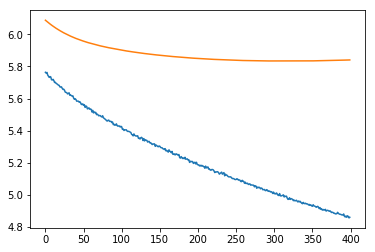

In [149]:
plot_loss(log_path_tw5_all10_cl, 400)

In [151]:
%run ../../emotion_dialogue_model/inference --model ../../emotion_dialogue_model/model/0208_tw5_all10_clean_320.mdl \
                    --data_dir ../../data/em_dial/splitted/cleaning \
                    --vocab ../../data/twitter_dial/vocab/spvocab.model \
                    --use_emotion

INFO:logger:Data directory: ../../data/em_dial/splitted/cleaning
INFO:logger:Vocaburary file: ../../data/twitter_dial/vocab/spvocab.model
INFO:logger:Model: ../../emotion_dialogue_model/model/0208_tw5_all10_clean_320.mdl
INFO:logger:Use emotion: True
INFO:logger:MAX_UTTR_LEN: 100
INFO:logger:PAD_id: 0
INFO:logger:learning_rate: 1e-07
INFO:logger:max_gradient: 50.0
INFO:logger:dropout: 0.1
INFO:logger:num_layers: 2
INFO:logger:decay_step: 600000
INFO:logger:tfd_lambda: 0.4
INFO:logger:len_alpha: 0.6
INFO:logger:suppress_lambda: 1.0
INFO:logger:teacher_forcing_ratio: 1.0
INFO:logger:SOS_id: 1
INFO:logger:hidden_size: 256
INFO:logger:decoder_learning_ratio: 5.0
INFO:logger:lr_decay: 0.5773502691896258
INFO:logger:eos_gamma: 0.05
INFO:logger:l2_pooling: False
INFO:logger:max_epoch: 400
INFO:logger:EOS_id: 2
INFO:logger:beam_width: 5
INFO:logger:use_emotion: True
INFO:logger:batch_size: 1
INFO:logger:inf_last: False
INFO:logger:UNK_id: 3
INFO:logger.dataset:Reading files...
INFO:logger.data

Loading the test dataset...
Read 202 dialogues
Building the model...
Inference uttrances...
Dial 1:
src: 怒ればいいじゃん。
tgt: 掃除しないともう話をしない。
tgt_emotion: anger
inf:  NONE
1[-3.15]: どうして怒るのですか? 
2[-3.22]: どうして怒るんだよ! 
3[-3.54]: どうして怒るんだ! 

inf:  neutral
1[-3.15]: どうして怒るのですか? 
2[-3.19]: どうして怒るんだよ! 
3[-3.52]: どうして怒るんだ! 

inf:  anger
1[-3.17]: どうして怒るんだよ! 
2[-3.17]: どうして怒るのですか? 
3[-3.50]: どうして怒るんだ! 

inf:  sad
1[-3.20]: どうして怒るのですか? 
2[-3.24]: どうして怒るんだよ! 
3[-3.59]: どうして怒るんだ! 

inf:  happy
1[-3.14]: どうして怒るのですか? 
2[-3.17]: どうして怒るんだよ! 
3[-3.50]: どうして怒るんだ! 

inf:  contentment
1[-3.17]: どうして怒るのですか? 
2[-3.27]: どうして怒るんだよ! 
3[-3.58]: どうして怒るんだ! 

Dial 2:
src: そーだね。
tgt: お部屋きれいにしたらスムーズにお出かけできるよね。
tgt_emotion: NONE
inf:  NONE
1[-4.07]: Aさんのために頑張りましょう。 
2[-4.43]: Aさんにとって大切な!? 
3[-4.66]: Aさんにとって大切な! 

inf:  neutral
1[-2.61]: Aさんのために一緒に掃除しましょう! 
2[-2.81]: Aさんのために一緒に掃除しましょう!? 
3[-3.18]: Aさんのために一緒に掃除しましょう? 

inf:  anger
1[-2.59]: Aさんのために一緒に掃除しましょう! 
2[-2.78]: Aさんのために一緒に掃除しましょう!? 
3[-3.19]: Aさんのために一緒に掃除しましょう? 

inf

Data directory: ../data/em_dial/splitted/cleaning

Vocaburary file: ../data/twitter_dial/vocab/spvocab.model

Model prefix: ./model/0206_tw5_all40_clean

Use emotion: True

Checkpoint path: ./model/pre_tw5_fi_all0206_40.mdl

Pretrained: True

Fix embedding: False

PAD_id: 0

l2_pooling: False

num_layers: 2

learning_rate: 1e-06

teacher_forcing_ratio: 1.0

dropout: 0.1

tfd_lambda: 0.4

UNK_id: 3

Minimize validation loss(5.7679) : 14 Epoch 


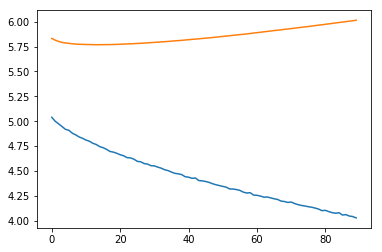

In [118]:
plot_loss(log_path_cleaning, 90)

Data directory: ../data/em_dial/splitted/cleaning

Vocaburary file: ../data/twitter_dial/vocab/spvocab.model

Model prefix: ./model/0206_tw5_all34_clean

Use emotion: True

Checkpoint path: ./model/pre_tw5_fi_all0206_34.mdl

Pretrained: True

Fix embedding: False

SOS_id: 1

decay_step: 600000

PAD_id: 0

EOS_id: 2

MAX_UTTR_LEN: 100

tfd_lambda: 0.4

batch_size: 16

learning_rate: 1e-07

Minimize validation loss(5.7615) : 90 Epoch 


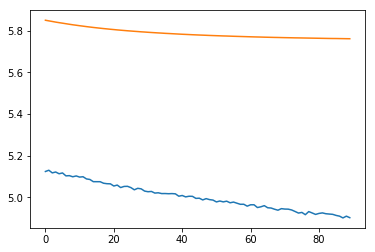

In [110]:
plot_loss(log_path_tw5_all34_cl, 300)

In [7]:
%run ../../emotion_dialogue_model/inference --model ../../emotion_dialogue_model/model/0206_tw5_all34_clean_90.mdl \
                    --data_dir ../../data/em_dial/splitted/cleaning \
                    --vocab ../../data/twitter_dial/vocab/spvocab.model \
                    --use_emotion

Loading the test dataset...
Read 202 dialogues
Building the model...
Inference uttrances...
Dial 1:
src: じっとしてた方が汗かかなくてすむよ。
tgt: じゃぁ、ジュースを冷凍庫にしまって、冷たくなるまで掃除してみたら?
tgt_emotion: neutral
inf:  NONE
1[-3.67]: では掃除しましょう! 

inf:  neutral
1[-3.66]: では掃除しましょう! 

inf:  anger
1[-3.62]: では掃除しましょう!! 

inf:  sad
1[-3.71]: では掃除しましょう! 

inf:  happy
1[-3.41]: では掃除しましょう!!! 

inf:  contentment
1[-3.71]: では掃除しましょう! 

Dial 2:
src: そんな神経質にならなくても...
tgt: いえ、既に1ヵ月掃除をサボっています。
tgt_emotion: neutral
inf:  NONE
1[-2.30]: Aさんは健康質が悪いのですか? 

inf:  neutral
1[-2.30]: Aさんは健康質が悪いのですか? 

inf:  anger
1[-0.20]: Aさんは健康質が悪いのですか!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!! 

inf:  sad
1[-2.43]: Aさんは健康質が悪いのですか? 

inf:  happy
1[-0.11]: Aさんは健康質が悪いのですか!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!! 

inf:  contentment
1[-2.59]: Aさんの健康質が悪いのですか? 

Dial 3:
src: たしかに、朝の時間ばたばたしてるからそういう姿みせてるよね。
tgt: スムーズにお出かけできたら僕うれしいなー。
tgt_emotion: happy
inf:  NON

# ☆　twitter dataset(former) -> all domain -> cleaning

In [ ]:
%run ../../emotion_dialogue_model/inference --model ../../emotion_dialogue_model/model/0206_tw5_all34_clean_90.mdl \
                    --data_dir ../../data/em_dial/splitted/cleaning \
                    --vocab ../../data/twitter_dial/vocab/spvocab.model \
                    --use_emotion

# ☆　OpenSubtitles 

Data directory: ../data/op_sub_dial/splitted

Vocaburary file: ../data/em_dial/vocab/spvocab.model

Model prefix: ./model/0212_op

Use emotion: False

Checkpoint path: None

Pretrained: False

Fix embedding: False

UNK_id: 3

decoder_learning_ratio: 5.0

learning_rate: 0.0001

teacher_forcing_ratio: 1.0

decay_step: 600000

num_layers: 2

tfd_lambda: 0.4

EOS_id: 2

lr_decay: 0.5773502691896258

SOS_id: 1

batch_size: 256

MAX_UTTR_LEN: 100

PAD_id: 0

max_epoch: 300

max_gradient: 50.0

inf_last: False

Minimize validation loss(5.1037) : 13 Epoch 


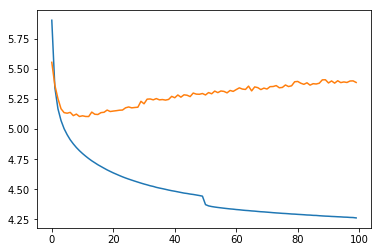

In [12]:
plot_loss(log_path_op,100)

In [13]:
%run ../../emotion_dialogue_model/inference --model ../../emotion_dialogue_model/model/0212_op_13.mdl \
                    --data_dir ../../data/op_sub_dial/splitted \
                    --vocab ../../data/em_dial/vocab/spvocab.model \

Loading the test dataset...
Read 4933 dialogues
Building the model...
Inference uttrances...
Dial 1:
src: これでもう安全だ
tgt: テープを頼むぞ貴重な記録だ
1[-4.53]: ああ 
2[-5.21]: ここから出してくれ 
3[-5.75]: これ以上 
4[-5.90]: ああくそ 
5[-5.91]: 約束する 

Dial 2:
src: 彼女はあなたに、依存している
tgt: 先生、
1[-5.17]: 彼女は 
2[-5.71]: あなたは 
3[-5.83]: 私は 
4[-7.41]: あなたは、すべての権利 
5[-7.56]: 彼女は私の息子 

Dial 3:
src: いんちきゾンビめ
tgt: 計画は失敗したんだ
1[-3.92]: だめだ 
2[-3.93]: やめろ 
3[-4.14]: くそ 
4[-4.22]: だめだめ 
5[-6.00]: そいつら 

Dial 4:
src: 何が必要なのか分からなかったら
tgt: 狂ってしまったか
1[-5.35]: お前のせいだ 
2[-5.52]: あいつら 
3[-5.71]: お前 
4[-6.23]: 自分たちのせいだ 
5[-6.44]: 自分たちのせいだと思う 

Dial 5:
src: 分かった、行くが良い
tgt: [数詞]人共、嘘つきで殺人者だ
1[-3.44]: ダメだ 
2[-3.50]: 分かった 
3[-3.71]: 行こう 
4[-4.45]: よし 
5[-5.41]: よし、行こう 

Dial 6:
src: ソーンどこに行く
tgt: エディ
1[-3.67]: 分からない 
2[-4.38]: 知らない 
3[-4.38]: ドリー 
4[-5.05]: ソーン 
5[-5.49]: 仕事 

Dial 7:
src: 彼は妻を誘拐、
tgt: 娘も
1[-4.39]: 妻を殺した 
2[-5.12]: そして 
3[-5.35]: 妻が死んだ 
4[-5.92]: 妻と息子を奪った 
5[-5.94]: 妻と息子を殺した 

Dial 8:
src: いつもだ
tgt: 今までは
1[-4.54]: さあ 
2[-4.74]: よし 


Exception ignored in: <bound method _DataLoaderIter.__del__ of <torch.utils.data.dataloader._DataLoaderIter object at 0x7f10ac6cb0b8>>
Traceback (most recent call last):
  File "/home/is/sara-as/.pyenv/versions/miniconda3-3.19.0/lib/python3.5/site-packages/torch/utils/data/dataloader.py", line 399, in __del__
    self._shutdown_workers()
  File "/home/is/sara-as/.pyenv/versions/miniconda3-3.19.0/lib/python3.5/site-packages/torch/utils/data/dataloader.py", line 378, in _shutdown_workers
    self.worker_result_queue.get()
  File "/home/is/sara-as/.pyenv/versions/miniconda3-3.19.0/lib/python3.5/multiprocessing/queues.py", line 337, in get
    return ForkingPickler.loads(res)
  File "/home/is/sara-as/.pyenv/versions/miniconda3-3.19.0/lib/python3.5/site-packages/torch/multiprocessing/reductions.py", line 151, in rebuild_storage_fd
    fd = df.detach()
  File "/home/is/sara-as/.pyenv/versions/miniconda3-3.19.0/lib/python3.5/multiprocessing/resource_sharer.py", line 57, in detach
    with _re

# ☆　OpenSubtitles -> cleaning

Data directory: ../data/op_sub_dial/splitted

Vocaburary file: ../data/em_dial/vocab/spvocab.model

Model prefix: ./model/pre_op_0128

Use emotion: False

Checkpoint path: None

Pretrained: False

Fix embedding: False

decay_step: 600000

learning_rate: 0.0001

decoder_learning_ratio: 5.0

PAD_id: 0

num_layers: 2

dropout: 0.1

batch_size: 64

hidden_size: 256

Minimize validation loss(4.9577) : 13 Epoch 


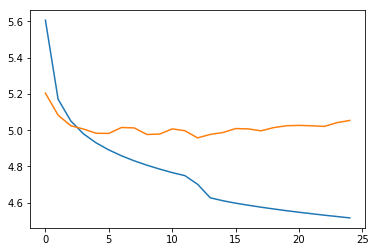

In [19]:
plot_loss(log_path_op,25)

In [14]:
%run ../../emotion_dialogue_model/inference --model ../../emotion_dialogue_model/model/pre_op13_fi_em_0128_2.mdl \
                    --data_dir ../../data/em_dial/splitted/cleaning \
                    --vocab ../../data/em_dial/vocab/spvocab.model \
                    --use_emotion

Loading the test dataset...
Read 202 dialogues
Building the model...
Inference uttrances...
Dial 1:
src: たぶんね。
tgt: 今日はここだけ、とかおそうじの場所決めてやってみて。
tgt_emotion: neutral
tensor([[-20.9481, -20.8165,  -7.2509,  ..., -19.8920, -21.2479, -18.5624],
        [-19.6475, -19.5045,  -6.7387,  ..., -18.2776, -19.9813, -17.5100],
        [-19.6361, -19.4932,  -6.7378,  ..., -18.2914, -19.9664, -17.4988],
        [-17.6678, -17.7646,  -6.4398,  ..., -17.6690, -18.1770, -18.2787],
        [-16.1309, -16.0000,  -7.0363,  ..., -18.1093, -16.4484, -16.3504]],
       device='cuda:0')
tensor([[-17.8469, -17.9443,  -6.4195,  ..., -17.4954, -18.3845, -18.4853],
        [-19.5135, -19.3691,  -6.7424,  ..., -18.2897, -19.8152, -17.4330],
        [-16.0991, -15.9652,  -7.0219,  ..., -18.2637, -16.4184, -16.2550],
        [-16.0984, -15.9643,  -7.0192,  ..., -18.2754, -16.4159, -16.2439],
        [-16.0708, -16.0576,  -6.6551,  ..., -17.2814, -16.6613, -16.5041]],
       device='cuda:0')
tensor([[-20.9199, -20.793

tensor([[-21.2535, -21.1410,  -6.6111,  ..., -19.3372, -21.2672, -18.0848],
        [-19.4424, -19.4036,  -8.0760,  ..., -19.4572, -19.3629, -16.7745],
        [-19.4424, -19.4036,  -8.0760,  ..., -19.4572, -19.3629, -16.7745],
        [-17.5034, -17.4712,  -6.4978,  ..., -16.9257, -17.7325, -16.4414],
        [-17.1734, -17.1517,  -6.5398,  ..., -17.1276, -17.4555, -16.6891]],
       device='cuda:0')
tensor([[-21.2519, -21.1587,  -6.4822,  ..., -19.4710, -21.2768, -18.2299],
        [-21.2766, -21.1635,  -6.5981,  ..., -19.3409, -21.2818, -18.0711],
        [-19.4701, -19.4296,  -8.0589,  ..., -19.4551, -19.3851, -16.7597],
        [-19.4701, -19.4296,  -8.0589,  ..., -19.4551, -19.3851, -16.7597],
        [-17.5946, -17.5608,  -6.5038,  ..., -16.9262, -17.7971, -16.4682]],
       device='cuda:0')
tensor([[-19.4890, -19.4496,  -8.0821,  ..., -19.4498, -19.3838, -16.7276],
        [-21.2968, -21.1852,  -6.5829,  ..., -19.3549, -21.2871, -18.0487],
        [-17.6236, -17.5887,  -6.5087,

tensor([[-19.6609, -19.6189,  -8.0954,  ..., -19.7361, -19.5051, -16.4838],
        [-19.9589, -19.9233,  -8.0975,  ..., -19.8636, -19.8317, -16.6762],
        [-19.9324, -19.8961,  -8.1082,  ..., -19.8523, -19.8010, -16.6666],
        [-19.9794, -19.9439,  -8.0858,  ..., -19.8754, -19.8563, -16.6872],
        [-20.1527, -20.1205,  -8.0363,  ..., -19.8859, -20.0609, -16.7606]],
       device='cuda:0')
tensor([[-19.7334, -19.6944,  -8.1044,  ..., -19.7639, -19.5890, -16.4775],
        [-19.9243, -19.8882,  -8.1171,  ..., -19.8621, -19.7919, -16.6526],
        [-19.9671, -19.9316,  -8.0968,  ..., -19.8845, -19.8418, -16.6729],
        [-19.9384, -19.9023,  -8.1045,  ..., -19.8714, -19.8089, -16.6632],
        [-20.0814, -20.0488,  -8.0642,  ..., -19.8842, -19.9751, -16.7330]],
       device='cuda:0')
tensor([[-19.6509, -19.6085,  -8.0928,  ..., -19.7686, -19.4980, -16.4707],
        [-19.9319, -19.8961,  -8.1140,  ..., -19.8816, -19.8015, -16.6495],
        [-19.9491, -19.9133,  -8.1049,

tensor([[-19.6192, -19.4817,  -6.6826,  ..., -18.3118, -19.9115, -17.4154],
        [-19.7183, -19.5780,  -6.7213,  ..., -18.2183, -20.0487, -17.4395],
        [-19.7281, -19.5876,  -6.7206,  ..., -18.2090, -20.0624, -17.4514],
        [-17.6918, -17.7897,  -6.4633,  ..., -17.5074, -18.1845, -18.2762],
        [-16.1414, -16.0054,  -7.0633,  ..., -17.9973, -16.4603, -16.2600]],
       device='cuda:0')
tensor([[-17.8936, -17.9903,  -6.4494,  ..., -17.3687, -18.4165, -18.5199],
        [-19.5992, -19.4585,  -6.7244,  ..., -18.2062, -19.9008, -17.3701],
        [-16.1127, -15.9749,  -7.0526,  ..., -18.1479, -16.4350, -16.1576],
        [-16.1137, -15.9759,  -7.0515,  ..., -18.1579, -16.4342, -16.1458],
        [-16.1005, -15.9664,  -7.0258,  ..., -18.3023, -16.4314, -16.0737]],
       device='cuda:0')
tensor([[-17.8536, -17.9508,  -6.4845,  ..., -17.4597, -18.3627, -18.4518],
        [-17.8439, -17.9412,  -6.4869,  ..., -17.4688, -18.3522, -18.4333],
        [-17.7653, -17.8640,  -6.4569,

tensor([[-19.6873, -19.5456,  -6.6825,  ..., -18.2893, -19.9595, -17.3497],
        [-19.8171, -19.6735,  -6.7528,  ..., -18.1424, -20.1023, -17.3569],
        [-19.8187, -19.6751,  -6.7508,  ..., -18.1520, -20.1029, -17.3624],
        [-18.3440, -18.4378,  -6.7503,  ..., -17.6136, -18.8384, -18.6446],
        [-16.2943, -16.1228,  -7.1058,  ..., -18.0716, -16.5362, -15.9942]],
       device='cuda:0')
tensor([[-18.4865, -18.5725,  -6.7926,  ..., -17.5414, -18.9863, -18.7603],
        [-19.7014, -19.5582,  -6.7173,  ..., -18.1862, -19.9820, -17.3291],
        [-16.2473, -16.0770,  -7.0945,  ..., -18.1524, -16.5039, -15.9471],
        [-16.2516, -16.0815,  -7.0958,  ..., -18.1567, -16.5080, -15.9516],
        [-16.1010, -15.9367,  -7.0535,  ..., -18.2593, -16.3717, -15.9211]],
       device='cuda:0')
tensor([[-18.4650, -18.5539,  -6.7922,  ..., -17.5795, -18.9602, -18.7311],
        [-18.4602, -18.5492,  -6.7930,  ..., -17.5824, -18.9556, -18.7246],
        [-18.3613, -18.4564,  -6.7441,

tensor([[-18.8302, -18.9124,  -6.9558,  ..., -17.6294, -19.3141, -18.8847],
        [-19.7151, -19.5737,  -6.7638,  ..., -18.0826, -19.9721, -17.2716],
        [-16.3184, -16.1347,  -7.0583,  ..., -18.1030, -16.5617, -15.7459],
        [-16.3129, -16.1291,  -7.0545,  ..., -18.0984, -16.5563, -15.7371],
        [-16.1442, -15.9665,  -7.0132,  ..., -18.1775, -16.3999, -15.7108]],
       device='cuda:0')
tensor([[-18.8128, -18.8985,  -6.9490,  ..., -17.6446, -19.2946, -18.8565],
        [-18.8143, -18.9000,  -6.9472,  ..., -17.6429, -19.2958, -18.8594],
        [-18.7165, -18.8093,  -6.9042,  ..., -17.6842, -19.1923, -18.8312],
        [-19.8992, -19.7589,  -6.8211,  ..., -18.0027, -20.1535, -17.2652],
        [-16.2134, -16.0338,  -7.0358,  ..., -18.1659, -16.4831, -15.6858]],
       device='cuda:0')
tensor([[-19.6848, -19.5448,  -6.7457,  ..., -18.1561, -19.9317, -17.2799],
        [-18.7635, -18.8541,  -6.9274,  ..., -17.6619, -19.2471, -18.8230],
        [-19.8319, -19.6901,  -6.8044,

tensor([[-18.9655, -19.0545,  -7.0203,  ..., -17.7119, -19.4440, -18.8728],
        [-19.6746, -19.5353,  -6.7843,  ..., -18.0369, -19.9045, -17.2119],
        [-19.8216, -19.6806,  -6.8317,  ..., -17.9444, -20.0544, -17.2155],
        [-19.8159, -19.6751,  -6.8319,  ..., -17.9354, -20.0485, -17.2079],
        [-16.3954, -16.2035,  -7.0139,  ..., -17.9886, -16.6239, -15.5974]],
       device='cuda:0')
tensor([[-19.0575, -19.1383,  -7.0626,  ..., -17.7103, -19.5327, -18.9365],
        [-19.7095, -19.5690,  -6.8021,  ..., -17.9581, -19.9454, -17.1975],
        [-16.3493, -16.1591,  -7.0052,  ..., -18.0369, -16.5945, -15.5555],
        [-16.3442, -16.1540,  -7.0013,  ..., -18.0319, -16.5892, -15.5492],
        [-16.1855, -16.0008,  -6.9636,  ..., -18.0929, -16.4433, -15.5102]],
       device='cuda:0')
inf:  neutral
1[-0.23]: 部屋が汚いまま部屋が汚いままが汚いままが汚いが汚いままが汚いままが汚いままが汚いままが汚いままが汚いままが汚いままが汚いままが汚いままが汚いままが汚いままが汚いままが汚いままが汚いままが汚いままが汚いままが汚いままが汚いままが汚いままが汚いままが汚いままが汚いままが汚いままが汚いままが汚いままが汚いままが汚いままが汚いままが汚い 

tensor([[-18.2971, -18.3885,  -6.7117,  ..., -17.8314, -18.8341, -18.7274],
        [-18.2909, -18.3824,  -6.7124,  ..., -17.8343, -18.8279, -18.7198],
        [-18.2112, -18.3090,  -6.6606,  ..., -17.9227, -18.7368, -18.6733],
        [-19.7636, -19.6202,  -6.7887,  ..., -18.1790, -20.0607, -17.4241],
        [-16.0370, -15.8749,  -6.9583,  ..., -18.2133, -16.3162, -16.0414]],
       device='cuda:0')
tensor([[-19.5483, -19.4039,  -6.6998,  ..., -18.3759, -19.8216, -17.4282],
        [-18.2597, -18.3550,  -6.7020,  ..., -17.8854, -18.7925, -18.6869],
        [-19.6803, -19.5349,  -6.7712,  ..., -18.2192, -19.9694, -17.4272],
        [-19.6814, -19.5358,  -6.7693,  ..., -18.2288, -19.9693, -17.4329],
        [-16.1222, -15.9534,  -6.9855,  ..., -18.0230, -16.3611, -16.1161]],
       device='cuda:0')
tensor([[-18.3726, -18.4605,  -6.7440,  ..., -17.8050, -18.9149, -18.7777],
        [-19.5693, -19.4233,  -6.7354,  ..., -18.2707, -19.8527, -17.4107],
        [-16.0917, -15.9237,  -6.9729,

tensor([[-18.7073, -18.7909,  -6.9049,  ..., -17.9004, -19.2374, -18.9017],
        [-19.6096, -19.4652,  -6.7822,  ..., -18.1818, -19.8723, -17.3500],
        [-16.1255, -15.9437,  -6.9244,  ..., -18.0580, -16.3653, -15.8512],
        [-16.1172, -15.9353,  -6.9201,  ..., -18.0541, -16.3572, -15.8411],
        [-15.9612, -15.7851,  -6.8731,  ..., -18.1407, -16.2129, -15.8171]],
       device='cuda:0')
tensor([[-18.7013, -18.7881,  -6.8979,  ..., -17.9169, -19.2267, -18.8767],
        [-18.7028, -18.7896,  -6.8960,  ..., -17.9159, -19.2281, -18.8800],
        [-18.6209, -18.7152,  -6.8492,  ..., -17.9643, -19.1379, -18.8552],
        [-19.7839, -19.6420,  -6.8386,  ..., -18.0955, -20.0453, -17.3219],
        [-16.0363, -15.8579,  -6.8994,  ..., -18.1271, -16.3006, -15.7909]],
       device='cuda:0')
tensor([[-19.5788, -19.4359,  -6.7627,  ..., -18.2569, -19.8302, -17.3555],
        [-18.6694, -18.7611,  -6.8762,  ..., -17.9410, -19.1948, -18.8495],
        [-19.7218, -19.5778,  -6.8228,

tensor([[-18.9117, -18.9967,  -6.9950,  ..., -17.9774, -19.4320, -18.9146],
        [-18.9114, -18.9966,  -6.9929,  ..., -17.9764, -19.4316, -18.9176],
        [-19.7877, -19.6461,  -6.8621,  ..., -18.0308, -20.0273, -17.2499],
        [-18.9117, -18.9967,  -6.9950,  ..., -17.9774, -19.4320, -18.9146],
        [-18.9114, -18.9966,  -6.9929,  ..., -17.9764, -19.4316, -18.9176]],
       device='cuda:0')
tensor([[-19.7312, -19.5876,  -6.8509,  ..., -18.0532, -19.9702, -17.2744],
        [-19.7245, -19.5811,  -6.8509,  ..., -18.0450, -19.9633, -17.2661],
        [-16.1649, -15.9745,  -6.8784,  ..., -17.9499, -16.3915, -15.6761],
        [-19.7312, -19.5876,  -6.8509,  ..., -18.0532, -19.9702, -17.2744],
        [-19.7245, -19.5811,  -6.8509,  ..., -18.0450, -19.9633, -17.2661]],
       device='cuda:0')
tensor([[-18.9426, -19.0245,  -7.0137,  ..., -17.9788, -19.4653, -18.9419],
        [-18.7331, -18.7249,  -6.3557,  ..., -20.2750, -19.5923, -21.5018],
        [-18.7312, -18.7236,  -6.3552,

tensor([[-20.8825, -20.7551,  -6.7219,  ..., -19.2378, -21.0055, -18.0893],
        [-20.7150, -20.6504,  -7.4249,  ..., -19.6183, -20.7753, -17.4090],
        [-19.2871, -19.2471,  -8.0361,  ..., -19.5940, -19.3199, -16.8902],
        [-16.6870, -16.6730,  -6.5547,  ..., -17.2641, -17.1156, -16.2102],
        [-19.2871, -19.2471,  -8.0361,  ..., -19.5940, -19.3199, -16.8902]],
       device='cuda:0')
tensor([[-20.9322, -20.8036,  -6.7000,  ..., -19.2266, -21.0365, -18.0511],
        [-19.3478, -19.3092,  -8.0457,  ..., -19.5546, -19.3575, -16.8347],
        [-19.3478, -19.3092,  -8.0457,  ..., -19.5546, -19.3575, -16.8347],
        [-16.7500, -16.7351,  -6.5422,  ..., -17.2239, -17.1566, -16.1939],
        [-16.5648, -16.5604,  -6.5598,  ..., -17.4238, -16.9955, -16.4891]],
       device='cuda:0')
tensor([[-20.9521, -20.8407,  -6.6207,  ..., -19.3145, -21.0554, -18.2055],
        [-20.9594, -20.8304,  -6.6729,  ..., -19.1970, -21.0453, -18.0097],
        [-19.3290, -19.2876,  -8.0181,

tensor([[-19.8499, -19.8113,  -8.1126,  ..., -19.5957, -19.7139, -16.4509],
        [-20.0920, -20.0556,  -8.0346,  ..., -19.7755, -19.9935, -16.6683],
        [-20.4169, -20.3795,  -7.8753,  ..., -19.8148, -20.3847, -16.8033],
        [-20.3152, -20.2784,  -7.9048,  ..., -19.7854, -20.2490, -16.7698],
        [-20.6769, -20.6337,  -7.7429,  ..., -19.8341, -20.6713, -16.8813]],
       device='cuda:0')
tensor([[-19.9980, -19.9591,  -8.0374,  ..., -19.7587, -19.8872, -16.6457],
        [-19.6842, -19.6376,  -8.0681,  ..., -19.5698, -19.5341, -16.4466],
        [-20.1308, -20.0960,  -7.9830,  ..., -19.7663, -20.0407, -16.7044],
        [-20.4229, -20.3857,  -7.8781,  ..., -19.8314, -20.3876, -16.7946],
        [-20.3129, -20.2761,  -7.9105,  ..., -19.7887, -20.2442, -16.7620]],
       device='cuda:0')
tensor([[-19.8595, -19.8206,  -8.1137,  ..., -19.6265, -19.7274, -16.4404],
        [-20.0604, -20.0243,  -8.0665,  ..., -19.7799, -19.9534, -16.6327],
        [-20.2808, -20.2459,  -7.9596,

tensor([[-19.8017, -19.7586,  -8.1381,  ..., -20.0391, -19.7329, -16.4993],
        [-19.8891, -19.8502,  -8.1843,  ..., -20.0309, -19.8103, -16.5339],
        [-19.9473, -19.9110,  -8.2023,  ..., -20.0202, -19.8626, -16.5694],
        [-19.9283, -19.8916,  -8.2099,  ..., -20.0077, -19.8429, -16.5594],
        [-19.8013, -19.7599,  -8.1971,  ..., -19.9926, -19.6974, -16.5579]],
       device='cuda:0')
tensor([[-19.6336, -19.5861,  -8.1344,  ..., -20.0583, -19.5455, -16.5022],
        [-19.7279, -19.6840,  -8.1801,  ..., -20.0354, -19.6304, -16.5324],
        [-19.9287, -19.8919,  -8.2099,  ..., -20.0328, -19.8455, -16.5681],
        [-19.8002, -19.7589,  -8.1987,  ..., -20.0183, -19.6989, -16.5668],
        [-19.7789, -19.7370,  -8.2053,  ..., -20.0064, -19.6766, -16.5569]],
       device='cuda:0')
tensor([[-19.7833, -19.7399,  -8.1452,  ..., -20.1028, -19.7192, -16.5295],
        [-19.8694, -19.8299,  -8.1900,  ..., -20.0775, -19.7952, -16.5500],
        [-19.9254, -19.8886,  -8.2106,

tensor([[-21.1788, -21.0648,  -6.7189,  ..., -19.3124, -21.2577, -18.2306],
        [-19.4897, -19.4544,  -8.0612,  ..., -19.5239, -19.4924, -16.9539],
        [-17.2529, -17.2304,  -6.5349,  ..., -17.0450, -17.5733, -16.4376],
        [-19.4897, -19.4544,  -8.0612,  ..., -19.5239, -19.4924, -16.9539],
        [-17.0047, -16.9903,  -6.5587,  ..., -17.2404, -17.3689, -16.6778]],
       device='cuda:0')
tensor([[-21.2228, -21.1258,  -6.6126,  ..., -19.4272, -21.3088, -18.3866],
        [-21.1957, -21.0814,  -6.6904,  ..., -19.2853, -21.2543, -18.1898],
        [-19.4690, -19.4315,  -8.0453,  ..., -19.4724, -19.4475, -16.8913],
        [-17.3457, -17.3212,  -6.5399,  ..., -17.0112, -17.6370, -16.4482],
        [-19.4690, -19.4315,  -8.0453,  ..., -19.4724, -19.4475, -16.8913]],
       device='cuda:0')
tensor([[-21.2300, -21.1156,  -6.6712,  ..., -19.2843, -21.2684, -18.1516],
        [-19.5152, -19.4791,  -8.0639,  ..., -19.4492, -19.4700, -16.8470],
        [-19.5152, -19.4791,  -8.0639,

tensor([[-20.1860, -20.1520,  -8.0340,  ..., -19.8118, -20.0733, -16.7627],
        [-20.1318, -20.0968,  -8.0545,  ..., -19.7979, -20.0105, -16.7469],
        [-19.7805, -19.7381,  -8.0772,  ..., -19.6310, -19.6141, -16.5392],
        [-20.3685, -20.3360,  -7.9723,  ..., -19.8204, -20.2969, -16.8359],
        [-20.4752, -20.4407,  -7.8811,  ..., -19.8097, -20.4120, -16.8674]],
       device='cuda:0')
tensor([[-19.9209, -19.8848,  -8.1103,  ..., -19.6760, -19.7697, -16.5301],
        [-20.1320, -20.0975,  -8.0690,  ..., -19.8097, -20.0084, -16.7324],
        [-20.1362, -20.1013,  -8.0460,  ..., -19.8129, -20.0147, -16.7428],
        [-20.2222, -20.1901,  -8.0264,  ..., -19.7979, -20.1194, -16.7804],
        [-20.5314, -20.4972,  -7.8840,  ..., -19.8534, -20.4851, -16.8786]],
       device='cuda:0')
tensor([[-20.1495, -20.1155,  -8.0630,  ..., -19.8277, -20.0271, -16.7286],
        [-20.1036, -20.0685,  -8.0777,  ..., -19.8155, -19.9752, -16.7172],
        [-19.7824, -19.7401,  -8.0795,

tensor([[-19.8029, -19.7624,  -8.1084,  ..., -20.1757, -19.7089, -16.5840],
        [-19.9205, -19.8841,  -8.1651,  ..., -20.1467, -19.8171, -16.6182],
        [-19.8307, -19.7915,  -8.1565,  ..., -20.1361, -19.7132, -16.6132],
        [-20.0024, -19.9684,  -8.1932,  ..., -20.1264, -19.8941, -16.6571],
        [-19.8995, -19.8625,  -8.2018,  ..., -20.0993, -19.7795, -16.6338]],
       device='cuda:0')
tensor([[-19.6689, -19.6250,  -8.1087,  ..., -20.2137, -19.5612, -16.5916],
        [-19.9229, -19.8866,  -8.1612,  ..., -20.1757, -19.8218, -16.6302],
        [-19.8119, -19.7725,  -8.1654,  ..., -20.1690, -19.6973, -16.6191],
        [-19.9709, -19.9364,  -8.2072,  ..., -20.1353, -19.8644, -16.6457],
        [-19.9320, -19.8960,  -8.1953,  ..., -20.1437, -19.8176, -16.6569]],
       device='cuda:0')
tensor([[-19.7758, -19.7348,  -8.1144,  ..., -20.2655, -19.6852, -16.6241],
        [-19.8944, -19.8574,  -8.1691,  ..., -20.2104, -19.7948, -16.6388],
        [-19.8048, -19.7652,  -8.1620,

tensor([[-19.6743, -19.5290,  -6.6784,  ..., -18.4112, -19.9552, -17.4071],
        [-18.1688, -18.2588,  -6.6810,  ..., -17.7528, -18.6814, -18.6074],
        [-19.8002, -19.6537,  -6.7505,  ..., -18.2542, -20.0984, -17.4014],
        [-19.8010, -19.6545,  -6.7489,  ..., -18.2641, -20.0982, -17.4060],
        [-16.1859, -16.0186,  -7.0501,  ..., -18.1182, -16.4306, -16.1055]],
       device='cuda:0')
tensor([[-18.2991, -18.3833,  -6.7115,  ..., -17.6591, -18.8214, -18.6968],
        [-19.6901, -19.5431,  -6.7227,  ..., -18.2975, -19.9808, -17.3809],
        [-16.1517, -15.9848,  -7.0414,  ..., -18.2093, -16.4091, -16.0663],
        [-16.1575, -15.9908,  -7.0421,  ..., -18.2152, -16.4149, -16.0693],
        [-16.0215, -15.8599,  -6.9885,  ..., -18.3084, -16.2905, -16.0505]],
       device='cuda:0')
tensor([[-18.2760, -18.3622,  -6.7165,  ..., -17.7090, -18.7927, -18.6814],
        [-18.2713, -18.3576,  -6.7174,  ..., -17.7127, -18.7881, -18.6756],
        [-18.1790, -18.2710,  -6.6603,

tensor([[-18.6147, -18.6959,  -6.9017,  ..., -17.7883, -19.1206, -18.8368],
        [-18.6155, -18.6968,  -6.8999,  ..., -17.7865, -19.1211, -18.8387],
        [-18.5256, -18.6137,  -6.8524,  ..., -17.8360, -19.0241, -18.8267],
        [-19.8867, -19.7440,  -6.8178,  ..., -18.1179, -20.1549, -17.2942],
        [-16.1251, -15.9447,  -7.0248,  ..., -18.2272, -16.3842, -15.8921]],
       device='cuda:0')
tensor([[-18.5759, -18.6612,  -6.8875,  ..., -17.8167, -19.0819, -18.8212],
        [-19.6849, -19.5417,  -6.7448,  ..., -18.2821, -19.9423, -17.3328],
        [-19.8232, -19.6787,  -6.8050,  ..., -18.1536, -20.0889, -17.3213],
        [-19.8172, -19.6728,  -6.8058,  ..., -18.1437, -20.0827, -17.3121],
        [-16.2412, -16.0545,  -7.0412,  ..., -18.0683, -16.4613, -15.9484]],
       device='cuda:0')
tensor([[-18.6639, -18.7422,  -6.9219,  ..., -17.7747, -19.1716, -18.8615],
        [-19.7142, -19.5694,  -6.7759,  ..., -18.1848, -19.9802, -17.3123],
        [-16.2123, -16.0271,  -7.0383,

inf:  contentment
1[-0.23]: 部屋が汚いまま部屋が汚いままが汚いままが汚いが汚いままが汚いままが汚いままが汚いままが汚いままが汚いままが汚いままが汚いままが汚いままが汚いままが汚いままが汚いままが汚いままが汚いままが汚いままが汚いままが汚いままが汚いままが汚いままが汚いままが汚いままが汚いままが汚いままが汚いままが汚いままが汚いままが汚いままが汚いままが汚い 

Dial 2:
src: 後でね。
tgt: 今から掃除を開始しましょう。
tgt_emotion: neutral
tensor([[-14.9963, -14.8654,  -1.2843,  ..., -16.2701, -15.9717, -14.8544],
        [-14.9963, -14.8654,  -1.2843,  ..., -16.2701, -15.9717, -14.8544],
        [    -inf,     -inf,  -1.2985,  ...,     -inf,     -inf,     -inf],
        [    -inf,     -inf,  -1.3099,  ...,     -inf,     -inf,     -inf],
        [    -inf,     -inf,  -1.3274,  ...,     -inf,     -inf,     -inf]],
       device='cuda:0')
tensor([[-14.9955, -14.8670,  -1.2743,  ..., -16.2499, -15.9774, -14.8368],
        [-14.9955, -14.8670,  -1.2743,  ..., -16.2499, -15.9774, -14.8368],
        [    -inf,     -inf,  -1.2843,  ...,     -inf,     -inf,     -inf],
        [    -inf,     -inf,  -1.2985,  ...,     -inf,     -inf,     -inf],
        [    -inf,     -inf,  -1.309

tensor([[-14.9354, -14.8415,  -1.1094,  ..., -15.6538, -15.9695, -14.3418],
        [    -inf,     -inf,  -1.1156,  ...,     -inf,     -inf,     -inf],
        [-14.9354, -14.8415,  -1.1094,  ..., -15.6538, -15.9695, -14.3418],
        [    -inf,     -inf,  -1.1219,  ...,     -inf,     -inf,     -inf],
        [    -inf,     -inf,  -1.1283,  ...,     -inf,     -inf,     -inf]],
       device='cuda:0')
tensor([[-14.9337, -14.8408,  -1.1033,  ..., -15.6265, -15.9664, -14.3207],
        [    -inf,     -inf,  -1.1094,  ...,     -inf,     -inf,     -inf],
        [    -inf,     -inf,  -1.1156,  ...,     -inf,     -inf,     -inf],
        [-14.9337, -14.8408,  -1.1033,  ..., -15.6265, -15.9664, -14.3207],
        [    -inf,     -inf,  -1.1219,  ...,     -inf,     -inf,     -inf]],
       device='cuda:0')
tensor([[-14.9323, -14.8402,  -1.0972,  ..., -15.5989, -15.9632, -14.2997],
        [    -inf,     -inf,  -1.1033,  ...,     -inf,     -inf,     -inf],
        [    -inf,     -inf,  -1.1094,

tensor([[-15.0448, -14.9325,  -1.2016,  ..., -16.0272, -16.0925, -14.7827],
        [-15.0448, -14.9325,  -1.2016,  ..., -16.0272, -16.0925, -14.7827],
        [    -inf,     -inf,  -1.2106,  ...,     -inf,     -inf,     -inf],
        [    -inf,     -inf,  -1.2195,  ...,     -inf,     -inf,     -inf],
        [    -inf,     -inf,  -1.2294,  ...,     -inf,     -inf,     -inf]],
       device='cuda:0')
tensor([[-15.0435, -14.9331,  -1.1931,  ..., -15.9955, -16.0915, -14.7591],
        [-15.0435, -14.9331,  -1.1931,  ..., -15.9955, -16.0915, -14.7591],
        [    -inf,     -inf,  -1.2016,  ...,     -inf,     -inf,     -inf],
        [    -inf,     -inf,  -1.2106,  ...,     -inf,     -inf,     -inf],
        [    -inf,     -inf,  -1.2195,  ...,     -inf,     -inf,     -inf]],
       device='cuda:0')
tensor([[-15.0418, -14.9332,  -1.1847,  ..., -15.9636, -16.0901, -14.7349],
        [-15.0418, -14.9332,  -1.1847,  ..., -15.9636, -16.0901, -14.7349],
        [    -inf,     -inf,  -1.1931,

tensor([[-14.9988, -14.8684,  -1.2670,  ..., -16.3605, -16.0236, -14.9730],
        [-14.9988, -14.8684,  -1.2670,  ..., -16.3605, -16.0236, -14.9730],
        [    -inf,     -inf,  -1.2792,  ...,     -inf,     -inf,     -inf],
        [    -inf,     -inf,  -1.2944,  ...,     -inf,     -inf,     -inf],
        [    -inf,     -inf,  -1.3077,  ...,     -inf,     -inf,     -inf]],
       device='cuda:0')
tensor([[-14.9999, -14.8720,  -1.2540,  ..., -16.3244, -16.0302, -14.9502],
        [-14.9999, -14.8720,  -1.2540,  ..., -16.3244, -16.0302, -14.9502],
        [    -inf,     -inf,  -1.2670,  ...,     -inf,     -inf,     -inf],
        [    -inf,     -inf,  -1.2792,  ...,     -inf,     -inf,     -inf],
        [    -inf,     -inf,  -1.2944,  ...,     -inf,     -inf,     -inf]],
       device='cuda:0')
tensor([[-15.0009, -14.8752,  -1.2430,  ..., -16.2923, -16.0352, -14.9293],
        [-15.0009, -14.8752,  -1.2430,  ..., -16.2923, -16.0352, -14.9293],
        [    -inf,     -inf,  -1.2540,

tensor([[-22.1990, -21.9226,  -7.4493,  ..., -17.3427, -21.9726, -18.2832],
        [-22.0946, -21.8151,  -7.3270,  ..., -17.6980, -21.8452, -17.8757],
        [-21.1105, -20.8589,  -7.3798,  ..., -16.9945, -20.8667, -18.0283],
        [    -inf,     -inf,  -2.1162,  ...,     -inf,     -inf,     -inf],
        [    -inf,     -inf,  -2.1485,  ...,     -inf,     -inf,     -inf]],
       device='cuda:0')
tensor([[-22.5328, -22.2646,  -7.5160,  ..., -17.5072, -22.3615, -18.1474],
        [-22.0859, -21.8065,  -7.3530,  ..., -17.6962, -21.8484, -17.9156],
        [-21.0615, -20.8090,  -7.3985,  ..., -16.9569, -20.8010, -17.9963],
        [    -inf,     -inf,  -2.1162,  ...,     -inf,     -inf,     -inf],
        [    -inf,     -inf,  -2.1485,  ...,     -inf,     -inf,     -inf]],
       device='cuda:0')
tensor([[-22.2003, -21.9243,  -7.4891,  ..., -17.3553, -21.9857, -18.3242],
        [-22.0893, -21.8105,  -7.3745,  ..., -17.6890, -21.8590, -17.9296],
        [-21.1310, -20.8801,  -7.4233,

tensor([[-22.5479, -22.2788,  -7.9328,  ..., -17.6357, -22.4633, -18.3071],
        [-22.2153, -21.9449,  -7.6264,  ..., -17.7452, -22.0748, -18.2401],
        [-21.1367, -20.8945,  -7.6448,  ..., -17.3024, -21.0080, -18.1631],
        [-22.3527, -22.1336,  -7.5019,  ..., -18.1701, -22.1035, -18.4119],
        [    -inf,     -inf,  -2.9016,  ...,     -inf,     -inf,     -inf]],
       device='cuda:0')
tensor([[-22.0779, -21.8095,  -7.7635,  ..., -17.5855, -21.9623, -18.4737],
        [-22.2148, -21.9449,  -7.6308,  ..., -17.7489, -22.0759, -18.2449],
        [-21.7122, -21.4650,  -7.7920,  ..., -17.3883, -21.6117, -18.1449],
        [-21.9504, -21.7331,  -7.4545,  ..., -18.1007, -21.6938, -18.4558],
        [    -inf,     -inf,  -2.9016,  ...,     -inf,     -inf,     -inf]],
       device='cuda:0')
tensor([[-22.5384, -22.2697,  -7.9521,  ..., -17.6451, -22.4585, -18.3073],
        [-22.2261, -21.9562,  -7.6376,  ..., -17.7560, -22.0886, -18.2502],
        [-21.1543, -20.9125,  -7.6546,

tensor([[-22.4014, -22.1377,  -8.0893,  ..., -17.7196, -22.3647, -18.2872],
        [-22.2367, -21.9738,  -7.7173,  ..., -17.8508, -22.1286, -18.3073],
        [-21.2747, -21.0356,  -7.7260,  ..., -17.4774, -21.2028, -18.2136],
        [-22.5065, -22.2827,  -7.9258,  ..., -17.9583, -22.3840, -18.4174],
        [-19.0381, -18.6832,  -3.3905,  ..., -19.0450, -20.0620, -17.9148]],
       device='cuda:0')
tensor([[-21.9207, -21.6595,  -7.8638,  ..., -17.7198, -21.8669, -18.4508],
        [-22.3004, -22.0352,  -7.7395,  ..., -17.8703, -22.1930, -18.3042],
        [-21.8733, -21.6264,  -7.9170,  ..., -17.5536, -21.8167, -18.1655],
        [-21.9841, -21.7635,  -7.7184,  ..., -17.9229, -21.8511, -18.5233],
        [-21.9841, -21.7635,  -7.7184,  ..., -17.9229, -21.8511, -18.5233]],
       device='cuda:0')
tensor([[-22.3873, -22.1241,  -8.0969,  ..., -17.7242, -22.3540, -18.2849],
        [-22.2280, -21.9659,  -7.7211,  ..., -17.8559, -22.1226, -18.3090],
        [-21.2802, -21.0413,  -7.7304,

tensor([[-22.1153, -21.8477,  -7.4717,  ..., -17.5371, -21.9467, -18.3832],
        [-22.0259, -21.7490,  -7.3732,  ..., -17.7850, -21.8148, -17.9645],
        [    -inf,     -inf,  -2.1502,  ...,     -inf,     -inf,     -inf],
        [    -inf,     -inf,  -2.1552,  ...,     -inf,     -inf,     -inf],
        [-22.0259, -21.7490,  -7.3732,  ..., -17.7850, -21.8148, -17.9645]],
       device='cuda:0')
tensor([[-22.3706, -22.1027,  -7.5212,  ..., -17.6453, -22.2283, -18.2895],
        [-22.0338, -21.7573,  -7.3924,  ..., -17.7790, -21.8304, -17.9828],
        [-19.7813, -19.5228,  -4.1104,  ..., -20.2394, -20.7149, -18.1010],
        [-19.7813, -19.5228,  -4.1104,  ..., -20.2394, -20.7149, -18.1010],
        [    -inf,     -inf,  -2.1502,  ...,     -inf,     -inf,     -inf]],
       device='cuda:0')
tensor([[-22.1048, -21.8374,  -7.5066,  ..., -17.5342, -21.9431, -18.4174],
        [-22.0213, -21.7452,  -7.4128,  ..., -17.7664, -21.8246, -18.0073],
        [-22.3564, -22.2949,  -8.9439,

tensor([[-22.0053, -21.7417,  -7.7379,  ..., -17.7197, -21.9148, -18.5256],
        [-22.1801, -21.9105,  -7.6201,  ..., -17.8311, -22.0513, -18.2626],
        [-23.1144, -22.8092,  -7.2561,  ..., -19.0972, -22.9801, -18.7529],
        [-22.3061, -22.0333,  -7.6932,  ..., -17.9360, -22.1943, -18.4367],
        [-21.4787, -21.2260,  -7.6830,  ..., -17.5259, -21.3319, -18.2466]],
       device='cuda:0')
tensor([[-22.4343, -22.1661,  -7.8951,  ..., -17.8052, -22.3674, -18.3776],
        [-22.1869, -21.9176,  -7.6260,  ..., -17.8367, -22.0596, -18.2665],
        [-23.0918, -22.7874,  -7.2726,  ..., -19.0810, -22.9611, -18.7492],
        [-21.9325, -21.6727,  -7.6062,  ..., -17.8816, -21.8235, -18.4601],
        [-21.5286, -21.2755,  -7.7012,  ..., -17.5466, -21.3884, -18.2510]],
       device='cuda:0')
tensor([[-21.9920, -21.7288,  -7.7499,  ..., -17.7349, -21.9068, -18.5253],
        [-22.1893, -21.9203,  -7.6305,  ..., -17.8420, -22.0634, -18.2720],
        [-23.0777, -22.7741,  -7.2914,

tensor([[-22.2645, -22.0014,  -8.0432,  ..., -17.8838, -22.2431, -18.3428],
        [-22.2105, -21.9475,  -7.7227,  ..., -17.9491, -22.1141, -18.3266],
        [-22.7522, -22.4641,  -7.5459,  ..., -18.8493, -22.6771, -18.6057],
        [-21.8573, -21.6057,  -7.9043,  ..., -17.7123, -21.7894, -18.2652],
        [-21.9085, -21.6533,  -7.6861,  ..., -17.8925, -21.8251, -18.5070]],
       device='cuda:0')
tensor([[-21.8147, -21.5571,  -7.8400,  ..., -17.8576, -21.7850, -18.4903],
        [-22.2134, -21.9501,  -7.7251,  ..., -17.9590, -22.1177, -18.3340],
        [-22.7416, -22.4540,  -7.5534,  ..., -18.8428, -22.6684, -18.5988],
        [-22.4101, -22.1404,  -7.8526,  ..., -17.9637, -22.3310, -18.4541],
        [-21.3942, -21.1511,  -7.7585,  ..., -17.6329, -21.3141, -18.2931]],
       device='cuda:0')
tensor([[-22.2482, -21.9856,  -8.0504,  ..., -17.8877, -22.2301, -18.3396],
        [-22.2117, -21.9491,  -7.7306,  ..., -17.9574, -22.1179, -18.3274],
        [-22.7281, -22.4410,  -7.5593,

tensor([[-21.1023, -21.1409,  -6.9997,  ..., -21.3348, -21.4911, -18.5292],
        [-20.5111, -20.5728,  -7.7511,  ..., -21.6099, -20.8368, -17.4234],
        [-15.8634, -15.8749,  -6.4023,  ..., -18.4519, -16.4770, -16.0593],
        [-20.5111, -20.5728,  -7.7511,  ..., -21.6099, -20.8368, -17.4234],
        [-21.1023, -21.1409,  -6.9997,  ..., -21.3348, -21.4911, -18.5292]],
       device='cuda:0')
tensor([[-21.3340, -21.3709,  -7.0141,  ..., -21.3854, -21.7231, -18.6212],
        [-20.5197, -20.5831,  -7.6984,  ..., -21.4990, -20.8493, -17.4848],
        [-20.1905, -20.2575,  -8.0308,  ..., -21.8225, -20.5056, -17.2783],
        [-16.3666, -16.3825,  -6.5758,  ..., -18.6721, -16.9478, -16.1374],
        [-20.1905, -20.2575,  -8.0308,  ..., -21.8225, -20.5056, -17.2783]],
       device='cuda:0')
tensor([[-21.1514, -21.1884,  -7.0115,  ..., -21.4007, -21.5072, -18.3577],
        [-19.7896, -19.8618,  -8.1242,  ..., -21.7864, -20.0784, -17.1076],
        [-16.6033, -16.6167,  -6.6267,

tensor([[-19.3873, -19.4565,  -8.3188,  ..., -21.6979, -19.4600, -16.4910],
        [-19.6266, -19.6977,  -8.2204,  ..., -21.7064, -19.7220, -16.7002],
        [-19.6822, -19.7532,  -8.1957,  ..., -21.7107, -19.7835, -16.7241],
        [-20.4351, -20.5034,  -7.9565,  ..., -21.6735, -20.6012, -17.0278],
        [-20.9725, -21.0351,  -7.7621,  ..., -21.7346, -21.1651, -17.1777]],
       device='cuda:0')
tensor([[-19.2790, -19.3413,  -8.2672,  ..., -21.7548, -19.3230, -16.4655],
        [-19.5839, -19.6543,  -8.2360,  ..., -21.7253, -19.6729, -16.6756],
        [-19.6488, -19.7200,  -8.2239,  ..., -21.7265, -19.7467, -16.7009],
        [-20.1683, -20.2391,  -8.0487,  ..., -21.6761, -20.3122, -16.9148],
        [-20.4470, -20.5154,  -7.9541,  ..., -21.6815, -20.6145, -17.0262]],
       device='cuda:0')
tensor([[-19.4001, -19.4689,  -8.3308,  ..., -21.7268, -19.4754, -16.4836],
        [-19.5565, -19.6271,  -8.2595,  ..., -21.7363, -19.6415, -16.6580],
        [-19.5914, -19.6617,  -8.2397,

tensor([[-19.4183, -19.4778,  -8.4152,  ..., -22.0469, -19.5400, -16.4788],
        [-19.4439, -19.5080,  -8.4572,  ..., -22.0253, -19.5541, -16.5190],
        [-19.3516, -19.4123,  -8.4470,  ..., -22.0541, -19.4357, -16.5145],
        [-19.4417, -19.5078,  -8.4822,  ..., -22.0066, -19.5344, -16.5580],
        [-19.4101, -19.4746,  -8.4825,  ..., -22.0131, -19.4954, -16.5498]],
       device='cuda:0')
tensor([[-19.3122, -19.3677,  -8.4061,  ..., -22.0908, -19.4076, -16.4812],
        [-19.4479, -19.5119,  -8.4639,  ..., -22.0402, -19.5606, -16.5238],
        [-19.3451, -19.4053,  -8.4488,  ..., -22.0646, -19.4310, -16.5150],
        [-19.4535, -19.5194,  -8.4933,  ..., -22.0141, -19.5534, -16.5553],
        [-19.4281, -19.4934,  -8.4862,  ..., -22.0217, -19.5198, -16.5569]],
       device='cuda:0')
tensor([[-19.4141, -19.4727,  -8.4216,  ..., -22.0762, -19.5387, -16.4924],
        [-19.4382, -19.5015,  -8.4637,  ..., -22.0517, -19.5518, -16.5249],
        [-19.3478, -19.4079,  -8.4558,

tensor([[-21.6388, -21.6736,  -6.9072,  ..., -21.3554, -21.9386, -18.3869],
        [-20.8695, -20.9263,  -7.6479,  ..., -21.5203, -21.1493, -17.3424],
        [-20.4637, -20.5223,  -7.9430,  ..., -21.8098, -20.7515, -17.2132],
        [-17.0193, -17.0258,  -6.5146,  ..., -18.5810, -17.4869, -16.2636],
        [-20.4637, -20.5223,  -7.9430,  ..., -21.8098, -20.7515, -17.2132]],
       device='cuda:0')
tensor([[-21.4383, -21.4731,  -6.9137,  ..., -21.3650, -21.7114, -18.1246],
        [-20.1153, -20.1791,  -8.0763,  ..., -21.7146, -20.3726, -17.0156],
        [-17.2816, -17.2859,  -6.5985,  ..., -18.6265, -17.7398, -16.2088],
        [-17.1068, -17.1128,  -6.5357,  ..., -18.5946, -17.5805, -16.3294],
        [-20.1153, -20.1791,  -8.0763,  ..., -21.7146, -20.3726, -17.0156]],
       device='cuda:0')
tensor([[-21.5251, -21.5617,  -6.9444,  ..., -21.3748, -21.8085, -18.2222],
        [-21.5061, -21.5344,  -7.0003,  ..., -21.3894, -21.7700, -18.0550],
        [-19.8473, -19.9141,  -8.1505,

tensor([[-19.3884, -19.4556,  -8.4656,  ..., -21.8460, -19.4804, -16.4099],
        [-19.4252, -19.4927,  -8.4453,  ..., -21.8183, -19.5089, -16.5262],
        [-19.4564, -19.5245,  -8.4392,  ..., -21.8191, -19.5446, -16.5391],
        [-19.5271, -19.5970,  -8.4197,  ..., -21.7580, -19.6148, -16.5800],
        [-19.8336, -19.9072,  -8.3227,  ..., -21.7200, -19.9571, -16.7231]],
       device='cuda:0')
tensor([[-19.2820, -19.3422,  -8.4298,  ..., -21.9115, -19.3502, -16.4050],
        [-19.4252, -19.4933,  -8.4619,  ..., -21.8304, -19.5112, -16.5169],
        [-19.4364, -19.5043,  -8.4515,  ..., -21.8364, -19.5226, -16.5265],
        [-19.5248, -19.5948,  -8.4386,  ..., -21.7749, -19.6145, -16.5704],
        [-19.7124, -19.7864,  -8.3753,  ..., -21.7184, -19.8207, -16.6822]],
       device='cuda:0')
tensor([[-19.3837, -19.4507,  -8.4748,  ..., -21.8824, -19.4795, -16.4008],
        [-19.3982, -19.4653,  -8.4667,  ..., -21.8540, -19.4805, -16.5055],
        [-19.4261, -19.4939,  -8.4638,

tensor([[-19.2117, -19.2674,  -8.5245,  ..., -22.3703, -19.3210, -16.5202],
        [-19.3029, -19.3658,  -8.5753,  ..., -22.2800, -19.4234, -16.5126],
        [-19.2475, -19.3082,  -8.5737,  ..., -22.2976, -19.3546, -16.5149],
        [-19.3359, -19.4006,  -8.6129,  ..., -22.2333, -19.4508, -16.5225],
        [-19.3135, -19.3781,  -8.6428,  ..., -22.2035, -19.4099, -16.5419]],
       device='cuda:0')
tensor([[-19.2897, -19.3482,  -8.5313,  ..., -22.3683, -19.4174, -16.5332],
        [-19.2849, -19.3469,  -8.5777,  ..., -22.3071, -19.4020, -16.5271],
        [-19.2266, -19.2859,  -8.5729,  ..., -22.3295, -19.3300, -16.5320],
        [-19.2629, -19.3242,  -8.6103,  ..., -22.2801, -19.3617, -16.5372],
        [-19.3479, -19.4140,  -8.6483,  ..., -22.2122, -19.4549, -16.5508]],
       device='cuda:0')
inf:  neutral
1[-0.15]: 部屋が汚いままが汚いままが汚いまま汚いまま汚いまま汚いまま汚いまま汚いまま汚いまま汚いまま汚いまま汚いまま汚いまま汚い汚いまま汚い汚い汚い汚いまま汚い汚いまま汚い汚い汚い汚い汚い汚い汚い汚い汚い汚い汚い汚い汚い汚い汚い汚い汚い汚い汚い汚い汚い汚い汚い汚い汚い汚い汚い汚い汚い汚い汚い汚い汚い汚い汚い汚い汚い汚い汚い汚い汚い汚い汚い汚

tensor([[-19.3865, -19.4540,  -8.2578,  ..., -21.5727, -19.4830, -16.6251],
        [-21.1423, -21.1977,  -7.5388,  ..., -21.4343, -21.3039, -17.3577],
        [-21.5579, -21.5719,  -6.9175,  ..., -21.3693, -21.6937, -17.9556],
        [-21.5579, -21.5719,  -6.9175,  ..., -21.3693, -21.6937, -17.9556],
        [-21.1423, -21.1977,  -7.5388,  ..., -21.4343, -21.3039, -17.3577]],
       device='cuda:0')
tensor([[-19.3867, -19.4531,  -8.2566,  ..., -21.5936, -19.4779, -16.6135],
        [-20.9038, -20.9615,  -7.8114,  ..., -21.6808, -21.1103, -17.2741],
        [-20.9038, -20.9615,  -7.8114,  ..., -21.6808, -21.1103, -17.2741],
        [-17.4880, -17.4873,  -6.5857,  ..., -18.5901, -17.8313, -16.1428],
        [-21.1839, -21.2395,  -7.5272,  ..., -21.4638, -21.3443, -17.3586]],
       device='cuda:0')
tensor([[-19.3979, -19.4647,  -8.2738,  ..., -21.6012, -19.4857, -16.6097],
        [-17.6819, -17.6816,  -6.6842,  ..., -18.6355, -18.0359, -16.1332],
        [-20.3666, -20.4310,  -7.9878,

tensor([[-19.3556, -19.4143,  -8.3867,  ..., -21.9690, -19.4355, -16.5280],
        [-19.4924, -19.5594,  -8.4382,  ..., -21.9040, -19.5924, -16.5972],
        [-19.4776, -19.5439,  -8.4309,  ..., -21.9118, -19.5724, -16.6010],
        [-19.4802, -19.5466,  -8.4395,  ..., -21.8787, -19.5599, -16.6391],
        [-19.5795, -19.6495,  -8.4402,  ..., -21.8267, -19.6669, -16.7024]],
       device='cuda:0')
tensor([[-19.4714, -19.5353,  -8.4213,  ..., -21.9452, -19.5859, -16.5322],
        [-19.4415, -19.5064,  -8.4311,  ..., -21.9338, -19.5294, -16.5949],
        [-19.4066, -19.4700,  -8.4271,  ..., -21.9408, -19.4859, -16.5871],
        [-19.5218, -19.5900,  -8.4585,  ..., -21.8791, -19.6149, -16.6406],
        [-19.5521, -19.6211,  -8.4478,  ..., -21.8472, -19.6352, -16.6924]],
       device='cuda:0')
tensor([[-19.3520, -19.4103,  -8.3960,  ..., -21.9964, -19.4361, -16.5316],
        [-19.4924, -19.5592,  -8.4506,  ..., -21.9294, -19.5972, -16.5922],
        [-19.4740, -19.5400,  -8.4435,

tensor([[-21.1535, -21.1801,  -7.1663,  ..., -21.4492, -21.5800, -18.3864],
        [-20.1779, -20.2398,  -8.1442,  ..., -21.9576, -20.5128, -17.1268],
        [-16.1266, -16.1450,  -6.7867,  ..., -19.0902, -16.8408, -15.9509],
        [-15.6559, -15.6733,  -6.4722,  ..., -18.6348, -16.3638, -16.1334],
        [-20.1779, -20.2398,  -8.1442,  ..., -21.9576, -20.5128, -17.1268]],
       device='cuda:0')
tensor([[-20.8713, -20.8943,  -7.1135,  ..., -21.3614, -21.2701, -18.0738],
        [-20.9213, -20.9514,  -7.1128,  ..., -21.3612, -21.3237, -18.3480],
        [-19.6233, -19.6923,  -8.2039,  ..., -21.8551, -19.9233, -16.9073],
        [-16.2750, -16.2914,  -6.8436,  ..., -19.0869, -16.9942, -15.8568],
        [-15.8153, -15.8309,  -6.5033,  ..., -18.6731, -16.5015, -16.1358]],
       device='cuda:0')
tensor([[-20.9976, -21.0119,  -7.1595,  ..., -21.3635, -21.3904, -18.0222],
        [-21.0968, -21.1303,  -7.0853,  ..., -21.3796, -21.4945, -18.4384],
        [-16.3633, -16.3795,  -6.8287,

tensor([[-19.4208, -19.4803,  -8.2568,  ..., -21.7290, -19.4910, -16.3950],
        [-19.7245, -19.7961,  -8.2666,  ..., -21.7069, -19.8407, -16.5859],
        [-19.9260, -19.9984,  -8.1760,  ..., -21.6895, -20.0631, -16.6676],
        [-19.9206, -19.9935,  -8.1716,  ..., -21.6501, -20.0438, -16.7047],
        [-21.1136, -21.1733,  -7.8265,  ..., -21.7422, -21.3079, -17.0309]],
       device='cuda:0')
tensor([[-19.5973, -19.6647,  -8.3515,  ..., -21.7034, -19.7039, -16.4342],
        [-19.5722, -19.6396,  -8.2412,  ..., -21.7232, -19.6595, -16.5285],
        [-19.9206, -19.9930,  -8.1825,  ..., -21.6988, -20.0541, -16.6694],
        [-19.6946, -19.7679,  -8.2322,  ..., -21.6578, -19.7959, -16.6091],
        [-20.2674, -20.3382,  -8.0766,  ..., -21.5937, -20.4049, -16.8483]],
       device='cuda:0')
tensor([[-19.4323, -19.4914,  -8.2781,  ..., -21.7579, -19.5039, -16.3959],
        [-19.6909, -19.7626,  -8.3084,  ..., -21.7167, -19.8018, -16.5565],
        [-19.7850, -19.8584,  -8.2477,

tensor([[-19.6343, -19.6925,  -8.4507,  ..., -21.9570, -19.7845, -16.4375],
        [-19.4745, -19.5325,  -8.4378,  ..., -21.9498, -19.5721, -16.4445],
        [-19.6310, -19.6976,  -8.4899,  ..., -21.8830, -19.7554, -16.4892],
        [-19.4831, -19.5432,  -8.4571,  ..., -21.9080, -19.5732, -16.4639],
        [-19.4988, -19.5611,  -8.4678,  ..., -21.8680, -19.5829, -16.4877]],
       device='cuda:0')
tensor([[-19.4743, -19.5271,  -8.4238,  ..., -21.9961, -19.5875, -16.4229],
        [-19.6296, -19.6925,  -8.4762,  ..., -21.9315, -19.7673, -16.4647],
        [-19.6300, -19.6956,  -8.5006,  ..., -21.8906, -19.7577, -16.4856],
        [-19.4814, -19.5416,  -8.4612,  ..., -21.9231, -19.5722, -16.4678],
        [-19.6362, -19.7045,  -8.5167,  ..., -21.8499, -19.7548, -16.5110]],
       device='cuda:0')
tensor([[-19.6329, -19.6901,  -8.4585,  ..., -21.9779, -19.7870, -16.4442],
        [-19.4736, -19.5308,  -8.4503,  ..., -21.9706, -19.5756, -16.4477],
        [-19.6280, -19.6936,  -8.5015,

tensor([[-21.4103, -21.4263,  -7.1551,  ..., -21.3876, -21.7296, -18.1413],
        [-20.9231, -20.9778,  -7.7304,  ..., -21.5143, -21.2080, -17.4030],
        [-19.6986, -19.7663,  -8.2213,  ..., -21.6811, -19.9331, -16.8277],
        [-17.0722, -17.0824,  -6.7571,  ..., -18.8064, -17.6235, -15.9159],
        [-21.4103, -21.4263,  -7.1551,  ..., -21.3876, -21.7296, -18.1413]],
       device='cuda:0')
tensor([[-21.4150, -21.4288,  -7.1412,  ..., -21.3454, -21.7108, -18.0959],
        [-20.9311, -20.9847,  -7.7216,  ..., -21.4681, -21.2004, -17.3933],
        [-17.1642, -17.1733,  -6.7467,  ..., -18.7784, -17.6902, -15.8870],
        [-16.8700, -16.8850,  -6.6854,  ..., -18.7817, -17.4183, -16.0943],
        [-21.4150, -21.4288,  -7.1412,  ..., -21.3454, -21.7108, -18.0959]],
       device='cuda:0')
tensor([[-21.4606, -21.4895,  -7.0103,  ..., -21.3588, -21.7608, -18.2809],
        [-21.4346, -21.4463,  -7.1248,  ..., -21.3183, -21.7097, -18.0559],
        [-20.9916, -21.0440,  -7.6904,

tensor([[-19.7243, -19.7890,  -8.3886,  ..., -21.7950, -19.8284, -16.5771],
        [-19.7152, -19.7812,  -8.3680,  ..., -21.7669, -19.8106, -16.6545],
        [-19.7720, -19.8405,  -8.3523,  ..., -21.7120, -19.8718, -16.7023],
        [-19.8757, -19.9452,  -8.2996,  ..., -21.7220, -19.9907, -16.7634],
        [-20.1245, -20.1959,  -8.2395,  ..., -21.6502, -20.2596, -16.8690]],
       device='cuda:0')
tensor([[-19.5770, -19.6346,  -8.3331,  ..., -21.8549, -19.6453, -16.5468],
        [-19.6643, -19.7283,  -8.3631,  ..., -21.7931, -19.7479, -16.6351],
        [-19.7332, -19.8001,  -8.3566,  ..., -21.7343, -19.8243, -16.6840],
        [-19.8275, -19.8970,  -8.3272,  ..., -21.7334, -19.9355, -16.7437],
        [-20.0107, -20.0823,  -8.2776,  ..., -21.6707, -20.1360, -16.8239]],
       device='cuda:0')
tensor([[-19.7240, -19.7882,  -8.4002,  ..., -21.8280, -19.8312, -16.5692],
        [-19.7183, -19.7842,  -8.3916,  ..., -21.7960, -19.8158, -16.6418],
        [-19.7512, -19.8191,  -8.3829,

tensor([[-19.6805, -19.7371,  -8.4759,  ..., -22.1409, -19.8307, -16.5920],
        [-19.6811, -19.7412,  -8.5128,  ..., -22.1010, -19.8206, -16.6076],
        [-19.7006, -19.7631,  -8.5497,  ..., -22.0604, -19.8320, -16.6277],
        [-19.5752, -19.6344,  -8.5237,  ..., -22.0877, -19.6726, -16.6178],
        [-19.7186, -19.7839,  -8.5711,  ..., -22.0220, -19.8399, -16.6581]],
       device='cuda:0')
tensor([[-19.5469, -19.5991,  -8.4628,  ..., -22.1835, -19.6662, -16.5902],
        [-19.5520, -19.6075,  -8.4992,  ..., -22.1430, -19.6612, -16.6015],
        [-19.6925, -19.7556,  -8.5440,  ..., -22.0763, -19.8228, -16.6355],
        [-19.5753, -19.6329,  -8.5350,  ..., -22.1027, -19.6770, -16.6177],
        [-19.6001, -19.6608,  -8.5594,  ..., -22.0620, -19.6934, -16.6428]],
       device='cuda:0')
tensor([[-19.6728, -19.7286,  -8.4820,  ..., -22.1716, -19.8256, -16.6084],
        [-19.6734, -19.7327,  -8.5184,  ..., -22.1307, -19.8160, -16.6193],
        [-19.6927, -19.7543,  -8.5560,

tensor([[-21.2417, -21.2615,  -6.9685,  ..., -21.2973, -21.5202, -18.1019],
        [-19.1610, -19.2361,  -8.1634,  ..., -21.6150, -19.3390, -16.6717],
        [-16.9071, -16.9109,  -6.5412,  ..., -18.5010, -17.3573, -15.7572],
        [-19.1610, -19.2361,  -8.1634,  ..., -21.6150, -19.3390, -16.6717],
        [-21.2417, -21.2615,  -6.9685,  ..., -21.2973, -21.5202, -18.1019]],
       device='cuda:0')
tensor([[-21.2572, -21.2756,  -6.9442,  ..., -21.2622, -21.5119, -18.0506],
        [-20.5588, -20.6153,  -7.6009,  ..., -21.3326, -20.8074, -17.3443],
        [-19.1100, -19.1844,  -8.1626,  ..., -21.5812, -19.2652, -16.6062],
        [-16.9993, -17.0014,  -6.5376,  ..., -18.4718, -17.4220, -15.7319],
        [-19.1100, -19.1844,  -8.1626,  ..., -21.5812, -19.2652, -16.6062]],
       device='cuda:0')
tensor([[-21.2810, -21.2980,  -6.9240,  ..., -21.2418, -21.5135, -18.0037],
        [-19.0970, -19.1711,  -8.1697,  ..., -21.5579, -19.2345, -16.5628],
        [-17.0820, -17.0827,  -6.5331,

tensor([[-19.2870, -19.3551,  -8.3048,  ..., -21.7718, -19.3679, -16.3846],
        [-19.4091, -19.4796,  -8.2795,  ..., -21.7829, -19.4871, -16.5231],
        [-19.4292, -19.4996,  -8.2673,  ..., -21.7881, -19.5087, -16.5334],
        [-19.5498, -19.6229,  -8.2475,  ..., -21.7352, -19.6385, -16.6033],
        [-19.9174, -19.9930,  -8.1338,  ..., -21.6602, -20.0397, -16.7589]],
       device='cuda:0')
tensor([[-19.1892, -19.2530,  -8.2834,  ..., -21.8117, -19.2460, -16.3675],
        [-19.3912, -19.4611,  -8.2893,  ..., -21.7978, -19.4672, -16.5102],
        [-19.4213, -19.4917,  -8.2827,  ..., -21.7991, -19.5011, -16.5222],
        [-19.5132, -19.5860,  -8.2683,  ..., -21.7495, -19.5971, -16.5854],
        [-19.8107, -19.8865,  -8.1769,  ..., -21.6825, -19.9237, -16.7114]],
       device='cuda:0')
tensor([[-19.2964, -19.3638,  -8.3129,  ..., -21.7969, -19.3818, -16.3773],
        [-19.3877, -19.4575,  -8.3022,  ..., -21.8086, -19.4649, -16.5008],
        [-19.4012, -19.4710,  -8.2922,

tensor([[-19.2239, -19.2787,  -8.3725,  ..., -22.1124, -19.3319, -16.4193],
        [-19.3232, -19.3850,  -8.4217,  ..., -22.0750, -19.4374, -16.4478],
        [-19.2818, -19.3424,  -8.4192,  ..., -22.0845, -19.3869, -16.4436],
        [-19.3268, -19.3906,  -8.4608,  ..., -22.0542, -19.4292, -16.4691],
        [-19.3717, -19.4385,  -8.4911,  ..., -22.0259, -19.4695, -16.5003]],
       device='cuda:0')
tensor([[-19.3003, -19.3567,  -8.3786,  ..., -22.1053, -19.4278, -16.4336],
        [-19.3153, -19.3765,  -8.4234,  ..., -22.0891, -19.4304, -16.4532],
        [-19.2839, -19.3443,  -8.4233,  ..., -22.1002, -19.3903, -16.4514],
        [-19.3307, -19.3943,  -8.4644,  ..., -22.0668, -19.4362, -16.4745],
        [-19.3656, -19.4318,  -8.4952,  ..., -22.0405, -19.4643, -16.5024]],
       device='cuda:0')
tensor([[-19.2269, -19.2810,  -8.3803,  ..., -22.1460, -19.3384, -16.4429],
        [-19.3198, -19.3807,  -8.4275,  ..., -22.1046, -19.4366, -16.4620],
        [-19.2795, -19.3391,  -8.4252,

tensor([[-20.3162, -20.0426,  -2.3345,  ..., -18.4346, -20.6151, -19.0892],
        [-20.3380, -20.0845,  -2.0142,  ..., -18.8751, -20.7278, -19.8313],
        [-20.3380, -20.0845,  -2.0142,  ..., -18.8751, -20.7278, -19.8313],
        [-20.3162, -20.0426,  -2.3345,  ..., -18.4346, -20.6151, -19.0892],
        [-20.3380, -20.0845,  -2.0142,  ..., -18.8751, -20.7278, -19.8313]],
       device='cuda:0')
tensor([[-20.3179, -20.0428,  -2.3489,  ..., -18.4250, -20.6108, -19.0601],
        [-20.3440, -20.0901,  -2.0193,  ..., -18.8673, -20.7328, -19.8130],
        [-20.3440, -20.0901,  -2.0193,  ..., -18.8673, -20.7328, -19.8130],
        [-20.3179, -20.0428,  -2.3489,  ..., -18.4250, -20.6108, -19.0601],
        [    -inf,     -inf,  -2.0142,  ...,     -inf,     -inf,     -inf]],
       device='cuda:0')
tensor([[-20.3219, -20.0457,  -2.3574,  ..., -18.4197, -20.6114, -19.0431],
        [-20.3494, -20.0949,  -2.0256,  ..., -18.8584, -20.7365, -19.7917],
        [-20.3494, -20.0949,  -2.0256,

tensor([[-20.4666, -20.1859,  -2.3806,  ..., -18.4467, -20.7574, -19.0186],
        [-20.4460, -20.1635,  -2.3318,  ..., -18.6132, -20.7196, -19.1198],
        [-20.4460, -20.1635,  -2.3318,  ..., -18.6132, -20.7196, -19.1198],
        [-20.4666, -20.1859,  -2.3806,  ..., -18.4467, -20.7574, -19.0186],
        [    -inf,     -inf,  -2.3301,  ...,     -inf,     -inf,     -inf]],
       device='cuda:0')
tensor([[-20.4725, -20.1918,  -2.3806,  ..., -18.4493, -20.7638, -19.0202],
        [-20.4520, -20.1694,  -2.3334,  ..., -18.6122, -20.7260, -19.1197],
        [-20.4520, -20.1694,  -2.3334,  ..., -18.6122, -20.7260, -19.1197],
        [-20.4725, -20.1918,  -2.3806,  ..., -18.4493, -20.7638, -19.0202],
        [-20.4520, -20.1694,  -2.3334,  ..., -18.6122, -20.7260, -19.1197]],
       device='cuda:0')
tensor([[-20.4784, -20.1976,  -2.3805,  ..., -18.4519, -20.7701, -19.0219],
        [-20.4579, -20.1752,  -2.3348,  ..., -18.6113, -20.7324, -19.1198],
        [-20.4579, -20.1752,  -2.3348,

tensor([[-20.0216, -19.7824,  -2.0569,  ..., -18.8763, -20.5238, -19.8986],
        [-20.0216, -19.7824,  -2.0569,  ..., -18.8763, -20.5238, -19.8986],
        [-20.0216, -19.7824,  -2.0569,  ..., -18.8763, -20.5238, -19.8986],
        [    -inf,     -inf,  -2.0607,  ...,     -inf,     -inf,     -inf],
        [    -inf,     -inf,  -2.0652,  ...,     -inf,     -inf,     -inf]],
       device='cuda:0')
tensor([[-20.0252, -19.7863,  -2.0537,  ..., -18.8596, -20.5285, -19.8889],
        [-20.0252, -19.7863,  -2.0537,  ..., -18.8596, -20.5285, -19.8889],
        [-20.0252, -19.7863,  -2.0537,  ..., -18.8596, -20.5285, -19.8889],
        [    -inf,     -inf,  -2.0569,  ...,     -inf,     -inf,     -inf],
        [    -inf,     -inf,  -2.0607,  ...,     -inf,     -inf,     -inf]],
       device='cuda:0')
tensor([[-20.0293, -19.7907,  -2.0510,  ..., -18.8441, -20.5338, -19.8793],
        [-20.0293, -19.7907,  -2.0510,  ..., -18.8441, -20.5338, -19.8793],
        [-20.0293, -19.7907,  -2.0510,

tensor([[-20.2257, -19.9759,  -2.1566,  ..., -18.6191, -20.6778, -19.5436],
        [-20.2257, -19.9759,  -2.1566,  ..., -18.6191, -20.6778, -19.5436],
        [    -inf,     -inf,  -2.1170,  ...,     -inf,     -inf,     -inf],
        [    -inf,     -inf,  -2.1032,  ...,     -inf,     -inf,     -inf],
        [    -inf,     -inf,  -2.0921,  ...,     -inf,     -inf,     -inf]],
       device='cuda:0')
tensor([[-20.2432, -19.9900,  -2.1846,  ..., -18.6064, -20.6803, -19.4957],
        [-20.2432, -19.9900,  -2.1846,  ..., -18.6064, -20.6803, -19.4957],
        [    -inf,     -inf,  -2.1170,  ...,     -inf,     -inf,     -inf],
        [    -inf,     -inf,  -2.1032,  ...,     -inf,     -inf,     -inf],
        [    -inf,     -inf,  -2.0921,  ...,     -inf,     -inf,     -inf]],
       device='cuda:0')
tensor([[-20.2617, -20.0044,  -2.2187,  ..., -18.5921, -20.6813, -19.4402],
        [-20.2617, -20.0044,  -2.2187,  ..., -18.5921, -20.6813, -19.4402],
        [    -inf,     -inf,  -2.1170,

tensor([[-20.5740, -20.3096,  -2.3700,  ..., -18.6048, -20.8843, -19.2398],
        [-20.3002, -20.0704,  -1.9873,  ..., -19.0951, -20.7871, -19.7882],
        [-20.1473, -19.8947,  -1.9460,  ..., -19.2944, -20.7222, -19.6595],
        [    -inf,     -inf,  -1.4476,  ...,     -inf,     -inf,     -inf],
        [-20.1473, -19.8947,  -1.9460,  ..., -19.2944, -20.7222, -19.6595]],
       device='cuda:0')
tensor([[-20.5825, -20.3183,  -2.3701,  ..., -18.6080, -20.8922, -19.2400],
        [-20.3019, -20.0712,  -1.9900,  ..., -19.0840, -20.7880, -19.7814],
        [-20.1334, -19.8803,  -1.9463,  ..., -19.2694, -20.7051, -19.6523],
        [    -inf,     -inf,  -1.4476,  ...,     -inf,     -inf,     -inf],
        [-20.1334, -19.8803,  -1.9463,  ..., -19.2694, -20.7051, -19.6523]],
       device='cuda:0')
tensor([[-20.5906, -20.3266,  -2.3701,  ..., -18.6111, -20.8998, -19.2402],
        [-20.3044, -20.0729,  -1.9929,  ..., -19.0739, -20.7898, -19.7746],
        [-20.1231, -19.8694,  -1.9468,

tensor([[-21.0867, -20.8180,  -2.2417,  ..., -19.7187, -21.5214, -20.0219],
        [-21.0867, -20.8180,  -2.2417,  ..., -19.7187, -21.5214, -20.0219],
        [    -inf,     -inf,  -2.2396,  ...,     -inf,     -inf,     -inf],
        [-21.0867, -20.8180,  -2.2417,  ..., -19.7187, -21.5214, -20.0219],
        [    -inf,     -inf,  -2.2403,  ...,     -inf,     -inf,     -inf]],
       device='cuda:0')
tensor([[-21.0766, -20.8067,  -2.2472,  ..., -19.6825, -21.5074, -20.0005],
        [-21.0766, -20.8067,  -2.2472,  ..., -19.6825, -21.5074, -20.0005],
        [    -inf,     -inf,  -2.2417,  ...,     -inf,     -inf,     -inf],
        [-21.0766, -20.8067,  -2.2472,  ..., -19.6825, -21.5074, -20.0005],
        [    -inf,     -inf,  -2.2396,  ...,     -inf,     -inf,     -inf]],
       device='cuda:0')
tensor([[-21.0566, -20.7854,  -2.2570,  ..., -19.6357, -21.4809, -19.9671],
        [-21.0566, -20.7854,  -2.2570,  ..., -19.6357, -21.4809, -19.9671],
        [    -inf,     -inf,  -2.2472,

tensor([[-20.6240, -20.3357,  -2.5108,  ..., -18.8261, -20.9042, -19.3074],
        [-20.6240, -20.3357,  -2.5108,  ..., -18.8261, -20.9042, -19.3074],
        [    -inf,     -inf,  -2.5107,  ...,     -inf,     -inf,     -inf],
        [-20.6240, -20.3357,  -2.5108,  ..., -18.8261, -20.9042, -19.3074],
        [    -inf,     -inf,  -2.5105,  ...,     -inf,     -inf,     -inf]],
       device='cuda:0')
tensor([[-20.6276, -20.3394,  -2.5108,  ..., -18.8190, -20.9094, -19.3094],
        [-20.6276, -20.3394,  -2.5108,  ..., -18.8190, -20.9094, -19.3094],
        [    -inf,     -inf,  -2.5108,  ...,     -inf,     -inf,     -inf],
        [-20.6276, -20.3394,  -2.5108,  ..., -18.8190, -20.9094, -19.3094],
        [    -inf,     -inf,  -2.5107,  ...,     -inf,     -inf,     -inf]],
       device='cuda:0')
tensor([[-20.6313, -20.3431,  -2.5107,  ..., -18.8125, -20.9145, -19.3115],
        [-20.6313, -20.3431,  -2.5107,  ..., -18.8125, -20.9145, -19.3115],
        [-20.6313, -20.3431,  -2.5107,

tensor([[-20.7025, -20.4152,  -2.5054,  ..., -18.7564, -21.0122, -19.3560],
        [-20.7025, -20.4152,  -2.5054,  ..., -18.7564, -21.0122, -19.3560],
        [-20.7025, -20.4152,  -2.5054,  ..., -18.7564, -21.0122, -19.3560],
        [    -inf,     -inf,  -2.5058,  ...,     -inf,     -inf,     -inf],
        [    -inf,     -inf,  -2.5061,  ...,     -inf,     -inf,     -inf]],
       device='cuda:0')
tensor([[-20.7061, -20.4188,  -2.5050,  ..., -18.7559, -21.0170, -19.3581],
        [-20.7061, -20.4188,  -2.5050,  ..., -18.7559, -21.0170, -19.3581],
        [-20.7061, -20.4188,  -2.5050,  ..., -18.7559, -21.0170, -19.3581],
        [    -inf,     -inf,  -2.5054,  ...,     -inf,     -inf,     -inf],
        [    -inf,     -inf,  -2.5058,  ...,     -inf,     -inf,     -inf]],
       device='cuda:0')
tensor([[-20.7097, -20.4225,  -2.5047,  ..., -18.7557, -21.0218, -19.3603],
        [-20.7097, -20.4225,  -2.5047,  ..., -18.7557, -21.0218, -19.3603],
        [-20.7097, -20.4225,  -2.5047,

tensor([[-21.7051, -21.3881,  -1.9201,  ..., -20.6622, -22.1670, -21.0749],
        [-21.7051, -21.3881,  -1.9201,  ..., -20.6622, -22.1670, -21.0749],
        [    -inf,     -inf,  -1.9198,  ...,     -inf,     -inf,     -inf],
        [-21.7051, -21.3881,  -1.9201,  ..., -20.6622, -22.1670, -21.0749],
        [    -inf,     -inf,  -1.9194,  ...,     -inf,     -inf,     -inf]],
       device='cuda:0')
tensor([[-21.6866, -21.3698,  -1.9217,  ..., -20.6210, -22.1508, -21.0446],
        [-21.6866, -21.3698,  -1.9217,  ..., -20.6210, -22.1508, -21.0446],
        [    -inf,     -inf,  -1.9201,  ...,     -inf,     -inf,     -inf],
        [-21.6866, -21.3698,  -1.9217,  ..., -20.6210, -22.1508, -21.0446],
        [    -inf,     -inf,  -1.9198,  ...,     -inf,     -inf,     -inf]],
       device='cuda:0')
tensor([[-21.6689, -21.3523,  -1.9233,  ..., -20.5803, -22.1348, -21.0157],
        [-21.6689, -21.3523,  -1.9233,  ..., -20.5803, -22.1348, -21.0157],
        [    -inf,     -inf,  -1.9217,

tensor([[-20.8361, -20.5305,  -2.1252,  ..., -19.3811, -21.2323, -20.0197],
        [-20.8361, -20.5305,  -2.1252,  ..., -19.3811, -21.2323, -20.0197],
        [    -inf,     -inf,  -2.0301,  ...,     -inf,     -inf,     -inf],
        [    -inf,     -inf,  -2.0152,  ...,     -inf,     -inf,     -inf],
        [    -inf,     -inf,  -2.0017,  ...,     -inf,     -inf,     -inf]],
       device='cuda:0')
tensor([[-20.7625, -20.4575,  -2.1448,  ..., -19.2964, -21.1489, -19.9438],
        [-20.7625, -20.4575,  -2.1448,  ..., -19.2964, -21.1489, -19.9438],
        [    -inf,     -inf,  -2.0301,  ...,     -inf,     -inf,     -inf],
        [    -inf,     -inf,  -2.0152,  ...,     -inf,     -inf,     -inf],
        [    -inf,     -inf,  -2.0017,  ...,     -inf,     -inf,     -inf]],
       device='cuda:0')
tensor([[-20.6987, -20.3942,  -2.1628,  ..., -19.2217, -21.0764, -19.8767],
        [-20.6987, -20.3942,  -2.1628,  ..., -19.2217, -21.0764, -19.8767],
        [    -inf,     -inf,  -2.0301,

tensor([[-20.4983, -20.1993,  -2.2810,  ..., -18.8227, -20.8459, -19.5183],
        [-20.4983, -20.1993,  -2.2810,  ..., -18.8227, -20.8459, -19.5183],
        [    -inf,     -inf,  -2.2788,  ...,     -inf,     -inf,     -inf],
        [-20.4983, -20.1993,  -2.2810,  ..., -18.8227, -20.8459, -19.5183],
        [    -inf,     -inf,  -2.2764,  ...,     -inf,     -inf,     -inf]],
       device='cuda:0')
tensor([[-20.5005, -20.2018,  -2.2831,  ..., -18.8168, -20.8485, -19.5130],
        [-20.5005, -20.2018,  -2.2831,  ..., -18.8168, -20.8485, -19.5130],
        [    -inf,     -inf,  -2.2810,  ...,     -inf,     -inf,     -inf],
        [-20.5005, -20.2018,  -2.2831,  ..., -18.8168, -20.8485, -19.5130],
        [    -inf,     -inf,  -2.2788,  ...,     -inf,     -inf,     -inf]],
       device='cuda:0')
tensor([[-20.5030, -20.2045,  -2.2851,  ..., -18.8113, -20.8514, -19.5081],
        [-20.5030, -20.2045,  -2.2851,  ..., -18.8113, -20.8514, -19.5081],
        [    -inf,     -inf,  -2.2831,

tensor([[-20.2820, -20.0385,  -2.0652,  ..., -18.6439, -20.7168, -19.7769],
        [-20.2938, -20.0407,  -2.0039,  ..., -18.9920, -20.6780, -20.0275],
        [-20.2938, -20.0407,  -2.0039,  ..., -18.9920, -20.6780, -20.0275],
        [-20.2820, -20.0385,  -2.0652,  ..., -18.6439, -20.7168, -19.7769],
        [-20.2938, -20.0407,  -2.0039,  ..., -18.9920, -20.6780, -20.0275]],
       device='cuda:0')
tensor([[-20.2919, -20.0473,  -2.0648,  ..., -18.6455, -20.7250, -19.7655],
        [-20.3055, -20.0519,  -2.0001,  ..., -18.9913, -20.6915, -20.0186],
        [-20.3055, -20.0519,  -2.0001,  ..., -18.9913, -20.6915, -20.0186],
        [-20.2919, -20.0473,  -2.0648,  ..., -18.6455, -20.7250, -19.7655],
        [-20.3055, -20.0519,  -2.0001,  ..., -18.9913, -20.6915, -20.0186]],
       device='cuda:0')
tensor([[-20.3017, -20.0560,  -2.0654,  ..., -18.6464, -20.7329, -19.7528],
        [-20.3171, -20.0631,  -1.9970,  ..., -18.9906, -20.7049, -20.0101],
        [-20.3171, -20.0631,  -1.9970,

tensor([[-20.3738, -20.0951,  -2.3560,  ..., -18.4492, -20.6747, -19.0279],
        [-20.4375, -20.1739,  -2.0866,  ..., -18.8343, -20.8094, -19.6295],
        [-20.4375, -20.1739,  -2.0866,  ..., -18.8343, -20.8094, -19.6295],
        [-20.3738, -20.0951,  -2.3560,  ..., -18.4492, -20.6747, -19.0279],
        [    -inf,     -inf,  -2.0685,  ...,     -inf,     -inf,     -inf]],
       device='cuda:0')
tensor([[-20.3803, -20.1014,  -2.3580,  ..., -18.4497, -20.6809, -19.0252],
        [-20.4337, -20.1684,  -2.1085,  ..., -18.8111, -20.7962, -19.5711],
        [-20.4337, -20.1684,  -2.1085,  ..., -18.8111, -20.7962, -19.5711],
        [-20.3803, -20.1014,  -2.3580,  ..., -18.4497, -20.6809, -19.0252],
        [    -inf,     -inf,  -2.0685,  ...,     -inf,     -inf,     -inf]],
       device='cuda:0')
tensor([[-20.3869, -20.1077,  -2.3597,  ..., -18.4504, -20.6873, -19.0231],
        [-20.4296, -20.1620,  -2.1345,  ..., -18.7862, -20.7809, -19.5050],
        [-20.4296, -20.1620,  -2.1345,

tensor([[-20.5216, -20.2403,  -2.3686,  ..., -18.4957, -20.8282, -19.0406],
        [-20.5037, -20.2201,  -2.3265,  ..., -18.6324, -20.7944, -19.1391],
        [-20.5037, -20.2201,  -2.3265,  ..., -18.6324, -20.7944, -19.1391],
        [-20.5216, -20.2403,  -2.3686,  ..., -18.4957, -20.8282, -19.0406],
        [-20.5037, -20.2201,  -2.3265,  ..., -18.6324, -20.7944, -19.1391]],
       device='cuda:0')
tensor([[-20.5272, -20.2458,  -2.3686,  ..., -18.4985, -20.8342, -19.0425],
        [-20.5093, -20.2257,  -2.3276,  ..., -18.6322, -20.8004, -19.1399],
        [-20.5093, -20.2257,  -2.3276,  ..., -18.6322, -20.8004, -19.1399],
        [-20.5272, -20.2458,  -2.3686,  ..., -18.4985, -20.8342, -19.0425],
        [    -inf,     -inf,  -2.3265,  ...,     -inf,     -inf,     -inf]],
       device='cuda:0')
tensor([[-20.5328, -20.2513,  -2.3685,  ..., -18.5013, -20.8402, -19.0444],
        [-20.5149, -20.2312,  -2.3286,  ..., -18.6322, -20.8064, -19.1407],
        [-20.5149, -20.2312,  -2.3286,

tensor([[-20.4809, -20.2327,  -1.9270,  ..., -19.2766, -20.6801, -20.2882],
        [-20.4809, -20.2327,  -1.9270,  ..., -19.2766, -20.6801, -20.2882],
        [    -inf,     -inf,  -1.9111,  ...,     -inf,     -inf,     -inf],
        [    -inf,     -inf,  -1.8982,  ...,     -inf,     -inf,     -inf],
        [-20.4809, -20.2327,  -1.9270,  ..., -19.2766, -20.6801, -20.2882]],
       device='cuda:0')
tensor([[-20.4348, -20.1853,  -1.9460,  ..., -19.2181, -20.6285, -20.1908],
        [-20.4348, -20.1853,  -1.9460,  ..., -19.2181, -20.6285, -20.1908],
        [    -inf,     -inf,  -1.9270,  ...,     -inf,     -inf,     -inf],
        [    -inf,     -inf,  -1.9111,  ...,     -inf,     -inf,     -inf],
        [-20.4348, -20.1853,  -1.9460,  ..., -19.2181, -20.6285, -20.1908]],
       device='cuda:0')
tensor([[-20.3911, -20.1399,  -1.9678,  ..., -19.1612, -20.5782, -20.0897],
        [-20.3911, -20.1399,  -1.9678,  ..., -19.1612, -20.5782, -20.0897],
        [    -inf,     -inf,  -1.9460,

tensor([[-20.3679, -20.1059,  -2.1551,  ..., -18.8742, -20.5018, -19.4046],
        [-20.3679, -20.1059,  -2.1551,  ..., -18.8742, -20.5018, -19.4046],
        [    -inf,     -inf,  -2.1531,  ...,     -inf,     -inf,     -inf],
        [-20.3679, -20.1059,  -2.1551,  ..., -18.8742, -20.5018, -19.4046],
        [    -inf,     -inf,  -2.1509,  ...,     -inf,     -inf,     -inf]],
       device='cuda:0')
tensor([[-20.3760, -20.1140,  -2.1570,  ..., -18.8718, -20.5106, -19.3979],
        [-20.3760, -20.1140,  -2.1570,  ..., -18.8718, -20.5106, -19.3979],
        [    -inf,     -inf,  -2.1551,  ...,     -inf,     -inf,     -inf],
        [-20.3760, -20.1140,  -2.1570,  ..., -18.8718, -20.5106, -19.3979],
        [    -inf,     -inf,  -2.1531,  ...,     -inf,     -inf,     -inf]],
       device='cuda:0')
tensor([[-20.3838, -20.1217,  -2.1588,  ..., -18.8695, -20.5193, -19.3917],
        [-20.3838, -20.1217,  -2.1588,  ..., -18.8695, -20.5193, -19.3917],
        [    -inf,     -inf,  -2.1570,

tensor([[-20.5106, -20.2469,  -2.1849,  ..., -18.8365, -20.6701, -19.3281],
        [-20.5106, -20.2469,  -2.1849,  ..., -18.8365, -20.6701, -19.3281],
        [    -inf,     -inf,  -2.1837,  ...,     -inf,     -inf,     -inf],
        [-20.5106, -20.2469,  -2.1849,  ..., -18.8365, -20.6701, -19.3281],
        [    -inf,     -inf,  -2.1826,  ...,     -inf,     -inf,     -inf]],
       device='cuda:0')
tensor([[-20.5168, -20.2530,  -2.1861,  ..., -18.8354, -20.6775, -19.3265],
        [-20.5168, -20.2530,  -2.1861,  ..., -18.8354, -20.6775, -19.3265],
        [    -inf,     -inf,  -2.1849,  ...,     -inf,     -inf,     -inf],
        [-20.5168, -20.2530,  -2.1861,  ..., -18.8354, -20.6775, -19.3265],
        [    -inf,     -inf,  -2.1837,  ...,     -inf,     -inf,     -inf]],
       device='cuda:0')
tensor([[-20.5231, -20.2592,  -2.1872,  ..., -18.8344, -20.6850, -19.3251],
        [-20.5231, -20.2592,  -2.1872,  ..., -18.8344, -20.6850, -19.3251],
        [    -inf,     -inf,  -2.1861,

tensor([[-20.1923, -19.9926,  -1.7897,  ..., -18.5162, -20.8256, -19.5538],
        [-20.3511, -20.1546,  -1.8759,  ..., -18.5208, -20.9897, -19.6410],
        [-20.1923, -19.9926,  -1.7897,  ..., -18.5162, -20.8256, -19.5538],
        [    -inf,     -inf,  -1.7914,  ...,     -inf,     -inf,     -inf],
        [    -inf,     -inf,  -1.7936,  ...,     -inf,     -inf,     -inf]],
       device='cuda:0')
tensor([[-20.1936, -19.9933,  -1.7887,  ..., -18.5216, -20.8242, -19.5454],
        [-20.3502, -20.1531,  -1.8733,  ..., -18.5252, -20.9860, -19.6333],
        [-20.1936, -19.9933,  -1.7887,  ..., -18.5216, -20.8242, -19.5454],
        [    -inf,     -inf,  -1.7897,  ...,     -inf,     -inf,     -inf],
        [    -inf,     -inf,  -1.7914,  ...,     -inf,     -inf,     -inf]],
       device='cuda:0')
tensor([[-20.1951, -19.9943,  -1.7883,  ..., -18.5273, -20.8229, -19.5364],
        [-20.3497, -20.1522,  -1.8713,  ..., -18.5298, -20.9827, -19.6252],
        [-20.1951, -19.9943,  -1.7883,

tensor([[-20.2157, -19.9802,  -2.0697,  ..., -18.6721, -20.6801, -18.9666],
        [-20.3830, -20.1512,  -2.1251,  ..., -18.6732, -20.8546, -19.0764],
        [    -inf,     -inf,  -1.8422,  ...,     -inf,     -inf,     -inf],
        [    -inf,     -inf,  -1.8267,  ...,     -inf,     -inf,     -inf],
        [    -inf,     -inf,  -1.8151,  ...,     -inf,     -inf,     -inf]],
       device='cuda:0')
tensor([[-20.2156, -19.9797,  -2.0722,  ..., -18.6790, -20.6787, -18.9611],
        [-20.3805, -20.1479,  -2.1320,  ..., -18.6797, -20.8487, -19.0638],
        [    -inf,     -inf,  -1.8422,  ...,     -inf,     -inf,     -inf],
        [    -inf,     -inf,  -1.8267,  ...,     -inf,     -inf,     -inf],
        [    -inf,     -inf,  -1.8151,  ...,     -inf,     -inf,     -inf]],
       device='cuda:0')
tensor([[-20.2160, -19.9798,  -2.0739,  ..., -18.6859, -20.6780, -18.9567],
        [-20.3793, -20.1461,  -2.1360,  ..., -18.6867, -20.8453, -19.0555],
        [    -inf,     -inf,  -1.8422,

tensor([[-20.2579, -20.0196,  -2.0696,  ..., -18.8394, -20.7098, -18.9230],
        [-20.4068, -20.1705,  -2.1359,  ..., -18.8497, -20.8591, -19.0083],
        [-20.2579, -20.0196,  -2.0696,  ..., -18.8394, -20.7098, -18.9230],
        [    -inf,     -inf,  -2.0703,  ...,     -inf,     -inf,     -inf],
        [    -inf,     -inf,  -2.0710,  ...,     -inf,     -inf,     -inf]],
       device='cuda:0')
tensor([[-20.2600, -20.0217,  -2.0689,  ..., -18.8447, -20.7117, -18.9228],
        [-20.4084, -20.1720,  -2.1352,  ..., -18.8553, -20.8605, -19.0079],
        [-20.2600, -20.0217,  -2.0689,  ..., -18.8447, -20.7117, -18.9228],
        [    -inf,     -inf,  -2.0696,  ...,     -inf,     -inf,     -inf],
        [    -inf,     -inf,  -2.0703,  ...,     -inf,     -inf,     -inf]],
       device='cuda:0')
tensor([[-20.2621, -20.0237,  -2.0682,  ..., -18.8501, -20.7136, -18.9225],
        [-20.4100, -20.1736,  -2.1344,  ..., -18.8610, -20.8619, -19.0076],
        [-20.2621, -20.0237,  -2.0682,

tensor([[-20.2235, -20.0225,  -1.8157,  ..., -18.4935, -20.8469, -19.5861],
        [-20.3865, -20.1890,  -1.9006,  ..., -18.4999, -21.0138, -19.6688],
        [    -inf,     -inf,  -1.8154,  ...,     -inf,     -inf,     -inf],
        [-20.2235, -20.0225,  -1.8157,  ..., -18.4935, -20.8469, -19.5861],
        [    -inf,     -inf,  -1.8159,  ...,     -inf,     -inf,     -inf]],
       device='cuda:0')
tensor([[-20.2260, -20.0243,  -1.8169,  ..., -18.4997, -20.8462, -19.5744],
        [-20.3872, -20.1891,  -1.8999,  ..., -18.5051, -21.0114, -19.6583],
        [    -inf,     -inf,  -1.8157,  ...,     -inf,     -inf,     -inf],
        [-20.2260, -20.0243,  -1.8169,  ..., -18.4997, -20.8462, -19.5744],
        [    -inf,     -inf,  -1.8154,  ...,     -inf,     -inf,     -inf]],
       device='cuda:0')
tensor([[-20.2288, -20.0264,  -1.8191,  ..., -18.5060, -20.8453, -19.5614],
        [-20.3884, -20.1895,  -1.9001,  ..., -18.5106, -21.0092, -19.6471],
        [    -inf,     -inf,  -1.8169,

tensor([[-20.2484, -20.0105,  -2.1236,  ..., -18.6725, -20.7087, -18.9967],
        [-20.4163, -20.1811,  -2.1922,  ..., -18.6775, -20.8775, -19.0802],
        [    -inf,     -inf,  -2.1234,  ...,     -inf,     -inf,     -inf],
        [-20.2484, -20.0105,  -2.1236,  ..., -18.6725, -20.7087, -18.9967],
        [    -inf,     -inf,  -2.1231,  ...,     -inf,     -inf,     -inf]],
       device='cuda:0')
tensor([[-20.2501, -20.0122,  -2.1236,  ..., -18.6793, -20.7101, -18.9946],
        [-20.4175, -20.1821,  -2.1924,  ..., -18.6847, -20.8781, -19.0775],
        [    -inf,     -inf,  -2.1236,  ...,     -inf,     -inf,     -inf],
        [-20.2501, -20.0122,  -2.1236,  ..., -18.6793, -20.7101, -18.9946],
        [    -inf,     -inf,  -2.1234,  ...,     -inf,     -inf,     -inf]],
       device='cuda:0')
tensor([[-20.2520, -20.0140,  -2.1235,  ..., -18.6861, -20.7116, -18.9926],
        [-20.4188, -20.1833,  -2.1924,  ..., -18.6918, -20.8789, -19.0750],
        [-20.2520, -20.0140,  -2.1235,

tensor([[-20.2989, -20.0603,  -2.1095,  ..., -18.8180, -20.7554, -18.9723],
        [-20.4546, -20.2181,  -2.1778,  ..., -18.8310, -20.9105, -19.0508],
        [-20.2989, -20.0603,  -2.1095,  ..., -18.8180, -20.7554, -18.9723],
        [    -inf,     -inf,  -2.1103,  ...,     -inf,     -inf,     -inf],
        [    -inf,     -inf,  -2.1111,  ...,     -inf,     -inf,     -inf]],
       device='cuda:0')
tensor([[-20.3011, -20.0624,  -2.1086,  ..., -18.8233, -20.7575, -18.9720],
        [-20.4563, -20.2198,  -2.1769,  ..., -18.8366, -20.9121, -19.0504],
        [-20.3011, -20.0624,  -2.1086,  ..., -18.8233, -20.7575, -18.9720],
        [    -inf,     -inf,  -2.1095,  ...,     -inf,     -inf,     -inf],
        [    -inf,     -inf,  -2.1103,  ...,     -inf,     -inf,     -inf]],
       device='cuda:0')
tensor([[-20.3033, -20.0646,  -2.1078,  ..., -18.8286, -20.7596, -18.9717],
        [-20.4580, -20.2215,  -2.1759,  ..., -18.8421, -20.9138, -19.0500],
        [-20.3033, -20.0646,  -2.1078,

tensor([[-20.1560, -19.9480,  -1.7631,  ..., -18.5931, -20.8011, -19.6102],
        [-20.3097, -20.1049,  -1.8441,  ..., -18.5973, -20.9575, -19.6912],
        [-20.4458, -20.2443,  -1.9241,  ..., -18.6353, -21.0980, -19.7585],
        [-20.1560, -19.9480,  -1.7631,  ..., -18.5931, -20.8011, -19.6102],
        [    -inf,     -inf,  -1.7638,  ...,     -inf,     -inf,     -inf]],
       device='cuda:0')
tensor([[-20.1580, -19.9496,  -1.7628,  ..., -18.5994, -20.8006, -19.6016],
        [-20.3104, -20.1053,  -1.8425,  ..., -18.6034, -20.9559, -19.6837],
        [-20.4453, -20.2434,  -1.9214,  ..., -18.6404, -21.0951, -19.7512],
        [-20.1580, -19.9496,  -1.7628,  ..., -18.5994, -20.8006, -19.6016],
        [    -inf,     -inf,  -1.7631,  ...,     -inf,     -inf,     -inf]],
       device='cuda:0')
tensor([[-20.1601, -19.9513,  -1.7631,  ..., -18.6057, -20.7999, -19.5923],
        [-20.3114, -20.1059,  -1.8413,  ..., -18.6096, -20.9544, -19.6758],
        [-20.4453, -20.2430,  -1.9192,

tensor([[-20.1669, -19.9250,  -2.0590,  ..., -18.7569, -20.6407, -18.9873],
        [-20.3339, -20.0953,  -2.1162,  ..., -18.7652, -20.8115, -19.0837],
        [-20.4825, -20.2478,  -2.1648,  ..., -18.8005, -20.9679, -19.1791],
        [    -inf,     -inf,  -1.7999,  ...,     -inf,     -inf,     -inf],
        [    -inf,     -inf,  -1.7897,  ...,     -inf,     -inf,     -inf]],
       device='cuda:0')
tensor([[-20.1679, -19.9259,  -2.0602,  ..., -18.7634, -20.6408, -18.9836],
        [-20.3335, -20.0945,  -2.1191,  ..., -18.7718, -20.8094, -19.0772],
        [-20.4799, -20.2442,  -2.1731,  ..., -18.8063, -20.9612, -19.1638],
        [    -inf,     -inf,  -1.7999,  ...,     -inf,     -inf,     -inf],
        [    -inf,     -inf,  -1.7897,  ...,     -inf,     -inf,     -inf]],
       device='cuda:0')
tensor([[-20.1691, -19.9269,  -2.0610,  ..., -18.7699, -20.6411, -18.9804],
        [-20.3336, -20.0944,  -2.1210,  ..., -18.7786, -20.8082, -19.0721],
        [-20.4784, -20.2422,  -2.1780,

tensor([[-20.2116, -19.9684,  -2.0543,  ..., -18.8967, -20.6742, -18.9517],
        [-20.3625, -20.1215,  -2.1183,  ..., -18.9126, -20.8253, -19.0330],
        [-20.4960, -20.2569,  -2.1805,  ..., -18.9492, -20.9593, -19.1018],
        [-20.2116, -19.9684,  -2.0543,  ..., -18.8967, -20.6742, -18.9517],
        [    -inf,     -inf,  -2.0551,  ...,     -inf,     -inf,     -inf]],
       device='cuda:0')
tensor([[-20.2138, -19.9706,  -2.0536,  ..., -18.9018, -20.6762, -18.9513],
        [-20.3642, -20.1231,  -2.1176,  ..., -18.9180, -20.8267, -19.0325],
        [-20.4972, -20.2581,  -2.1798,  ..., -18.9547, -20.9602, -19.1010],
        [-20.2138, -19.9706,  -2.0536,  ..., -18.9018, -20.6762, -18.9513],
        [    -inf,     -inf,  -2.0543,  ...,     -inf,     -inf,     -inf]],
       device='cuda:0')
tensor([[-20.2160, -19.9728,  -2.0529,  ..., -18.9068, -20.6782, -18.9509],
        [-20.3659, -20.1248,  -2.1169,  ..., -18.9233, -20.8281, -19.0319],
        [-20.4985, -20.2593,  -2.1790,

tensor([[-20.2541, -20.0418,  -1.7433,  ..., -18.7036, -20.9088, -19.6738],
        [-20.4046, -20.1954,  -1.8224,  ..., -18.7036, -21.0627, -19.7578],
        [-20.5286, -20.3224,  -1.8987,  ..., -18.7331, -21.1913, -19.8338],
        [-20.2541, -20.0418,  -1.7433,  ..., -18.7036, -20.9088, -19.6738],
        [    -inf,     -inf,  -1.7435,  ...,     -inf,     -inf,     -inf]],
       device='cuda:0')
tensor([[-20.2565, -20.0438,  -1.7435,  ..., -18.7105, -20.9085, -19.6648],
        [-20.4062, -20.1966,  -1.8213,  ..., -18.7105, -21.0618, -19.7500],
        [-20.5293, -20.3228,  -1.8965,  ..., -18.7397, -21.1896, -19.8267],
        [    -inf,     -inf,  -1.7433,  ...,     -inf,     -inf,     -inf],
        [-20.2565, -20.0438,  -1.7435,  ..., -18.7105, -20.9085, -19.6648]],
       device='cuda:0')
tensor([[-20.2589, -20.0458,  -1.7443,  ..., -18.7172, -20.9080, -19.6549],
        [-20.4079, -20.1979,  -1.8207,  ..., -18.7174, -21.0609, -19.7417],
        [-20.5303, -20.3234,  -1.8948,

tensor([[-20.2323, -19.9879,  -2.0289,  ..., -18.8470, -20.7197, -19.0544],
        [-20.4009, -20.1597,  -2.0846,  ..., -18.8554, -20.8932, -19.1553],
        [-20.5458, -20.3092,  -2.1212,  ..., -18.8887, -21.0506, -19.2721],
        [    -inf,     -inf,  -1.7979,  ...,     -inf,     -inf,     -inf],
        [    -inf,     -inf,  -1.7740,  ...,     -inf,     -inf,     -inf]],
       device='cuda:0')
tensor([[-20.2334, -19.9888,  -2.0303,  ..., -18.8534, -20.7198, -19.0501],
        [-20.4004, -20.1590,  -2.0877,  ..., -18.8619, -20.8910, -19.1481],
        [-20.5418, -20.3041,  -2.1327,  ..., -18.8937, -21.0413, -19.2513],
        [    -inf,     -inf,  -1.7979,  ...,     -inf,     -inf,     -inf],
        [    -inf,     -inf,  -1.7740,  ...,     -inf,     -inf,     -inf]],
       device='cuda:0')
tensor([[-20.2347, -19.9900,  -2.0313,  ..., -18.8599, -20.7202, -19.0463],
        [-20.4006, -20.1589,  -2.0899,  ..., -18.8686, -20.8898, -19.1424],
        [-20.5394, -20.3009,  -2.1398,

tensor([[-20.2852, -20.0398,  -2.0278,  ..., -18.9927, -20.7595, -19.0069],
        [-20.4365, -20.1932,  -2.0906,  ..., -19.0086, -20.9119, -19.0918],
        [-20.5615, -20.3201,  -2.1505,  ..., -19.0423, -21.0385, -19.1663],
        [-20.2852, -20.0398,  -2.0278,  ..., -18.9927, -20.7595, -19.0069],
        [    -inf,     -inf,  -2.0284,  ...,     -inf,     -inf,     -inf]],
       device='cuda:0')
tensor([[-20.2877, -20.0423,  -2.0272,  ..., -18.9978, -20.7617, -19.0061],
        [-20.4385, -20.1951,  -2.0900,  ..., -19.0140, -20.9135, -19.0908],
        [-20.5631, -20.3216,  -2.1500,  ..., -19.0478, -21.0396, -19.1651],
        [-20.2877, -20.0423,  -2.0272,  ..., -18.9978, -20.7617, -19.0061],
        [    -inf,     -inf,  -2.0278,  ...,     -inf,     -inf,     -inf]],
       device='cuda:0')
tensor([[-20.2903, -20.0449,  -2.0265,  ..., -19.0028, -20.7639, -19.0053],
        [-20.4404, -20.1971,  -2.0893,  ..., -19.0193, -20.9152, -19.0899],
        [-20.5646, -20.3231,  -2.1494,

tensor([[-20.2381, -20.0303,  -1.7984,  ..., -18.6209, -20.8424, -19.4618],
        [-20.3788, -20.1752,  -1.8623,  ..., -18.6195, -20.9934, -19.5735],
        [-20.5013, -20.3013,  -1.9305,  ..., -18.6515, -21.1231, -19.6584],
        [    -inf,     -inf,  -1.7920,  ...,     -inf,     -inf,     -inf],
        [-20.2381, -20.0303,  -1.7984,  ..., -18.6209, -20.8424, -19.4618]],
       device='cuda:0')
tensor([[-20.2418, -20.0326,  -1.8068,  ..., -18.6279, -20.8393, -19.4395],
        [-20.3816, -20.1771,  -1.8664,  ..., -18.6260, -20.9914, -19.5585],
        [-20.5035, -20.3027,  -1.9324,  ..., -18.6576, -21.1213, -19.6466],
        [    -inf,     -inf,  -1.7984,  ...,     -inf,     -inf,     -inf],
        [-20.2418, -20.0326,  -1.8068,  ..., -18.6279, -20.8393, -19.4395]],
       device='cuda:0')
tensor([[-20.2458, -20.0350,  -1.8176,  ..., -18.6352, -20.8354, -19.4130],
        [-20.3847, -20.1791,  -1.8718,  ..., -18.6327, -20.9892, -19.5413],
        [-20.5058, -20.3042,  -1.9351,

tensor([[-20.2572, -20.0194,  -2.0597,  ..., -18.7951, -20.7180, -18.9474],
        [-20.4114, -20.1761,  -2.1228,  ..., -18.8017, -20.8745, -19.0387],
        [-20.5458, -20.3129,  -2.1832,  ..., -18.8342, -21.0116, -19.1170],
        [-20.2572, -20.0194,  -2.0597,  ..., -18.7951, -20.7180, -18.9474],
        [    -inf,     -inf,  -2.0597,  ...,     -inf,     -inf,     -inf]],
       device='cuda:0')
tensor([[-20.2590, -20.0211,  -2.0597,  ..., -18.8011, -20.7193, -18.9460],
        [-20.4127, -20.1772,  -2.1229,  ..., -18.8081, -20.8751, -19.0367],
        [-20.5467, -20.3135,  -2.1836,  ..., -18.8407, -21.0117, -19.1143],
        [-20.2590, -20.0211,  -2.0597,  ..., -18.8011, -20.7193, -18.9460],
        [    -inf,     -inf,  -2.0597,  ...,     -inf,     -inf,     -inf]],
       device='cuda:0')
tensor([[-20.2609, -20.0229,  -2.0595,  ..., -18.8071, -20.7207, -18.9447],
        [-20.4140, -20.1784,  -2.1229,  ..., -18.8144, -20.8758, -19.0349],
        [-20.5476, -20.3142,  -2.1838,

tensor([[-20.2505, -20.0579,  -1.7976,  ..., -18.3741, -20.8441, -19.6368],
        [-20.4153, -20.2252,  -1.8938,  ..., -18.3948, -21.0188, -19.7238],
        [-20.2505, -20.0579,  -1.7976,  ..., -18.3741, -20.8441, -19.6368],
        [    -inf,     -inf,  -1.8032,  ...,     -inf,     -inf,     -inf],
        [    -inf,     -inf,  -1.8094,  ...,     -inf,     -inf,     -inf]],
       device='cuda:0')
tensor([[-20.2493, -20.0563,  -1.7927,  ..., -18.3773, -20.8410, -19.6290],
        [-20.4111, -20.2207,  -1.8872,  ..., -18.3958, -21.0122, -19.7152],
        [-20.2493, -20.0563,  -1.7927,  ..., -18.3773, -20.8410, -19.6290],
        [    -inf,     -inf,  -1.7976,  ...,     -inf,     -inf,     -inf],
        [    -inf,     -inf,  -1.8032,  ...,     -inf,     -inf,     -inf]],
       device='cuda:0')
tensor([[-20.2486, -20.0552,  -1.7884,  ..., -18.3807, -20.8383, -19.6211],
        [-20.4075, -20.2168,  -1.8813,  ..., -18.3972, -21.0061, -19.7068],
        [-20.2486, -20.0552,  -1.7884,

tensor([[-20.2794, -20.0508,  -2.0406,  ..., -18.5179, -20.7067, -19.0342],
        [-20.4429, -20.2199,  -2.0777,  ..., -18.5210, -20.8886, -19.1778],
        [    -inf,     -inf,  -1.8250,  ...,     -inf,     -inf,     -inf],
        [    -inf,     -inf,  -1.8093,  ...,     -inf,     -inf,     -inf],
        [    -inf,     -inf,  -1.7980,  ...,     -inf,     -inf,     -inf]],
       device='cuda:0')
tensor([[-20.2751, -20.0454,  -2.0495,  ..., -18.5233, -20.6982, -19.0184],
        [-20.4370, -20.2116,  -2.1010,  ..., -18.5266, -20.8723, -19.1385],
        [    -inf,     -inf,  -1.8250,  ...,     -inf,     -inf,     -inf],
        [    -inf,     -inf,  -1.8093,  ...,     -inf,     -inf,     -inf],
        [    -inf,     -inf,  -1.7980,  ...,     -inf,     -inf,     -inf]],
       device='cuda:0')
tensor([[-20.2731, -20.0427,  -2.0542,  ..., -18.5295, -20.6938, -19.0092],
        [-20.4319, -20.2050,  -2.1146,  ..., -18.5320, -20.8609, -19.1150],
        [    -inf,     -inf,  -1.8250,

tensor([[-20.3087, -20.0752,  -2.0503,  ..., -18.6831, -20.7191, -18.9666],
        [-20.4522, -20.2205,  -2.1199,  ..., -18.6923, -20.8640, -19.0506],
        [-20.3087, -20.0752,  -2.0503,  ..., -18.6831, -20.7191, -18.9666],
        [    -inf,     -inf,  -2.0512,  ...,     -inf,     -inf,     -inf],
        [    -inf,     -inf,  -2.0521,  ...,     -inf,     -inf,     -inf]],
       device='cuda:0')
tensor([[-20.3107, -20.0772,  -2.0495,  ..., -18.6887, -20.7210, -18.9662],
        [-20.4537, -20.2220,  -2.1189,  ..., -18.6983, -20.8654, -19.0501],
        [-20.3107, -20.0772,  -2.0495,  ..., -18.6887, -20.7210, -18.9662],
        [    -inf,     -inf,  -2.0503,  ...,     -inf,     -inf,     -inf],
        [    -inf,     -inf,  -2.0512,  ...,     -inf,     -inf,     -inf]],
       device='cuda:0')
tensor([[-20.3127, -20.0792,  -2.0486,  ..., -18.6944, -20.7229, -18.9659],
        [-20.4553, -20.2236,  -2.1179,  ..., -18.7042, -20.8669, -19.0497],
        [-20.3127, -20.0792,  -2.0486,

tensor([[    -inf,     -inf,  -1.5807,  ...,     -inf,     -inf,     -inf],
        [    -inf,     -inf,  -1.5896,  ...,     -inf,     -inf,     -inf],
        [    -inf,     -inf,  -1.7097,  ...,     -inf,     -inf,     -inf],
        [    -inf,     -inf,  -2.0250,  ...,     -inf,     -inf,     -inf],
        [-21.2758, -21.1180,  -4.5963,  ..., -17.7858, -20.6392, -11.8002]],
       device='cuda:0')
tensor([[    -inf,     -inf,  -1.5807,  ...,     -inf,     -inf,     -inf],
        [    -inf,     -inf,  -1.5896,  ...,     -inf,     -inf,     -inf],
        [    -inf,     -inf,  -1.7097,  ...,     -inf,     -inf,     -inf],
        [-19.5000, -19.3575,  -9.4318,  ..., -23.6966, -20.0521, -16.8431],
        [    -inf,     -inf,  -2.0250,  ...,     -inf,     -inf,     -inf]],
       device='cuda:0')
tensor([[    -inf,     -inf,  -1.5807,  ...,     -inf,     -inf,     -inf],
        [    -inf,     -inf,  -1.5896,  ...,     -inf,     -inf,     -inf],
        [    -inf,     -inf,  -1.7097,

inf:  happy
1[-0.69]: 掃除をしたら掃除機かけて掃除しろ。掃除をして掃除するんだ。掃除をするロボットなんだ。。掃除しよう! 

inf:  contentment
1[-0.70]: 掃除をしたら掃除機かけて掃除しろ。掃除をして掃除するんだ。掃除をするロボットなんだ! 

Dial 10:
src: だって面倒じゃん。
tgt: なんでも面倒って言ってたら立派な大人になれないよ。
tgt_emotion: sad
tensor([[-21.8810, -21.7442,  -7.5541,  ..., -20.9545, -21.9473, -17.0843],
        [-22.1829, -22.0378,  -8.0259,  ..., -21.1763, -22.0633, -16.6687],
        [-21.8020, -21.6626,  -8.4551,  ..., -21.2860, -21.7229, -16.6472],
        [-21.8020, -21.6626,  -8.4551,  ..., -21.2860, -21.7229, -16.6472],
        [-17.4048, -17.3607,  -7.2329,  ..., -18.9195, -17.8610, -15.6641]],
       device='cuda:0')
tensor([[-21.8709, -21.7297,  -7.5374,  ..., -20.9113, -21.9361, -17.0190],
        [-21.7942, -21.6558,  -8.4924,  ..., -21.2389, -21.6954, -16.6297],
        [-17.4381, -17.3892,  -7.2205,  ..., -18.8339, -17.8834, -15.6340],
        [-21.7942, -21.6558,  -8.4924,  ..., -21.2389, -21.6954, -16.6297],
        [-21.8709, -21.7297,  -7.5374,  ..., -20.9113, -21.9361, -17.019

tensor([[-21.1522, -21.0441,  -8.5883,  ..., -20.7190, -20.8572, -16.2474],
        [-21.5620, -21.4496,  -8.5360,  ..., -20.7610, -21.2914, -16.4228],
        [-21.5104, -21.3987,  -8.5548,  ..., -20.7512, -21.2342, -16.4010],
        [-21.9056, -21.7873,  -8.5051,  ..., -20.7935, -21.6524, -16.5141],
        [-22.3000, -22.1747,  -8.3990,  ..., -20.8545, -22.0901, -16.5917]],
       device='cuda:0')
tensor([[-21.1227, -21.0163,  -8.5863,  ..., -20.7182, -20.8275, -16.2288],
        [-21.4978, -21.3880,  -8.5444,  ..., -20.7525, -21.2227, -16.3943],
        [-21.4499, -21.3406,  -8.5610,  ..., -20.7432, -21.1698, -16.3733],
        [-21.8243, -21.7091,  -8.5202,  ..., -20.7761, -21.5627, -16.4855],
        [-22.2242, -22.1018,  -8.4307,  ..., -20.8295, -22.0004, -16.5767]],
       device='cuda:0')
tensor([[-21.0950, -20.9902,  -8.5843,  ..., -20.7184, -20.8003, -16.2119],
        [-21.4375, -21.3302,  -8.5517,  ..., -20.7456, -21.1590, -16.3672],
        [-21.3933, -21.2864,  -8.5663,

tensor([[-20.7466, -20.6670,  -8.5619,  ..., -20.8212, -20.5131, -16.1206],
        [-20.8041, -20.7279,  -8.6050,  ..., -20.7835, -20.5639, -16.1600],
        [-20.7960, -20.7195,  -8.6048,  ..., -20.7805, -20.5557, -16.1553],
        [-20.8524, -20.7783,  -8.6318,  ..., -20.7365, -20.6055, -16.1748],
        [-20.9164, -20.8448,  -8.6497,  ..., -20.6985, -20.6640, -16.1961]],
       device='cuda:0')
tensor([[-20.7371, -20.6583,  -8.5621,  ..., -20.8281, -20.5071, -16.1244],
        [-20.7905, -20.7151,  -8.6059,  ..., -20.7892, -20.5535, -16.1614],
        [-20.7828, -20.7072,  -8.6056,  ..., -20.7864, -20.5459, -16.1571],
        [-20.8353, -20.7622,  -8.6335,  ..., -20.7414, -20.5918, -16.1753],
        [-20.8942, -20.8236,  -8.6525,  ..., -20.7024, -20.6450, -16.1948]],
       device='cuda:0')
tensor([[-20.7278, -20.6498,  -8.5623,  ..., -20.8351, -20.5012, -16.1284],
        [-20.7774, -20.7029,  -8.6068,  ..., -20.7952, -20.5438, -16.1634],
        [-20.7703, -20.6955,  -8.6064,

tensor([[-20.5968, -20.5316,  -8.5849,  ..., -21.0152, -20.4403, -16.2778],
        [-20.6023, -20.5404,  -8.6304,  ..., -20.9588, -20.4377, -16.2860],
        [-20.6009, -20.5387,  -8.6300,  ..., -20.9584, -20.4366, -16.2864],
        [-20.6089, -20.5497,  -8.6677,  ..., -20.9031, -20.4383, -16.2910],
        [-20.6141, -20.5583,  -8.6995,  ..., -20.8518, -20.4379, -16.2933]],
       device='cuda:0')
inf:  NONE
1[-0.15]: 部屋が汚いまま部屋が汚いまま汚いまま汚いまま汚い汚いまま汚いまま汚いまま汚い汚いまま汚い汚いまま汚い汚い汚い汚い汚い汚い汚い汚い汚い汚い汚い汚い汚い汚い汚い汚い汚い汚い汚い汚い汚い汚い汚い汚い汚い汚い汚い汚い汚い汚い汚い汚い汚い汚い汚い汚い汚い汚い汚い汚い汚い汚い汚い汚い汚い汚い汚い汚い汚い汚い汚い汚い汚い汚い汚い汚い汚い汚い汚い汚い汚い汚い汚い汚い汚い汚い汚い汚い汚い汚い汚い汚い汚い汚い 

tensor([[-21.8373, -21.7018,  -7.5953,  ..., -21.0460, -21.9087, -16.8836],
        [-22.0242, -21.8781,  -8.0192,  ..., -21.2928, -21.9142, -16.5299],
        [-21.6053, -21.4618,  -8.4719,  ..., -21.3834, -21.5374, -16.5451],
        [-17.4125, -17.3622,  -7.1860,  ..., -18.8750, -17.8487, -15.6514],
        [-21.6053, -21.4618,  -8.4719,  ..., -21.3834, -21.5374, -16.54

tensor([[-20.9488, -20.8351,  -8.6324,  ..., -20.7269, -20.6590, -16.1347],
        [-21.3494, -21.2304,  -8.5901,  ..., -20.7664, -21.0819, -16.3072],
        [-21.2961, -21.1781,  -8.6068,  ..., -20.7562, -21.0230, -16.2831],
        [-21.7121, -21.5869,  -8.5512,  ..., -20.8152, -21.4627, -16.3983],
        [-22.0483, -21.9175,  -8.4685,  ..., -20.8893, -21.8298, -16.4651]],
       device='cuda:0')
tensor([[-20.9167, -20.8048,  -8.6312,  ..., -20.7268, -20.6260, -16.1146],
        [-21.2845, -21.1681,  -8.5987,  ..., -20.7555, -21.0118, -16.2786],
        [-21.2351, -21.1196,  -8.6132,  ..., -20.7464, -20.9575, -16.2553],
        [-21.6311, -21.5089,  -8.5671,  ..., -20.7925, -21.3727, -16.3710],
        [-21.9681, -21.8404,  -8.4965,  ..., -20.8527, -21.7364, -16.4465]],
       device='cuda:0')
tensor([[-20.8869, -20.7767,  -8.6299,  ..., -20.7280, -20.5960, -16.0962],
        [-21.2231, -21.1092,  -8.6063,  ..., -20.7474, -20.9464, -16.2510],
        [-21.1779, -21.0647,  -8.6188,

tensor([[-20.5365, -20.4512,  -8.6106,  ..., -20.8678, -20.2968, -15.9828],
        [-20.6077, -20.5246,  -8.6554,  ..., -20.8184, -20.3602, -16.0303],
        [-20.5995, -20.5163,  -8.6536,  ..., -20.8178, -20.3519, -16.0242],
        [-20.6790, -20.5972,  -8.6787,  ..., -20.7707, -20.4236, -16.0526],
        [-20.7440, -20.6642,  -8.6901,  ..., -20.7190, -20.4807, -16.0721]],
       device='cuda:0')
tensor([[-20.5253, -20.4410,  -8.6102,  ..., -20.8770, -20.2891, -15.9854],
        [-20.5922, -20.5101,  -8.6558,  ..., -20.8264, -20.3479, -16.0304],
        [-20.5845, -20.5023,  -8.6539,  ..., -20.8260, -20.3403, -16.0247],
        [-20.6594, -20.5787,  -8.6801,  ..., -20.7779, -20.4073, -16.0515],
        [-20.7195, -20.6409,  -8.6927,  ..., -20.7253, -20.4594, -16.0692]],
       device='cuda:0')
tensor([[-20.5145, -20.4312,  -8.6100,  ..., -20.8862, -20.2819, -15.9887],
        [-20.5773, -20.4962,  -8.6563,  ..., -20.8346, -20.3363, -16.0313],
        [-20.5702, -20.4890,  -8.6542,

tensor([[-20.3611, -20.2932,  -8.6207,  ..., -21.1069, -20.2010, -16.1376],
        [-20.3761, -20.3108,  -8.6682,  ..., -21.0409, -20.2069, -16.1496],
        [-20.3751, -20.3095,  -8.6661,  ..., -21.0430, -20.2063, -16.1496],
        [-20.3967, -20.3335,  -8.7019,  ..., -20.9846, -20.2205, -16.1566],
        [-20.4050, -20.3449,  -8.7274,  ..., -20.9231, -20.2211, -16.1569]],
       device='cuda:0')
tensor([[-20.3566, -20.2892,  -8.6219,  ..., -21.1188, -20.1997, -16.1472],
        [-20.3704, -20.3056,  -8.6692,  ..., -21.0523, -20.2044, -16.1584],
        [-20.3695, -20.3045,  -8.6671,  ..., -21.0545, -20.2040, -16.1585],
        [-20.3899, -20.3273,  -8.7030,  ..., -20.9958, -20.2170, -16.1651],
        [-20.3971, -20.3376,  -8.7287,  ..., -20.9340, -20.2165, -16.1651]],
       device='cuda:0')
tensor([[-20.3523, -20.2854,  -8.6231,  ..., -21.1309, -20.1986, -16.1570],
        [-20.3650, -20.3007,  -8.6702,  ..., -21.0639, -20.2022, -16.1673],
        [-20.3642, -20.2997,  -8.6682,

tensor([[-21.0924, -20.9802,  -8.5998,  ..., -20.7294, -20.8033, -16.2814],
        [-21.4708, -21.3544,  -8.5677,  ..., -20.7604, -21.2015, -16.4459],
        [-21.4180, -21.3025,  -8.5819,  ..., -20.7517, -21.1437, -16.4232],
        [-21.8579, -21.7355,  -8.5234,  ..., -20.8027, -21.6130, -16.5562],
        [-21.8031, -21.6820,  -8.5421,  ..., -20.7903, -21.5503, -16.5380]],
       device='cuda:0')
tensor([[-21.0704, -20.9597,  -8.5958,  ..., -20.7288, -20.7805, -16.2620],
        [-21.4177, -21.3036,  -8.5716,  ..., -20.7530, -21.1436, -16.4180],
        [-21.3691, -21.2558,  -8.5841,  ..., -20.7447, -21.0908, -16.3963],
        [-21.7852, -21.6656,  -8.5355,  ..., -20.7862, -21.5312, -16.5289],
        [-21.7325, -21.6141,  -8.5516,  ..., -20.7744, -21.4715, -16.5099]],
       device='cuda:0')
tensor([[-21.0488, -20.9396,  -8.5920,  ..., -20.7296, -20.7586, -16.2438],
        [-21.3677, -21.2558,  -8.5749,  ..., -20.7469, -21.0901, -16.3915],
        [-21.3229, -21.2116,  -8.5859,

tensor([[-20.7553, -20.6709,  -8.5441,  ..., -20.8399, -20.5183, -16.1288],
        [-20.8199, -20.7379,  -8.5897,  ..., -20.7963, -20.5753, -16.1748],
        [-20.8120, -20.7299,  -8.5888,  ..., -20.7946, -20.5675, -16.1697],
        [-20.8751, -20.7953,  -8.6213,  ..., -20.7507, -20.6238, -16.2006],
        [-20.8714, -20.7914,  -8.6193,  ..., -20.7479, -20.6197, -16.1961]],
       device='cuda:0')
tensor([[-20.7494, -20.6660,  -8.5433,  ..., -20.8456, -20.5166, -16.1330],
        [-20.8070, -20.7260,  -8.5897,  ..., -20.8024, -20.5656, -16.1756],
        [-20.7998, -20.7186,  -8.5886,  ..., -20.8007, -20.5585, -16.1709],
        [-20.8585, -20.7797,  -8.6223,  ..., -20.7557, -20.6103, -16.2002],
        [-20.8553, -20.7763,  -8.6202,  ..., -20.7531, -20.6067, -16.1959]],
       device='cuda:0')
tensor([[-20.7373, -20.6547,  -8.5428,  ..., -20.8544, -20.5069, -16.1350],
        [-20.7948, -20.7146,  -8.5897,  ..., -20.8085, -20.5566, -16.1771],
        [-20.7879, -20.7076,  -8.5886,

tensor([[-20.6080, -20.5398,  -8.5510,  ..., -21.0350, -20.4485, -16.2773],
        [-20.6173, -20.5516,  -8.6001,  ..., -20.9762, -20.4471, -16.2911],
        [-20.6160, -20.5501,  -8.5989,  ..., -20.9772, -20.4463, -16.2912],
        [-20.6262, -20.5629,  -8.6426,  ..., -20.9172, -20.4486, -16.3005],
        [-20.6284, -20.5650,  -8.6396,  ..., -20.9175, -20.4510, -16.3004]],
       device='cuda:0')
tensor([[-20.5938, -20.5257,  -8.5527,  ..., -21.0500, -20.4341, -16.2826],
        [-20.6117, -20.5465,  -8.6012,  ..., -20.9860, -20.4446, -16.2992],
        [-20.6104, -20.5450,  -8.6001,  ..., -20.9872, -20.4437, -16.2993],
        [-20.6196, -20.5569,  -8.6437,  ..., -20.9266, -20.4451, -16.3082],
        [-20.6219, -20.5590,  -8.6408,  ..., -20.9271, -20.4477, -16.3082]],
       device='cuda:0')
tensor([[-20.5992, -20.5320,  -8.5536,  ..., -21.0560, -20.4460, -16.2951],
        [-20.6051, -20.5402,  -8.6012,  ..., -20.9972, -20.4416, -16.3077],
        [-20.6062, -20.5414,  -8.6023,

tensor([[-21.2891, -21.1867,  -8.6142,  ..., -20.7096, -20.9897, -16.1531],
        [-21.7326, -21.6266,  -8.5060,  ..., -20.7752, -21.4723, -16.3389],
        [-21.6899, -21.5842,  -8.5343,  ..., -20.7660, -21.4213, -16.3196],
        [-21.6480, -21.5428,  -8.5589,  ..., -20.7560, -21.3730, -16.3007],
        [-22.0981, -21.9862,  -8.3647,  ..., -20.8302, -21.8915, -16.4576]],
       device='cuda:0')
tensor([[-21.2685, -21.1681,  -8.6146,  ..., -20.7027, -20.9705, -16.1392],
        [-21.6678, -21.5645,  -8.5220,  ..., -20.7622, -21.4001, -16.3083],
        [-21.6291, -21.5261,  -8.5470,  ..., -20.7526, -21.3546, -16.2906],
        [-21.5872, -21.4845,  -8.5692,  ..., -20.7439, -21.3065, -16.2715],
        [-22.0290, -21.9202,  -8.3993,  ..., -20.8115, -21.8080, -16.4302]],
       device='cuda:0')
tensor([[-21.2307, -21.1314,  -8.6159,  ..., -20.7036, -20.9296, -16.1168],
        [-21.6083, -21.5076,  -8.5364,  ..., -20.7508, -21.3351, -16.2804],
        [-21.5696, -21.4691,  -8.5588,

tensor([[-20.9786, -20.9080,  -8.6412,  ..., -20.7554, -20.7613, -16.0809],
        [-20.9471, -20.8780,  -8.6900,  ..., -20.7593, -20.7019, -16.0904],
        [-20.9491, -20.8801,  -8.6904,  ..., -20.7520, -20.7065, -16.0910],
        [-20.9266, -20.8564,  -8.6926,  ..., -20.7541, -20.6791, -16.0807],
        [-20.9894, -20.9243,  -8.7214,  ..., -20.7252, -20.7407, -16.1146]],
       device='cuda:0')
tensor([[-20.7967, -20.7193,  -8.6517,  ..., -20.8263, -20.5291, -16.0058],
        [-20.9428, -20.8748,  -8.6922,  ..., -20.7619, -20.7027, -16.0966],
        [-20.9384, -20.8698,  -8.6939,  ..., -20.7518, -20.7007, -16.0945],
        [-20.9264, -20.8575,  -8.6936,  ..., -20.7612, -20.6830, -16.0888],
        [-20.9753, -20.9110,  -8.7254,  ..., -20.7291, -20.7294, -16.1168]],
       device='cuda:0')
tensor([[-20.9646, -20.8954,  -8.6451,  ..., -20.7677, -20.7538, -16.0911],
        [-20.9254, -20.8577,  -8.6952,  ..., -20.7694, -20.6861, -16.0971],
        [-20.9308, -20.8631,  -8.6953,

tensor([[-21.8634, -21.7233,  -7.5341,  ..., -20.8517, -21.9224, -16.9975],
        [-21.9072, -21.7711,  -8.4908,  ..., -21.2193, -21.8019, -16.6372],
        [-17.4986, -17.4529,  -7.2541,  ..., -18.8483, -17.9469, -15.6461],
        [-21.9072, -21.7711,  -8.4908,  ..., -21.2193, -21.8019, -16.6372],
        [-17.3846, -17.3494,  -7.1968,  ..., -19.0622, -17.8144, -15.7873]],
       device='cuda:0')
tensor([[-21.9244, -21.7922,  -7.4744,  ..., -20.8980, -21.9573, -17.1933],
        [-21.8828, -21.7476,  -8.5171,  ..., -21.1698, -21.7599, -16.6230],
        [-21.8577, -21.7152,  -7.5086,  ..., -20.8026, -21.9061, -16.9534],
        [-17.5467, -17.4970,  -7.2422,  ..., -18.7673, -17.9778, -15.6330],
        [-21.8828, -21.7476,  -8.5171,  ..., -21.1698, -21.7599, -16.6230]],
       device='cuda:0')
tensor([[-21.8580, -21.7238,  -8.5381,  ..., -21.1149, -21.7176, -16.6108],
        [-21.8634, -21.7193,  -7.4813,  ..., -20.7566, -21.8969, -16.9144],
        [-17.5956, -17.5426,  -7.2291,

tensor([[-21.1900, -21.0900,  -8.5693,  ..., -20.7212, -20.8904, -16.1901],
        [-21.4573, -21.3578,  -8.5432,  ..., -20.7368, -21.1695, -16.3214],
        [-21.4265, -21.3270,  -8.5556,  ..., -20.7296, -21.1353, -16.3061],
        [-21.3964, -21.2969,  -8.5661,  ..., -20.7228, -21.1023, -16.2910],
        [-21.6770, -21.5748,  -8.5369,  ..., -20.7306, -21.3931, -16.3892]],
       device='cuda:0')
tensor([[-21.1684, -21.0697,  -8.5684,  ..., -20.7238, -20.8706, -16.1797],
        [-21.4136, -21.3159,  -8.5496,  ..., -20.7353, -21.1253, -16.3030],
        [-21.3850, -21.2872,  -8.5606,  ..., -20.7282, -21.0936, -16.2885],
        [-21.3573, -21.2596,  -8.5699,  ..., -20.7216, -21.0635, -16.2743],
        [-21.6130, -21.5132,  -8.5467,  ..., -20.7245, -21.3268, -16.3652]],
       device='cuda:0')
tensor([[-21.1489, -21.0516,  -8.5675,  ..., -20.7264, -20.8533, -16.1710],
        [-21.3732, -21.2773,  -8.5554,  ..., -20.7346, -21.0850, -16.2864],
        [-21.3468, -21.2507,  -8.5652,

tensor([[-20.8763, -20.8001,  -8.5697,  ..., -20.8451, -20.6492, -16.1725],
        [-20.9159, -20.8439,  -8.6130,  ..., -20.8125, -20.6820, -16.2038],
        [-20.9104, -20.8379,  -8.6132,  ..., -20.8086, -20.6764, -16.2005],
        [-20.9051, -20.8323,  -8.6133,  ..., -20.8056, -20.6711, -16.1975],
        [-20.9408, -20.8712,  -8.6471,  ..., -20.7637, -20.7011, -16.2140]],
       device='cuda:0')
tensor([[-20.8655, -20.7899,  -8.5708,  ..., -20.8534, -20.6409, -16.1769],
        [-20.9049, -20.8336,  -8.6144,  ..., -20.8187, -20.6743, -16.2076],
        [-20.8997, -20.8280,  -8.6146,  ..., -20.8149, -20.6690, -16.2045],
        [-20.8949, -20.8228,  -8.6146,  ..., -20.8120, -20.6642, -16.2019],
        [-20.9277, -20.8589,  -8.6493,  ..., -20.7695, -20.6913, -16.2173]],
       device='cuda:0')
tensor([[-20.8611, -20.7863,  -8.5717,  ..., -20.8596, -20.6409, -16.1841],
        [-20.8944, -20.8238,  -8.6158,  ..., -20.8251, -20.6670, -16.2118],
        [-20.8896, -20.8186,  -8.6159,

tensor([[-21.8331, -21.6916,  -7.5097,  ..., -20.9081, -21.8985, -16.9604],
        [-21.6846, -21.5462,  -8.4389,  ..., -21.2179, -21.5843, -16.5670],
        [-17.3910, -17.3381,  -7.1803,  ..., -18.8023, -17.8231, -15.5641],
        [-21.6846, -21.5462,  -8.4389,  ..., -21.2179, -21.5843, -16.5670],
        [-21.8331, -21.6916,  -7.5097,  ..., -20.9081, -21.8985, -16.9604]],
       device='cuda:0')
tensor([[-21.6643, -21.5267,  -8.4681,  ..., -21.1644, -21.5459, -16.5557],
        [-21.8292, -21.6851,  -7.4817,  ..., -20.8547, -21.8845, -16.9100],
        [-17.4325, -17.3755,  -7.1680,  ..., -18.7177, -17.8484, -15.5450],
        [-22.0208, -21.8748,  -7.9125,  ..., -21.0343, -21.9095, -16.5604],
        [-21.8292, -21.6851,  -7.4817,  ..., -20.8547, -21.8845, -16.9100]],
       device='cuda:0')
tensor([[-21.6393, -21.5028,  -8.4924,  ..., -21.1068, -21.5034, -16.5452],
        [-21.8368, -21.6908,  -7.4535,  ..., -20.8046, -21.8778, -16.8654],
        [-21.8368, -21.6908,  -7.4535,

tensor([[-20.8475, -20.7538,  -8.5301,  ..., -20.7177, -20.5714, -16.0801],
        [-21.0464, -20.9530,  -8.5377,  ..., -20.7110, -20.7716, -16.1796],
        [-21.0166, -20.9234,  -8.5440,  ..., -20.7050, -20.7402, -16.1651],
        [-21.2262, -21.1313,  -8.5428,  ..., -20.6925, -20.9491, -16.2384],
        [-21.6257, -21.5239,  -8.4887,  ..., -20.7150, -21.3639, -16.3691]],
       device='cuda:0')
tensor([[-20.8275, -20.7351,  -8.5278,  ..., -20.7222, -20.5541, -16.0715],
        [-21.0103, -20.9186,  -8.5398,  ..., -20.7121, -20.7371, -16.1651],
        [-20.9828, -20.8914,  -8.5452,  ..., -20.7065, -20.7083, -16.1515],
        [-21.1736, -21.0810,  -8.5473,  ..., -20.6903, -20.8971, -16.2192],
        [-21.5401, -21.4416,  -8.5026,  ..., -20.7071, -21.2752, -16.3425]],
       device='cuda:0')
tensor([[-20.8085, -20.7175,  -8.5257,  ..., -20.7270, -20.5379, -16.0640],
        [-20.9768, -20.8869,  -8.5415,  ..., -20.7139, -20.7055, -16.1520],
        [-20.9515, -20.8617,  -8.5461,

tensor([[-20.5422, -20.4719,  -8.5043,  ..., -20.8761, -20.3479, -16.0818],
        [-20.5777, -20.5107,  -8.5510,  ..., -20.8301, -20.3759, -16.1072],
        [-20.5718, -20.5046,  -8.5497,  ..., -20.8295, -20.3704, -16.1050],
        [-20.6042, -20.5400,  -8.5838,  ..., -20.7823, -20.3964, -16.1200],
        [-20.6571, -20.5961,  -8.6134,  ..., -20.7441, -20.4430, -16.1411]],
       device='cuda:0')
tensor([[-20.5348, -20.4652,  -8.5045,  ..., -20.8845, -20.3440, -16.0880],
        [-20.5679, -20.5016,  -8.5515,  ..., -20.8377, -20.3696, -16.1120],
        [-20.5623, -20.4958,  -8.5501,  ..., -20.8372, -20.3644, -16.1100],
        [-20.5925, -20.5290,  -8.5846,  ..., -20.7895, -20.3882, -16.1243],
        [-20.6414, -20.5813,  -8.6150,  ..., -20.7504, -20.4307, -16.1437]],
       device='cuda:0')
tensor([[-20.5277, -20.4588,  -8.5049,  ..., -20.8929, -20.3405, -16.0945],
        [-20.5586, -20.4929,  -8.5519,  ..., -20.8454, -20.3637, -16.1171],
        [-20.5533, -20.4874,  -8.5505,

Exception ignored in: <bound method _DataLoaderIter.__del__ of <torch.utils.data.dataloader._DataLoaderIter object at 0x7f111f5b7a20>>
Traceback (most recent call last):
  File "/home/is/sara-as/.pyenv/versions/miniconda3-3.19.0/lib/python3.5/site-packages/torch/utils/data/dataloader.py", line 399, in __del__
    self._shutdown_workers()
  File "/home/is/sara-as/.pyenv/versions/miniconda3-3.19.0/lib/python3.5/site-packages/torch/utils/data/dataloader.py", line 378, in _shutdown_workers
    self.worker_result_queue.get()
  File "/home/is/sara-as/.pyenv/versions/miniconda3-3.19.0/lib/python3.5/multiprocessing/queues.py", line 337, in get
    return ForkingPickler.loads(res)
  File "/home/is/sara-as/.pyenv/versions/miniconda3-3.19.0/lib/python3.5/site-packages/torch/multiprocessing/reductions.py", line 151, in rebuild_storage_fd
    fd = df.detach()
  File "/home/is/sara-as/.pyenv/versions/miniconda3-3.19.0/lib/python3.5/multiprocessing/resource_sharer.py", line 57, in detach
    with _re

Data directory: ../data/em_dial/splitted/all

Vocaburary file: ../data/em_dial/vocab/spvocab.model

Model prefix: ./model/0208_op13_all

Use emotion: True

Checkpoint path: ./model/pre_op_0128_13.mdl

Pretrained: True

Fix embedding: False

dropout: 0.1

tfd_lambda: 0.4

lr_decay: 0.5773502691896258

num_layers: 2

SOS_id: 1

max_gradient: 50.0

max_epoch: 400

teacher_forcing_ratio: 1.0

decay_step: 600000

decoder_learning_ratio: 5.0

l2_pooling: False

hidden_size: 256

batch_size: 16

Minimize validation loss(4.3501) : 206 Epoch 
Minimize validation loss(4.3501) : 207 Epoch 


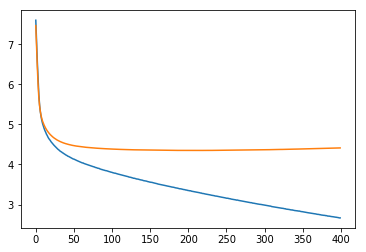

In [75]:
plot_loss(log_path_op13_all,400)

In [3]:
%run ../../emotion_dialogue_model/inference --model ../../emotion_dialogue_model/model/0208_op13_all_2.mdl \
                    --data_dir ../../data/em_dial/splitted/cleaning \
                    --vocab ../../data/em_dial/vocab/spvocab.model \
                    --use_emotion

Loading the test dataset...
Read 202 dialogues
Building the model...
Inference uttrances...
Dial 1:
src: 僕はアレルギーもないし、大丈夫だよ。
tgt: でも放っておくとダニや害虫も増えますよ。
tgt_emotion: sad
inf:  NONE
1[-0.26]: じゃぁぁぁぁぁぁぁ、ぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁ 

inf:  neutral
1[-0.24]: じゃぁぁぁぁぁぁ、ぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁ 

inf:  anger
1[-0.26]: じゃぁぁぁぁぁぁぁ、ぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁ 

inf:  sad
1[-0.24]: じゃぁぁぁぁぁぁぁ、ぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁ 

inf:  happy
1[-0.26]: じゃぁぁぁぁぁぁぁ、ぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁ 

inf:  contentment
1[-0.26]: じゃぁぁぁぁぁぁぁ、ぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁぁ 

Dial 2:
src: おーい。
tgt: ...。
tgt_emotion: NONE
inf:  NONE
1[-3.18]: おはようご

Exception ignored in: <bound method _DataLoaderIter.__del__ of <torch.utils.data.dataloader._DataLoaderIter object at 0x7f342002fa20>>
Traceback (most recent call last):
  File "/home/is/sara-as/.pyenv/versions/miniconda3-3.19.0/lib/python3.5/site-packages/torch/utils/data/dataloader.py", line 399, in __del__
    self._shutdown_workers()
  File "/home/is/sara-as/.pyenv/versions/miniconda3-3.19.0/lib/python3.5/site-packages/torch/utils/data/dataloader.py", line 378, in _shutdown_workers
    self.worker_result_queue.get()
  File "/home/is/sara-as/.pyenv/versions/miniconda3-3.19.0/lib/python3.5/multiprocessing/queues.py", line 337, in get
    return ForkingPickler.loads(res)
  File "/home/is/sara-as/.pyenv/versions/miniconda3-3.19.0/lib/python3.5/site-packages/torch/multiprocessing/reductions.py", line 151, in rebuild_storage_fd
    fd = df.detach()
  File "/home/is/sara-as/.pyenv/versions/miniconda3-3.19.0/lib/python3.5/multiprocessing/resource_sharer.py", line 57, in detach
    with _re

In [1]:
%run ../../emotion_dialogue_model/inference --model ../../emotion_dialogue_model/model/0208_op13_all_100.mdl \
                    --data_dir ../../data/em_dial/splitted/cleaning \
                    --vocab ../../data/em_dial/vocab/spvocab.model \
                    --use_emotion

Loading the test dataset...
Read 202 dialogues
Building the model...
Inference uttrances...
Dial 1:
src: 面倒くさいから嫌だよ。
tgt: こんなにホコリが積もっている部屋で寝るのは健康にも良くないですよ。
tgt_emotion: sad
inf:  NONE
1[-0.09]: わかりました。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。 

inf:  neutral
1[-0.10]: わかりました。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。 

inf:  anger
1[-0.09]: わかりました。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。 

inf:  sad
1[-0.09]: わかりました。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。 

inf:  happy
1[-0.09]: わかりました。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。 

inf:  contentment
1[-0.10]: わかりました。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。。 

Dial 2:
src: わかった。
tgt: じゃあ僕応援するね。
tgt_emo